# LOAD THE BCG DATATSET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
#pip install "numpy>=1.16.5,<1.23.0"
#pip show numpy


# Step 1: Read the accelerometer data from the CSV file
subject1 = pd.read_csv("aa1_acc_l.csv")
subject2 = pd.read_csv("aa2_acc_l.csv")
subject3 = pd.read_csv("ab4_acc_l.csv")
subject4 = pd.read_csv("ab5_acc_l.csv")
subject5 = pd.read_csv("ca2_acc_l.csv")
subject6 = pd.read_csv("ca3_acc_l.csv")
subject7 = pd.read_csv("ca4_acc_l.csv")
subject8 = pd.read_csv("dv1_acc_l.csv")
subject9 = pd.read_csv("dv2_acc_l.csv")
subject10 = pd.read_csv("ga1_acc_l.csv")
subject11 = pd.read_csv("mg1_acc_l.csv")
subject12 = pd.read_csv("mg2_acc_l.csv")
subject13 = pd.read_csv("mh1_acc_l.csv")
subject14 = pd.read_csv("mh2_acc_l.csv")



# Extract the BCG accelerometer signal (Z1, Z2, Z3) from the DataFrame
raw_bcg_signal1 = subject1[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal2 = subject2[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal3 = subject3[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal4 = subject4[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal5 = subject5[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal6 = subject6[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal7 = subject7[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal8 = subject8[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal9 = subject9[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal10 = subject10[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal11 = subject11[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal12 = subject12[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal13 = subject13[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal14 = subject14[['z1','z2','z3']].mean(axis=1).values



fs = 50 # Hz

# Time vector for plotting
time1 = subject1["ctime"]; 2 * raw_bcg_signal1.std()
time2 = subject2["ctime"]; 2 * raw_bcg_signal2.std()
time3 = subject3["ctime"]; 2 * raw_bcg_signal3.std()
time4 = subject4["ctime"]; 2 * raw_bcg_signal4.std()
time5 = subject5["ctime"]; 2 * raw_bcg_signal5.std()
time6 = subject6["ctime"]; 2 * raw_bcg_signal6.std()
time7 = subject7["ctime"]; 2 * raw_bcg_signal7.std()
time8 = subject8["ctime"]; 2 * raw_bcg_signal8.std()
time9 = subject9["ctime"]; 2 * raw_bcg_signal9.std()
time10 = subject10["ctime"]; 2 * raw_bcg_signal10.std()
time11 = subject11["ctime"]; 2 * raw_bcg_signal11.std()
time12 = subject12["ctime"]; 2 * raw_bcg_signal12.std()
time13 = subject13["ctime"]; 2 * raw_bcg_signal13.std()
time14 = subject14["ctime"]; 2 * raw_bcg_signal14.std()

In [36]:
# Load dataframe to a list and store them in a variable called raw BCG signal for each subject
data_frames = [raw_bcg_signal1, raw_bcg_signal2, raw_bcg_signal3, raw_bcg_signal4,
              raw_bcg_signal5, raw_bcg_signal6, raw_bcg_signal7, raw_bcg_signal8,
              raw_bcg_signal9, raw_bcg_signal10, raw_bcg_signal11, raw_bcg_signal12,
              raw_bcg_signal13, raw_bcg_signal14]  

# Loop through each data frame and perform scaling
for i, df in enumerate(data_frames):
    min_value = df.min()
    max_value = df.max()
    scaled_df = (df - min_value) / (max_value - min_value)
    data_frames[i] = scaled_df  

raw_bcg_signal1 = data_frames[0]
raw_bcg_signal2 = data_frames[1]
raw_bcg_signal3 = data_frames[2]
raw_bcg_signal4 = data_frames[3]
raw_bcg_signal5 = data_frames[4]
raw_bcg_signal6 = data_frames[5]
raw_bcg_signal7 = data_frames[6]
raw_bcg_signal8 = data_frames[7]
raw_bcg_signal9 = data_frames[8]
raw_bcg_signal10 = data_frames[9]
raw_bcg_signal11 = data_frames[10]
raw_bcg_signal12 = data_frames[11]
raw_bcg_signal13 = data_frames[12]
raw_bcg_signal14 = data_frames[13]

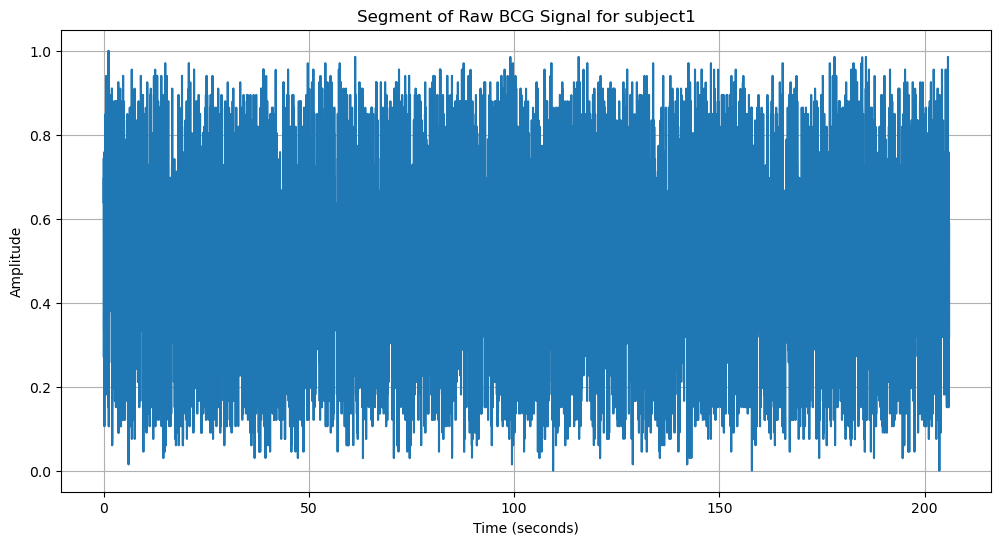

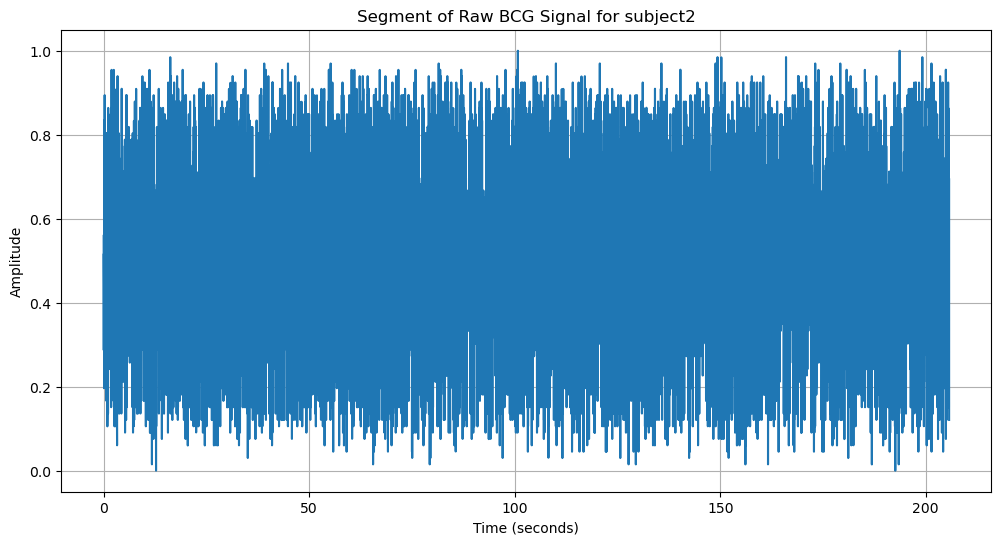

In [37]:
amplitude_threshold1 = 0.3  




#  Plot a segment of the raw BCG signal
segment_duration1 =   len(raw_bcg_signal1) / fs; segment_samples1 = int(fs * segment_duration1)
segment_time1 = np.arange(segment_samples1) / fs

segment_duration2 =   len(raw_bcg_signal2) / fs;  segment_samples2 = int(fs * segment_duration2)
segment_time2 = np.arange(segment_samples2) / fs

segment_duration3 =   len(raw_bcg_signal3) / fs;  segment_samples3 = int(fs * segment_duration3)
segment_time3 = np.arange(segment_samples3) / fs

segment_duration4 =   len(raw_bcg_signal4) / fs;  segment_samples4 = int(fs * segment_duration4)
segment_time4 = np.arange(segment_samples4) / fs

segment_duration5 =   len(raw_bcg_signal5) / fs;  segment_samples5 = int(fs * segment_duration5)
segment_time5 = np.arange(segment_samples5) / fs

segment_duration6 =   len(raw_bcg_signal6) / fs;  segment_samples6 = int(fs * segment_duration6)
segment_time6 = np.arange(segment_samples6) / fs

segment_duration7 =   len(raw_bcg_signal7) / fs;  segment_samples7 = int(fs * segment_duration7)
segment_time7 = np.arange(segment_samples7) / fs

segment_duration8 =   len(raw_bcg_signal8) / fs;  segment_samples8 = int(fs * segment_duration8)
segment_time8 = np.arange(segment_samples8) / fs

segment_duration9 =   len(raw_bcg_signal9) / fs;  segment_samples9 = int(fs * segment_duration9)
segment_time9 = np.arange(segment_samples9) / fs

segment_duration10 =   len(raw_bcg_signal10) / fs;  segment_samples10 = int(fs * segment_duration10)
segment_time10 = np.arange(segment_samples10) / fs

plt.figure(figsize=(12, 6))
plt.plot(segment_time1[:segment_samples1], raw_bcg_signal1[:segment_samples1])
plt.title("Segment of Raw BCG Signal for subject1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(segment_time2[:segment_samples2], raw_bcg_signal2[:segment_samples2])
plt.title("Segment of Raw BCG Signal for subject2")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [39]:
import numpy as np
from scipy.signal import butter, filtfilt, medfilt, correlate
import matplotlib.pyplot as plt

# Step 1: Apply a Butterworth bandpass filter to remove high-frequency noise
def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

#  Apply median filter to suppress baseline drift
def baseline_drift_correction(signal, kernel_size):
    return medfilt(signal, kernel_size)

#  Enhance peak prominence using cross-correlation
def enhance_peak_prominence(signal, reference_signal):
    cross_correlation = correlate(signal, reference_signal, mode='same')
    enhanced_signal = signal - cross_correlation
    return enhanced_signal

fs = 50  
order = 3

# cutoff frequencies
low_cutoff = 0.5  # Hz
high_cutoff = 8  # Hz



#  bandpass filter to each raw BCG signal
filtered_bcg_signal1 = butter_bandpass_filter(raw_bcg_signal1, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal2 = butter_bandpass_filter(raw_bcg_signal2, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal3 = butter_bandpass_filter(raw_bcg_signal3, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal4 = butter_bandpass_filter(raw_bcg_signal4, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal5 = butter_bandpass_filter(raw_bcg_signal5, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal6 = butter_bandpass_filter(raw_bcg_signal6, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal7 = butter_bandpass_filter(raw_bcg_signal7, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal8 = butter_bandpass_filter(raw_bcg_signal8, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal9 = butter_bandpass_filter(raw_bcg_signal9, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal10 = butter_bandpass_filter(raw_bcg_signal10, low_cutoff, high_cutoff, fs, order)



# baseline drift correction using median filter
baseline_corrected_signal1 = baseline_drift_correction(filtered_bcg_signal1, kernel_size=7)
baseline_corrected_signal2 = baseline_drift_correction(filtered_bcg_signal2, kernel_size=7)
baseline_corrected_signal3 = baseline_drift_correction(filtered_bcg_signal3, kernel_size=7)
baseline_corrected_signal4 = baseline_drift_correction(filtered_bcg_signal4, kernel_size=7)
baseline_corrected_signal5 = baseline_drift_correction(filtered_bcg_signal5, kernel_size=7)
baseline_corrected_signal6 = baseline_drift_correction(filtered_bcg_signal6, kernel_size=7)
baseline_corrected_signal7 = baseline_drift_correction(filtered_bcg_signal7, kernel_size=7)
baseline_corrected_signal8 = baseline_drift_correction(filtered_bcg_signal8, kernel_size=7)
baseline_corrected_signal9 = baseline_drift_correction(filtered_bcg_signal9, kernel_size=7)
baseline_corrected_signal10 = baseline_drift_correction(filtered_bcg_signal10, kernel_size=7)


# reference signal for cross-correlation
reference_signal = baseline_corrected_signal6  


#  peak prominence using cross-correlation
filtered_bcg_signal1 = enhance_peak_prominence(baseline_corrected_signal1, reference_signal)
filtered_bcg_signal2 = enhance_peak_prominence(baseline_corrected_signal2, reference_signal)
filtered_bcg_signal3 = enhance_peak_prominence(baseline_corrected_signal3, reference_signal)
filtered_bcg_signal4 = enhance_peak_prominence(baseline_corrected_signal4, reference_signal)
filtered_bcg_signal5 = enhance_peak_prominence(baseline_corrected_signal5, reference_signal)
filtered_bcg_signal6 = enhance_peak_prominence(baseline_corrected_signal6, reference_signal)
filtered_bcg_signal7 = enhance_peak_prominence(baseline_corrected_signal7, reference_signal)
filtered_bcg_signal8 = enhance_peak_prominence(baseline_corrected_signal8, reference_signal)
filtered_bcg_signal9 = enhance_peak_prominence(baseline_corrected_signal9, reference_signal)
filtered_bcg_signal10 = enhance_peak_prominence(baseline_corrected_signal10, reference_signal)


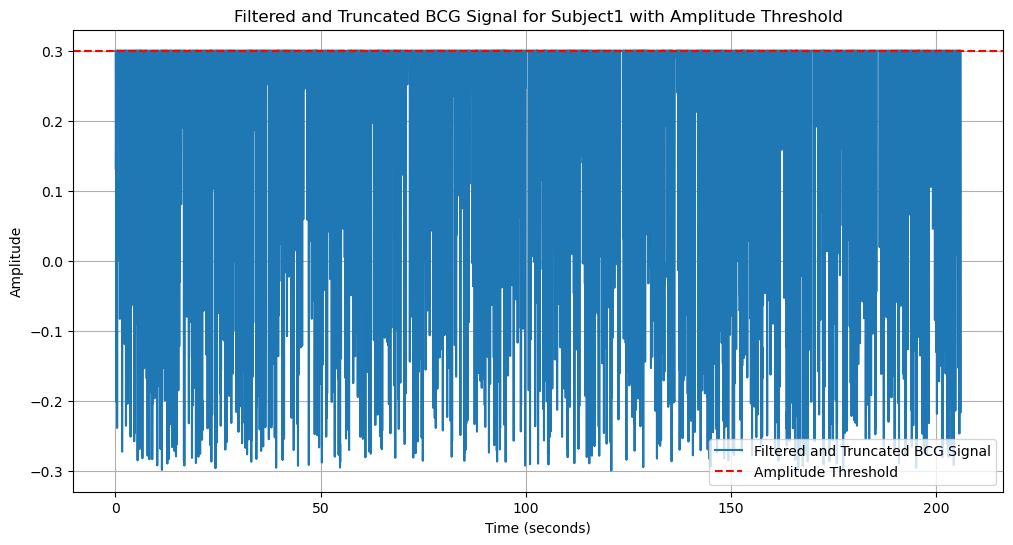

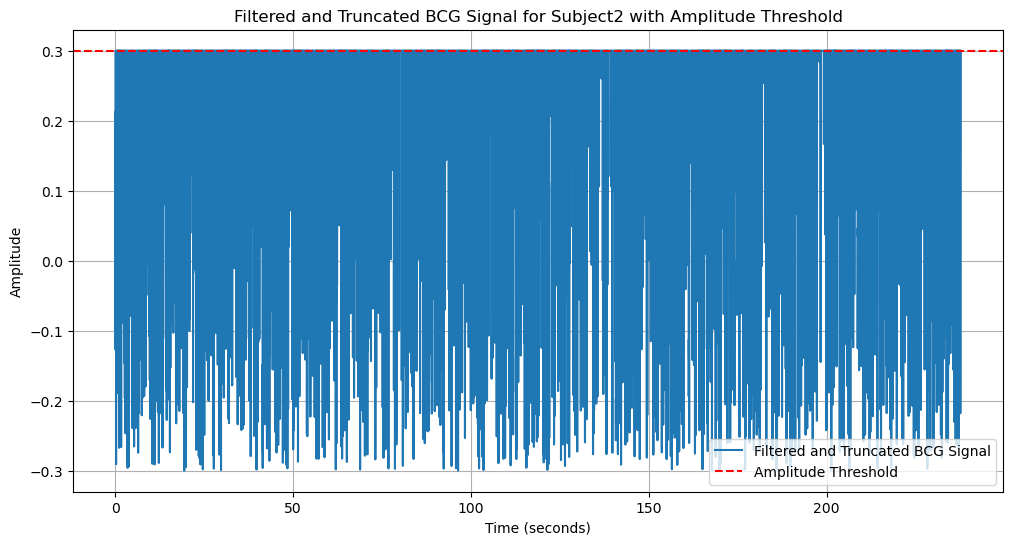

In [40]:
# Truncate the filtered signal at the amplitude threshold
filtered_bcg_signal1_truncated = np.where(np.abs(filtered_bcg_signal1) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal1)
filtered_bcg_signal2_truncated = np.where(np.abs(filtered_bcg_signal2) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal2)
filtered_bcg_signal3_truncated = np.where(np.abs(filtered_bcg_signal3) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal3)
filtered_bcg_signal4_truncated = np.where(np.abs(filtered_bcg_signal4) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal4)
filtered_bcg_signal5_truncated = np.where(np.abs(filtered_bcg_signal5) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal5)
filtered_bcg_signal6_truncated = np.where(np.abs(filtered_bcg_signal6) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal6)
filtered_bcg_signal7_truncated = np.where(np.abs(filtered_bcg_signal7) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal7)
filtered_bcg_signal8_truncated = np.where(np.abs(filtered_bcg_signal8) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal8)
filtered_bcg_signal9_truncated = np.where(np.abs(filtered_bcg_signal9) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal9)
filtered_bcg_signal10_truncated = np.where(np.abs(filtered_bcg_signal10) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal10)

# Step 5: Plot the filtered and truncated BCG signal with amplitude threshold
plt.figure(figsize=(12, 6))
plt.plot(segment_time1, filtered_bcg_signal1_truncated[:segment_samples1], label='Filtered and Truncated BCG Signal')
plt.axhline(y=amplitude_threshold1, color='r', linestyle='--', label='Amplitude Threshold')
plt.title("Filtered and Truncated BCG Signal for Subject1 with Amplitude Threshold")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(segment_time10, filtered_bcg_signal10_truncated[:segment_samples10], label='Filtered and Truncated BCG Signal')
plt.axhline(y=amplitude_threshold1, color='r', linestyle='--', label='Amplitude Threshold')
plt.title("Filtered and Truncated BCG Signal for Subject2 with Amplitude Threshold")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d

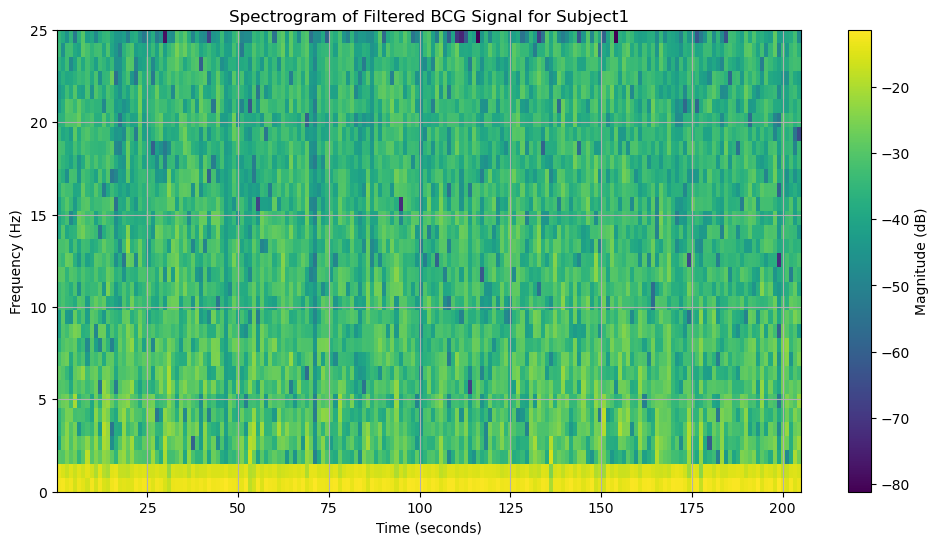

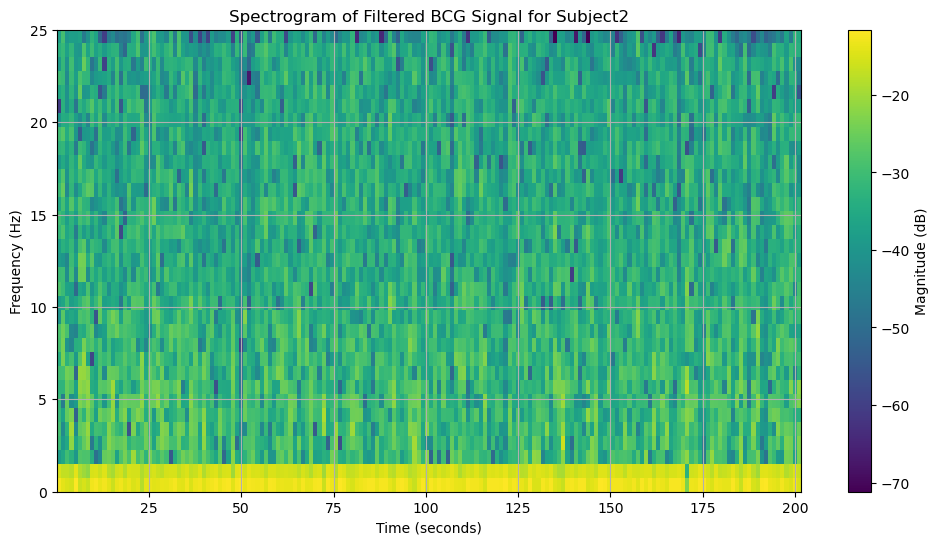

In [42]:
plt.figure(figsize=(12, 6))
plt.specgram(filtered_bcg_signal1_truncated, NFFT=64, Fs=fs, noverlap=8, cmap='viridis')
plt.title("Spectrogram of Filtered BCG Signal for Subject1")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Magnitude (dB)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.specgram(filtered_bcg_signal4_truncated, NFFT=64, Fs=fs, noverlap=8, cmap='viridis')
plt.title("Spectrogram of Filtered BCG Signal for Subject2")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Magnitude (dB)')
plt.grid(True)
plt.show()

# WAVELET DECOMPOSITION

In [43]:
import numpy as np
import pywt  


def extract_dwt_features(filtered_signal, wavelet, num_scales):
    coefficients = pywt.wavedec(filtered_signal, wavelet, level=num_scales)
    approximation_coefficients = coefficients[0]
    detail_coefficients = coefficients[1:]

    ace_features = []
    dce_features = []
    wavelet_entropy = []
    acv_features = []
    wavelet_coherence = []

    for i in range(num_scales):
        ace = np.sum(approximation_coefficients[i] ** 2)
        ace_features.append(ace)

        dce = np.sum(detail_coefficients[i] ** 2)
        dce_features.append(dce)

    features_dict = {
        'Approximation_Coefficients': approximation_coefficients,
        'Detail_Coefficients': detail_coefficients,
      
    }

    return features_dict


wavelet = 'bior3.9'
num_scales = 8

features_dict_signal1 = extract_dwt_features(filtered_bcg_signal1_truncated, wavelet, num_scales)
features_dict_signal2 = extract_dwt_features(filtered_bcg_signal2_truncated, wavelet, num_scales)
features_dict_signal3 = extract_dwt_features(filtered_bcg_signal3_truncated, wavelet, num_scales)
features_dict_signal4 = extract_dwt_features(filtered_bcg_signal4_truncated, wavelet, num_scales)
features_dict_signal5 = extract_dwt_features(filtered_bcg_signal5_truncated, wavelet, num_scales)
features_dict_signal6 = extract_dwt_features(filtered_bcg_signal6_truncated, wavelet, num_scales)
features_dict_signal7 = extract_dwt_features(filtered_bcg_signal7_truncated, wavelet, num_scales)
features_dict_signal8 = extract_dwt_features(filtered_bcg_signal8_truncated, wavelet, num_scales)
features_dict_signal9 = extract_dwt_features(filtered_bcg_signal9_truncated, wavelet, num_scales)
features_dict_signal10 = extract_dwt_features(filtered_bcg_signal10_truncated, wavelet, num_scales)

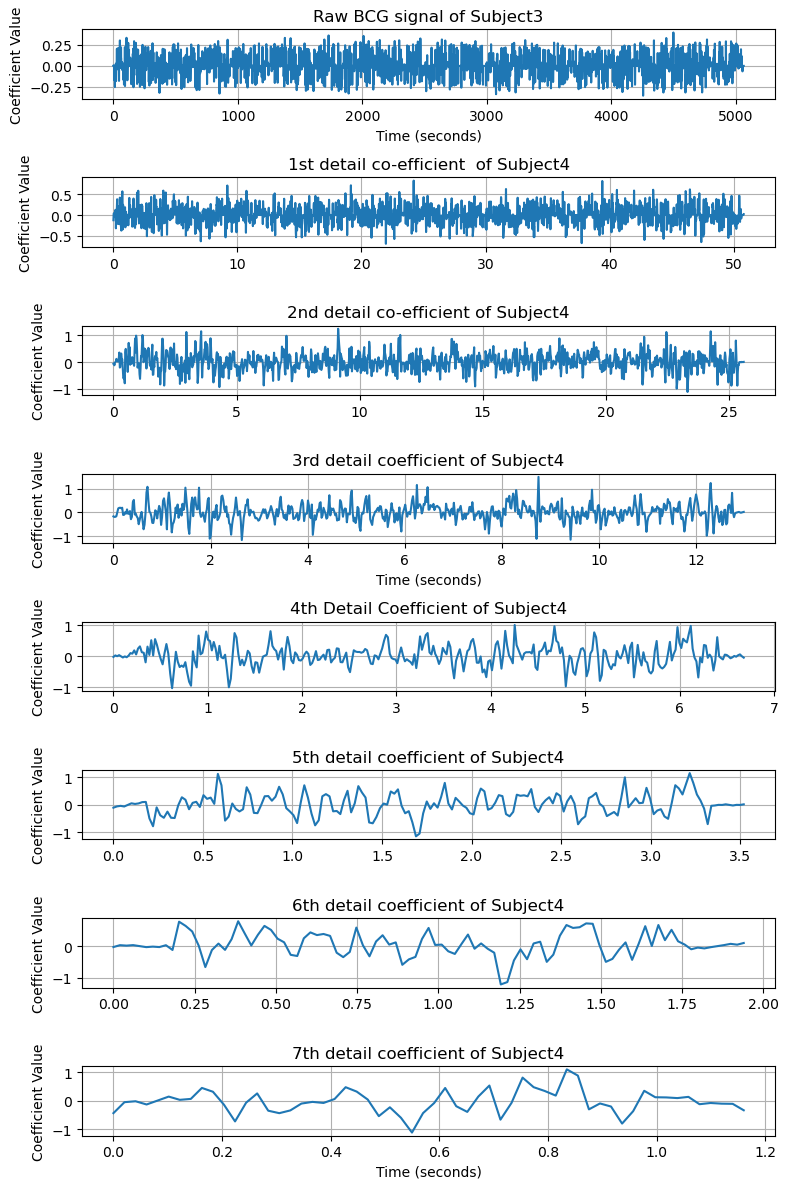

In [48]:
# Retrieve the 3rd detail coefficient from the features_dict_signal1 dictionary
DC0_sub1 = features_dict_signal4['Detail_Coefficients'][7]
DC1_sub1 = features_dict_signal4['Detail_Coefficients'][6]
DC2_sub1 = features_dict_signal4['Detail_Coefficients'][5]
DC3_sub1 = features_dict_signal4['Detail_Coefficients'][4]
DC4_sub1 = features_dict_signal4['Detail_Coefficients'][3]
DC5_sub1 = features_dict_signal4['Detail_Coefficients'][2]
DC6_sub1 = features_dict_signal4['Detail_Coefficients'][1]
DC7_sub1 = features_dict_signal4['Detail_Coefficients'][0]


segment_time_DC0_sub1 = np.linspace(0, len(DC0_sub1) / fs, len(DC0_sub1))
segment_time_DC1_sub1 = np.linspace(0, len(DC1_sub1) / fs, len(DC1_sub1))
segment_time_DC2_sub1 = np.linspace(0, len(DC2_sub1) / fs, len(DC2_sub1))
segment_time_DC3_sub1 = np.linspace(0, len(DC3_sub1) / fs, len(DC3_sub1))
segment_time_DC4_sub1 = np.linspace(0, len(DC4_sub1) / fs, len(DC4_sub1))
segment_time_DC5_sub1 = np.linspace(0, len(DC5_sub1) / fs, len(DC5_sub1))
segment_time_DC6_sub1 = np.linspace(0, len(DC6_sub1) / fs, len(DC6_sub1))
segment_time_DC7_sub1 = np.linspace(0, len(DC7_sub1) / fs, len(DC7_sub1))


# Create a single diagram with all four plots
fig, axes = plt.subplots(nrows=8,ncols=1, figsize=(8, 12))

# Plot the Raw BCG signal
axes[0].plot(DC0_sub1[:segment_samples4])
axes[0].set_title('Raw BCG signal of Subject3')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Coefficient Value')
axes[0].grid(True)

# Plot the 1st detail co-efficient 
axes[1].plot(segment_time_DC1_sub1, DC1_sub1)
axes[1].set_title('1st detail co-efficient  of Subject4')
axes[1].set_xlabel('')
axes[1].set_ylabel('Coefficient Value')
axes[1].grid(True)

# Plot the 2nd detail co-efficient 
axes[2].plot(segment_time_DC2_sub1, DC2_sub1)
axes[2].set_title('2nd detail co-efficient of Subject4')
axes[2].set_xlabel('')
axes[2].set_ylabel('Coefficient Value')
axes[2].grid(True)

# Plot the 3rd detail coefficient  
axes[3].plot(segment_time_DC3_sub1, DC3_sub1)
axes[3].set_title('3rd detail coefficient of Subject4')
axes[3].set_xlabel('Time (seconds)')
axes[3].set_ylabel('Coefficient Value')
axes[3].grid(True)

# Plot the 4th detail coefficient
axes[4].plot(segment_time_DC4_sub1, DC4_sub1)
axes[4].set_title('4th Detail Coefficient of Subject4')
axes[4].set_xlabel('')
axes[4].set_ylabel('Coefficient Value')
axes[4].grid(True)

# Plot the 5th detail coefficient 
axes[5].plot(segment_time_DC5_sub1, DC5_sub1)
axes[5].set_title('5th detail coefficient of Subject4')
axes[5].set_xlabel('')
axes[5].set_ylabel('Coefficient Value')
axes[5].grid(True)

# Plot the 6th detail coefficient 
axes[6].plot(segment_time_DC6_sub1, DC6_sub1)
axes[6].set_title('6th detail coefficient of Subject4')
axes[6].set_xlabel('')
axes[6].set_ylabel('Coefficient Value')
axes[6].grid(True)

# Plot the 7th detail coefficient 6th
axes[7].plot(segment_time_DC7_sub1, DC7_sub1)
axes[7].set_title('7th detail coefficient of Subject4')
axes[7].set_xlabel('Time (seconds)')
axes[7].set_ylabel('Coefficient Value')
axes[7].grid(True)


# Adjust layout and show the diagram
plt.tight_layout()
plt.show()

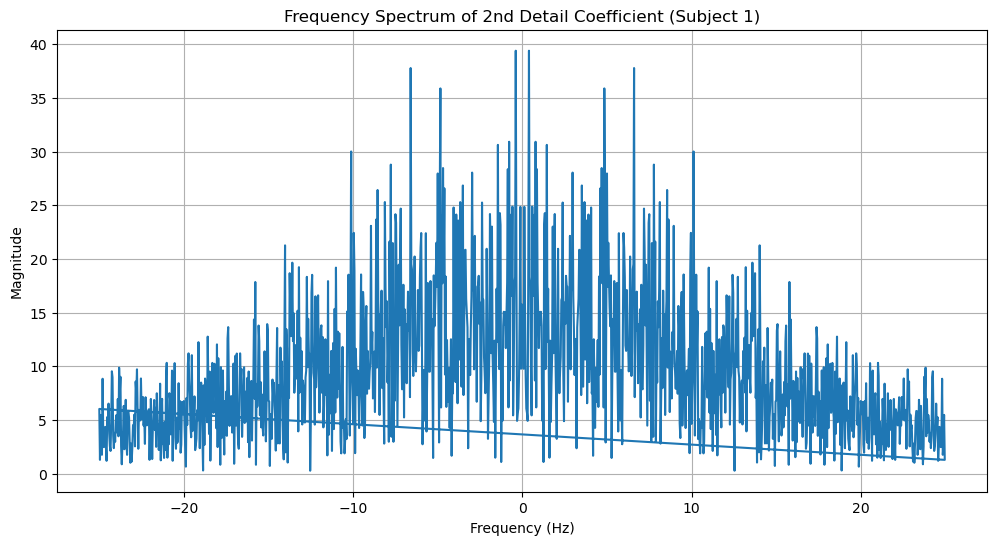

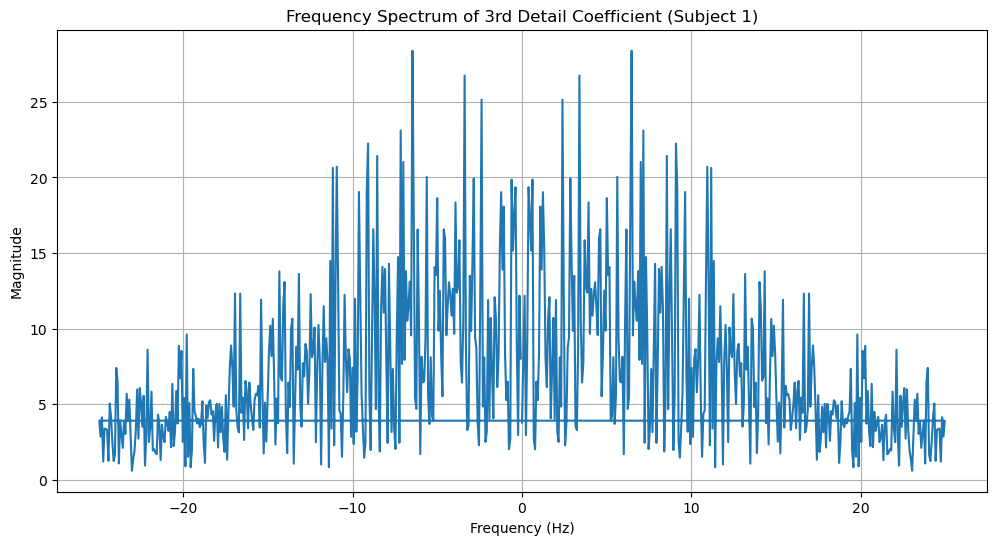

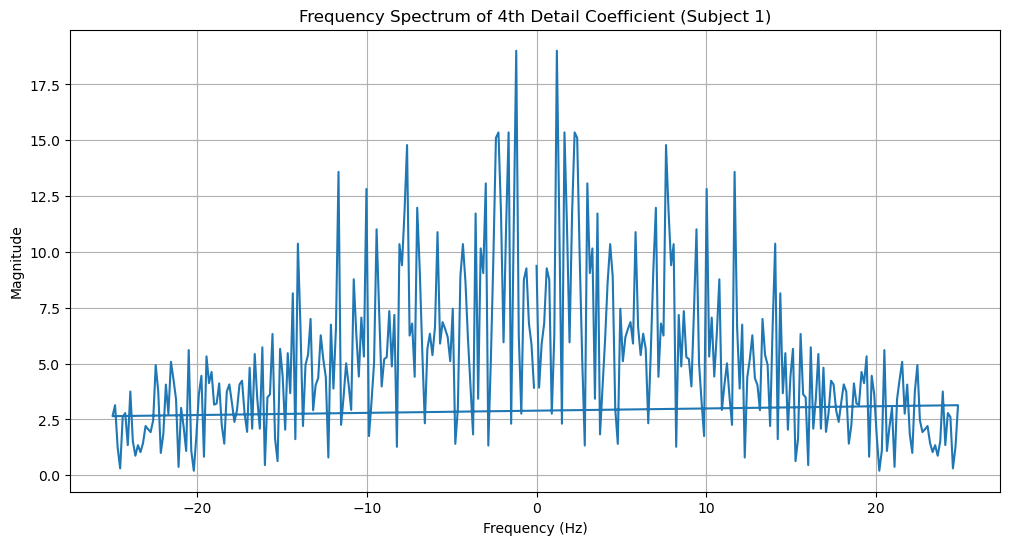

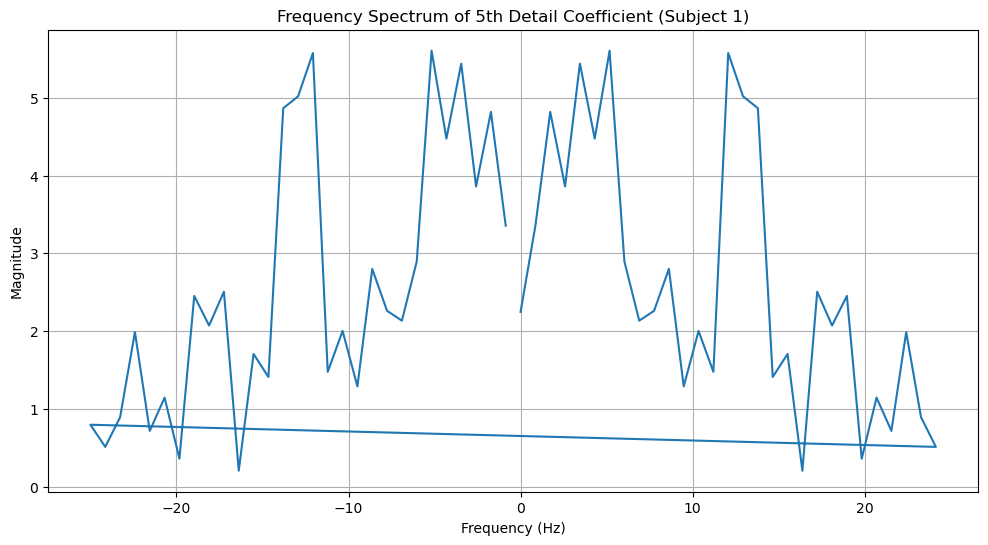

In [49]:
# Compute FFT for each detail coefficient
fft_DC2_sub1 = np.fft.fft(DC2_sub1)
fft_DC3_sub1 = np.fft.fft(DC3_sub1)
fft_DC4_sub1 = np.fft.fft(DC4_sub1)
fft_DC5_sub1 = np.fft.fft(DC5_sub1)
fft_DC7_sub1 = np.fft.fft(DC7_sub1)


# Calculate frequency values for the x-axis
freq_axis = np.fft.fftfreq(len(DC2_sub1), d=1/fs)
# Plot the Frequency Spectrum for each detail coefficient
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC2_sub1))
plt.title('Frequency Spectrum of 2nd Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


freq_axis = np.fft.fftfreq(len(DC3_sub1), d=1/fs)
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC3_sub1))
plt.title('Frequency Spectrum of 3rd Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

freq_axis = np.fft.fftfreq(len(DC4_sub1), d=1/fs)
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC4_sub1))
plt.title('Frequency Spectrum of 4th Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

freq_axis = np.fft.fftfreq(len(DC7_sub1), d=1/fs)
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC7_sub1))
plt.title('Frequency Spectrum of 5th Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

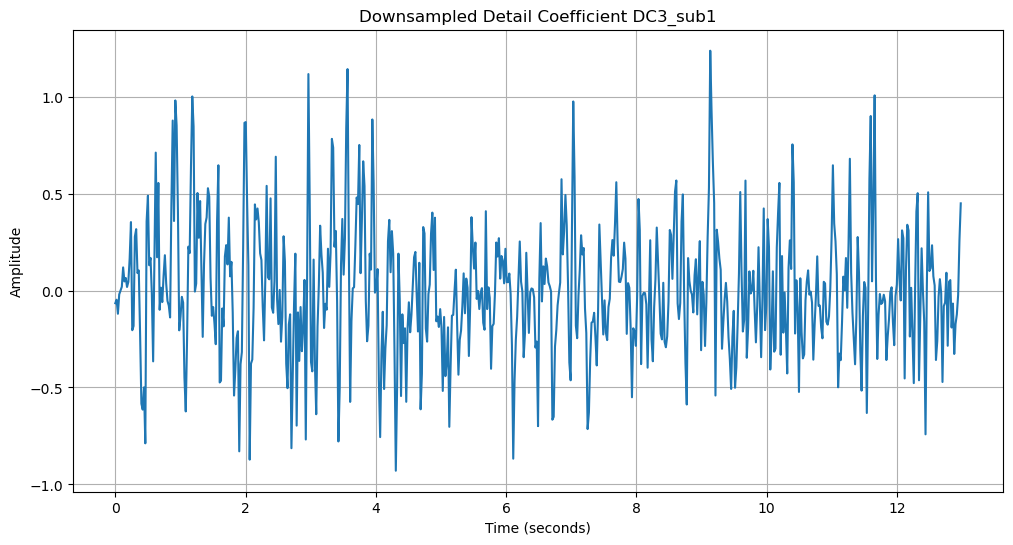

In [50]:
# Downsample DC3_sub1 to match the length of DC4_sub1
downsampled_length = len(DC3_sub1)
downsampled_DC3_sub1 = DC2_sub1[:downsampled_length]


#  a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub1 = np.linspace(0, len(downsampled_DC3_sub1) / fs, len(downsampled_DC3_sub1))

cardiac_signal_sub1 = DC2_sub1[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub1, cardiac_signal_sub1)
plt.title("Downsampled Detail Coefficient DC3_sub1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

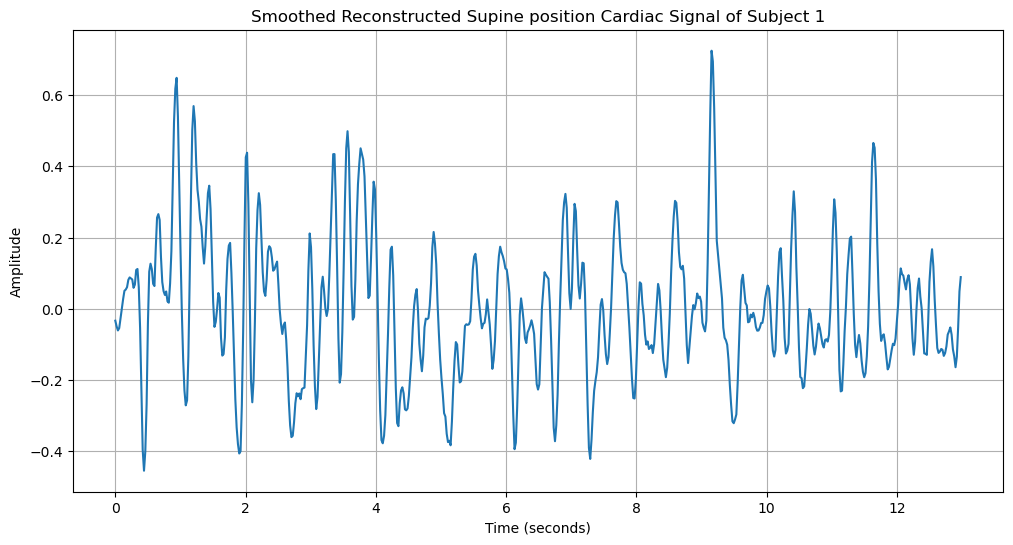

In [51]:
from scipy import interpolate


# smoothing window size
window_size = 4


# an empty array for the smoothed signal
smoothed_cardiac_signal_sub1 = np.zeros_like(cardiac_signal_sub1)

# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub1)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub1), i + window_size // 2 )
    smoothed_cardiac_signal_sub1[i] = np.mean(cardiac_signal_sub1[start_idx:end_idx])
    
smoothed_cardiac_signal_sub1 = np.convolve(smoothed_cardiac_signal_sub1, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub1, smoothed_cardiac_signal_sub1)
plt.title("Smoothed Reconstructed Supine position Cardiac Signal of Subject 1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub1 = smoothed_cardiac_signal_sub1

# SIGNAL DECOMPOSITION OF SUBJECT 2

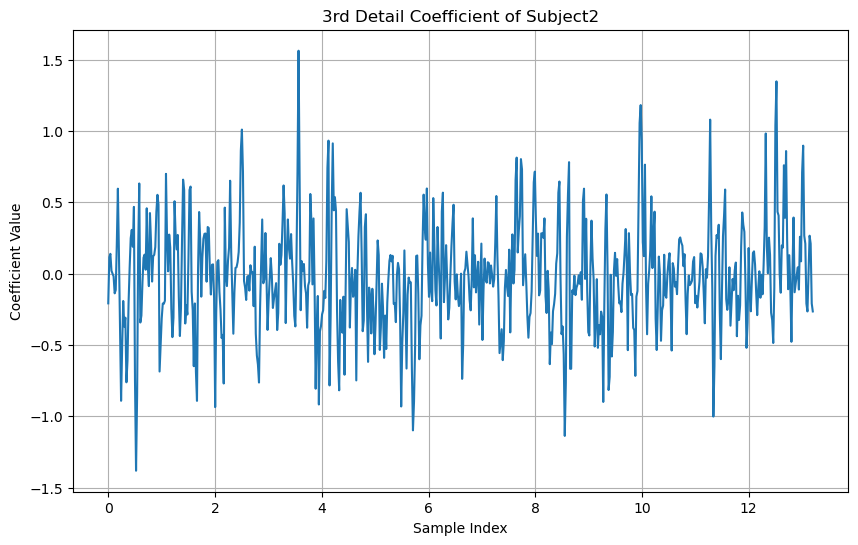

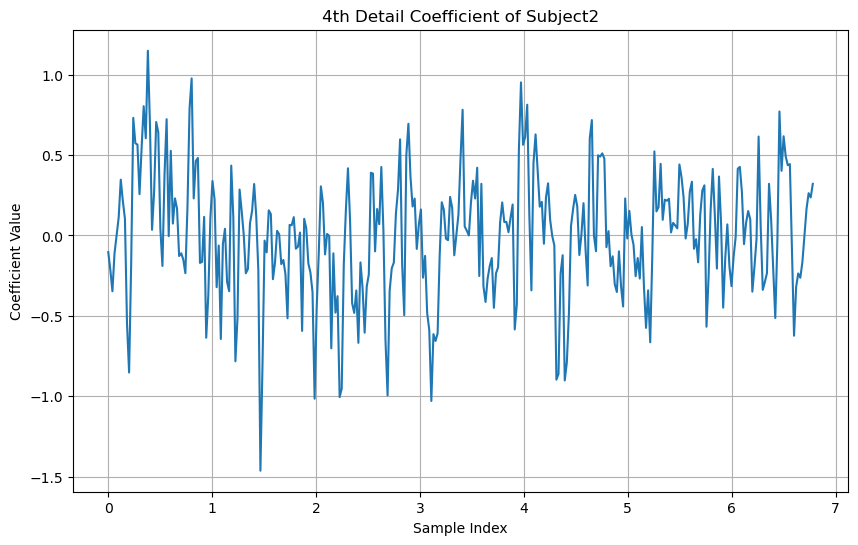

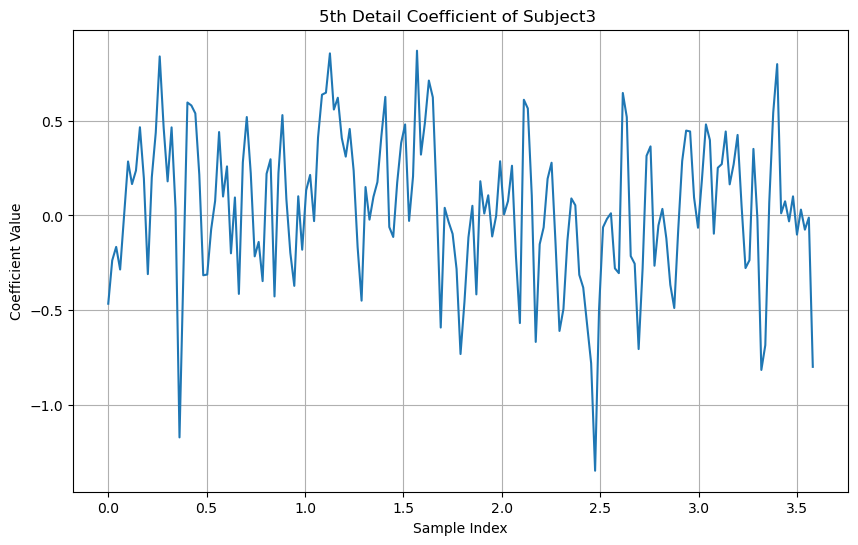

In [53]:
# Retrieve the detail coefficient of Subject 2 data
DC2_sub2 = features_dict_signal2['Detail_Coefficients'][5]
DC3_sub2 = features_dict_signal2['Detail_Coefficients'][4]
DC4_sub2 = features_dict_signal2['Detail_Coefficients'][3]
DC5_sub2 = features_dict_signal2['Detail_Coefficients'][2]

# Time domain of detail coefficients
segment_time_DC3_sub2 = np.linspace(0, len(DC3_sub2) / fs, len(DC3_sub2))
segment_time_DC4_sub2 = np.linspace(0, len(DC4_sub2) / fs, len(DC4_sub2))
segment_time_DC5_sub2 = np.linspace(0, len(DC5_sub2) / fs, len(DC5_sub2))
segment_time_D2_sub2 = np.linspace(0, len(DC2_sub2) / fs, len(DC2_sub2))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub2, DC3_sub2)
plt.title('3rd Detail Coefficient of Subject2')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub2, DC4_sub2)
plt.title('4th Detail Coefficient of Subject2')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub2, DC5_sub2)
plt.title('5th Detail Coefficient of Subject3 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

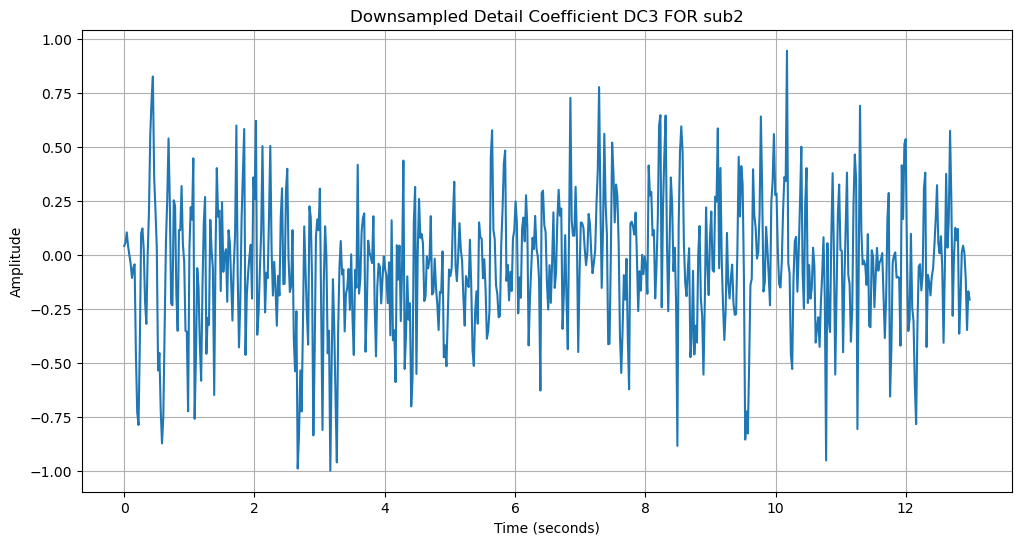

In [55]:
# Downsample DC3_sub1 to match the length of DC4_sub1
downsampled_length = len(DC3_sub1)
downsampled_DC3_sub2 = DC2_sub2[:downsampled_length]


# a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub2 = np.linspace(0, len(downsampled_DC3_sub2) / fs, len(downsampled_DC3_sub2))

cardiac_signal_sub2 = DC2_sub2[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub2, cardiac_signal_sub2)
plt.title("Downsampled Detail Coefficient DC3 FOR sub2")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

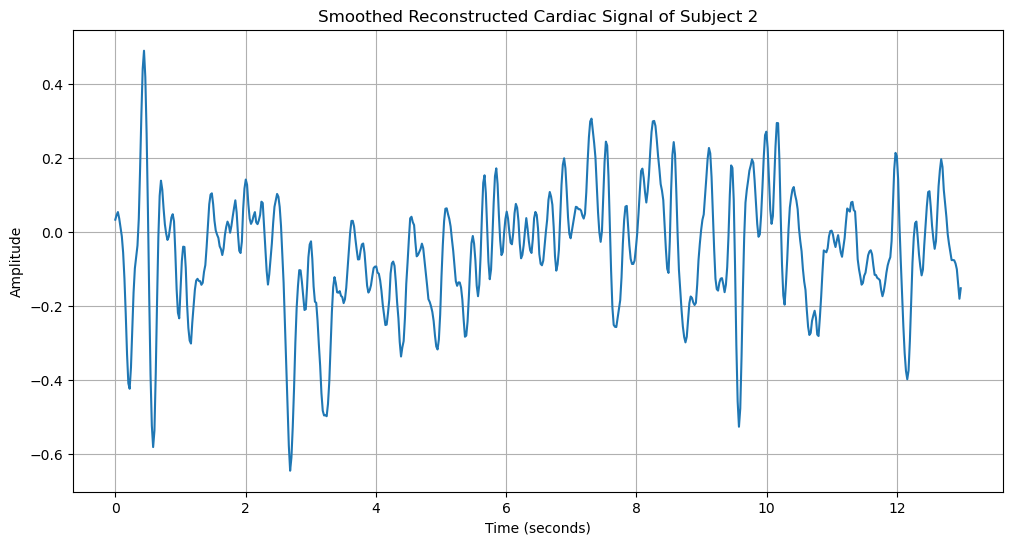

In [56]:
#  a smoothing window size
window_size = 4


# an empty array for the smoothed signal
smoothed_cardiac_signal_sub2 = np.zeros_like(cardiac_signal_sub2)

# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub2)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub2), i + window_size // 2+1)
    smoothed_cardiac_signal_sub2[i] = np.mean(cardiac_signal_sub2[start_idx:end_idx])
    

smoothed_cardiac_signal_sub2 = np.convolve(smoothed_cardiac_signal_sub2, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub2, smoothed_cardiac_signal_sub2)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 2")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub2 = smoothed_cardiac_signal_sub2

#  BCG decompsoition of Subject 3

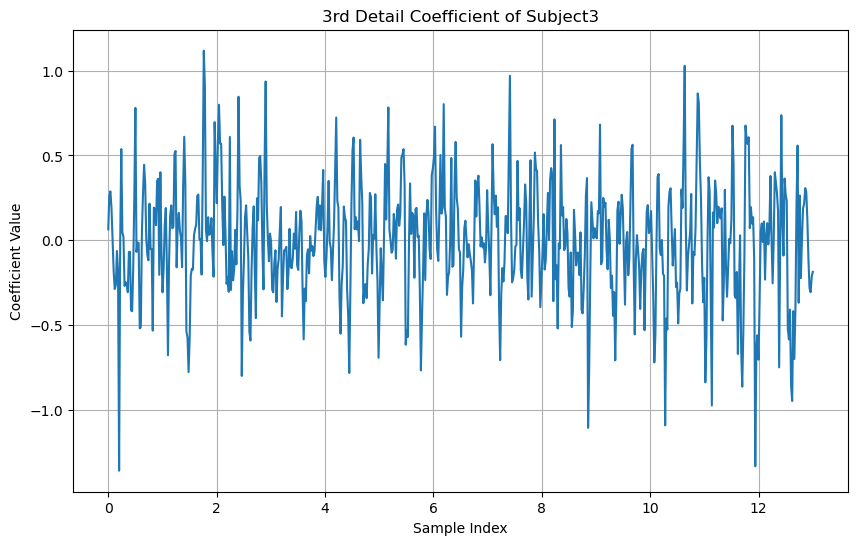

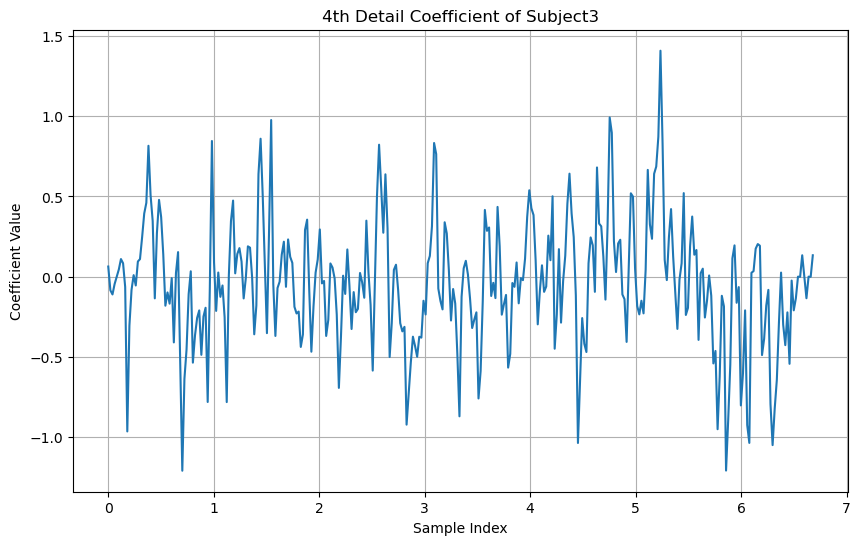

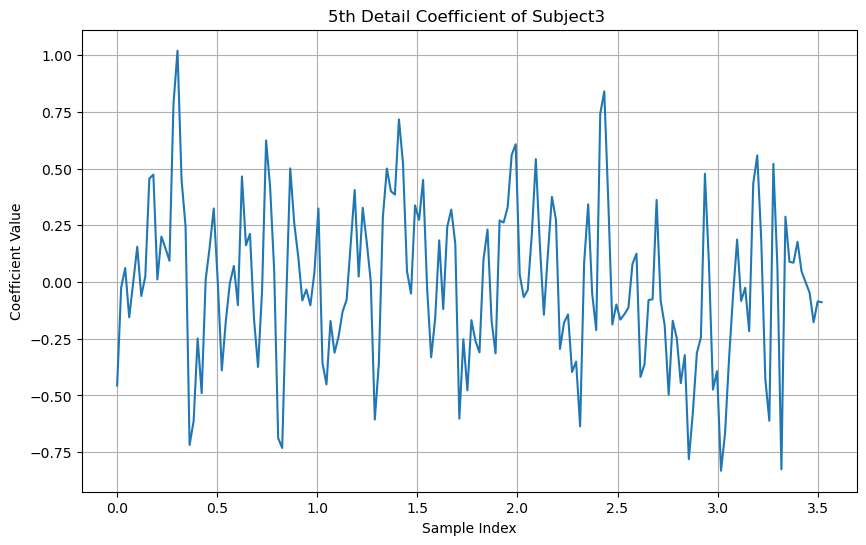

In [65]:
# Retrieve the detail coefficient FOR Subject 3

DC2_sub3 = features_dict_signal3['Detail_Coefficients'][5]
DC3_sub3 = features_dict_signal3['Detail_Coefficients'][4]
DC4_sub3 = features_dict_signal3['Detail_Coefficients'][3]
DC5_sub3 = features_dict_signal3['Detail_Coefficients'][2]

segment_time_DC3_sub3 = np.linspace(0, len(DC3_sub3) / fs, len(DC3_sub3))
segment_time_DC4_sub3 = np.linspace(0, len(DC4_sub3) / fs, len(DC4_sub3))
segment_time_DC5_sub3 = np.linspace(0, len(DC5_sub3) / fs, len(DC5_sub3))
segment_time_DC2_sub3 = np.linspace(0, len(DC2_sub3) / fs, len(DC2_sub3))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub3, DC3_sub3)
plt.title('3rd Detail Coefficient of Subject3')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub3, DC4_sub3)
plt.title('4th Detail Coefficient of Subject3')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub3, DC5_sub3)
plt.title('5th Detail Coefficient of Subject3 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

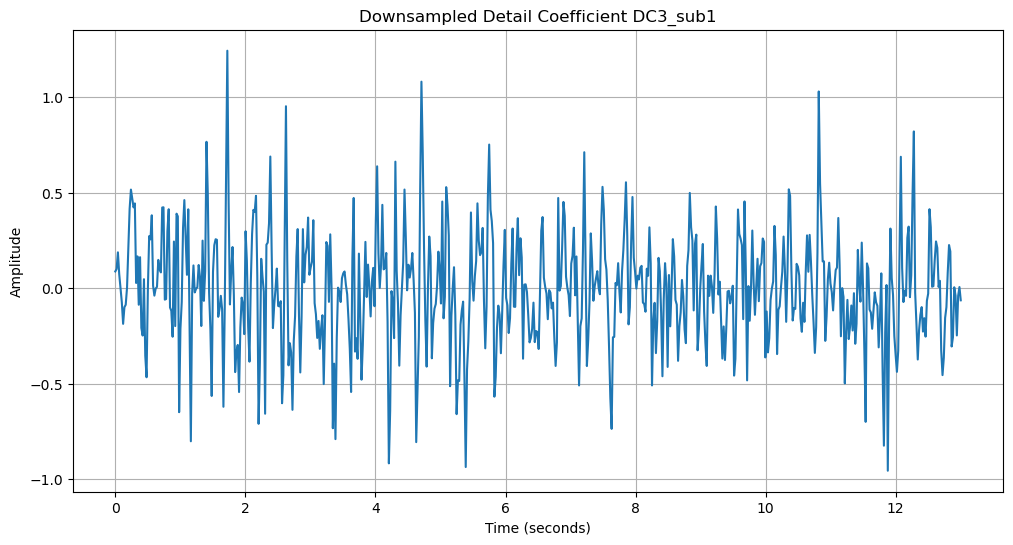

In [66]:
# Downsample DC3_sub1 to match the length of DC4_sub1
downsampled_length = len(DC3_sub3)
downsampled_DC3_sub3 = DC2_sub3[:downsampled_length]


# Create a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub3 = np.linspace(0, len(downsampled_DC3_sub3) / fs, len(downsampled_DC3_sub3))

cardiac_signal_sub3 = DC2_sub3[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub3, cardiac_signal_sub3)
plt.title("Downsampled Detail Coefficient DC3_sub1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

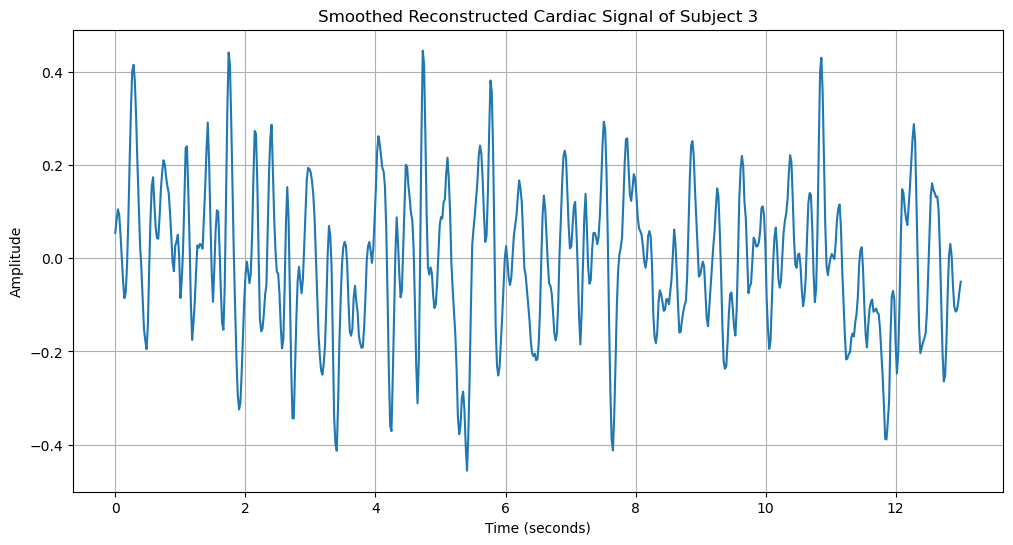

In [67]:
#  a smoothing window size
window_size = 4

# Create an empty array for the smoothed signal
smoothed_cardiac_signal_sub3 = np.zeros_like(cardiac_signal_sub3)

# the moving average smoothing
for i in range(len(cardiac_signal_sub3)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub3), i + window_size // 2)
    smoothed_cardiac_signal_sub3[i] = np.mean(cardiac_signal_sub3[start_idx:end_idx])
    

smoothed_cardiac_signal_sub3 = np.convolve(smoothed_cardiac_signal_sub3, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub3, smoothed_cardiac_signal_sub3)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub3 = smoothed_cardiac_signal_sub3

# BCG DECOMPOSITION OF SUBJECT 4

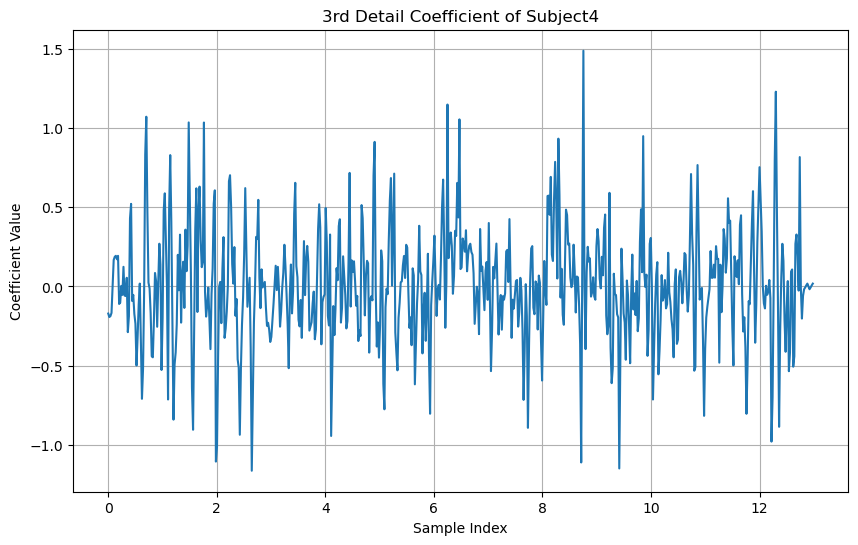

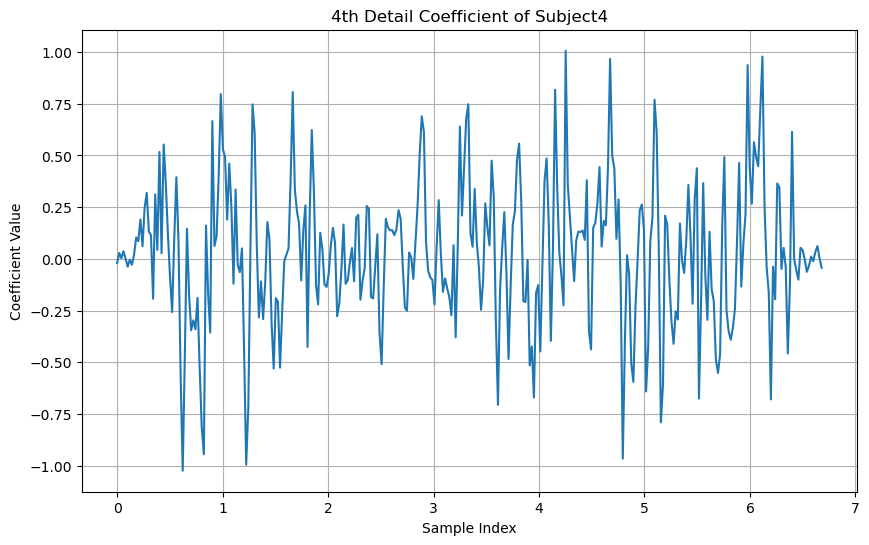

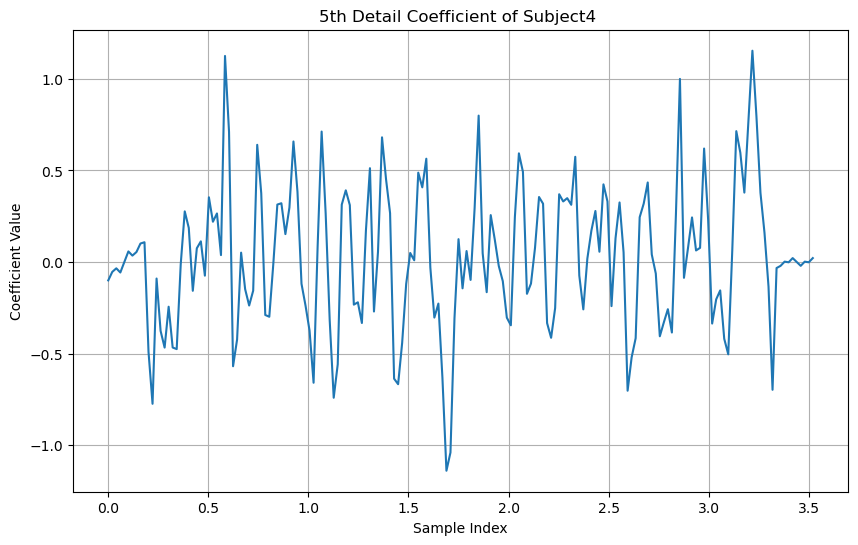

In [69]:
# Retrieve the 3rd detail coefficient for subject 4
DC2_sub4 = features_dict_signal4['Detail_Coefficients'][5]
DC3_sub4 = features_dict_signal4['Detail_Coefficients'][4]
DC4_sub4 = features_dict_signal4['Detail_Coefficients'][3]
DC5_sub4 = features_dict_signal4['Detail_Coefficients'][2]

# Time domain
segment_time_DC3_sub4 = np.linspace(0, len(DC3_sub4) / fs, len(DC3_sub4))
segment_time_DC4_sub4 = np.linspace(0, len(DC4_sub4) / fs, len(DC4_sub4))
segment_time_DC5_sub4 = np.linspace(0, len(DC5_sub4) / fs, len(DC5_sub4))
segment_time_DC2_sub4 = np.linspace(0, len(DC2_sub4) / fs, len(DC2_sub4))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub4, DC3_sub4)
plt.title('3rd Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub4, DC4_sub4)
plt.title('4th Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub4, DC5_sub4)
plt.title('5th Detail Coefficient of Subject4 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

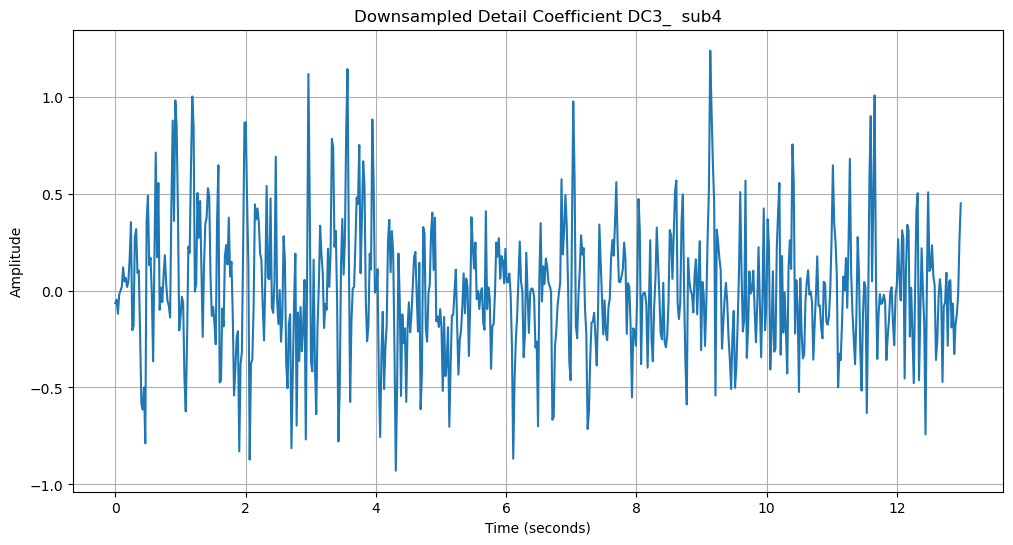

In [70]:
# Downsample DC3_sub1 to match the length of DC4_sub1
downsampled_length = len(DC3_sub4)
downsampled_DC3_sub4 = DC2_sub4[:downsampled_length]


#  a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub4 = np.linspace(0, len(downsampled_DC3_sub4) / fs, len(downsampled_DC3_sub4))

cardiac_signal_sub4 = DC2_sub4[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub4, cardiac_signal_sub4)
plt.title("Downsampled Detail Coefficient DC3_  sub4")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

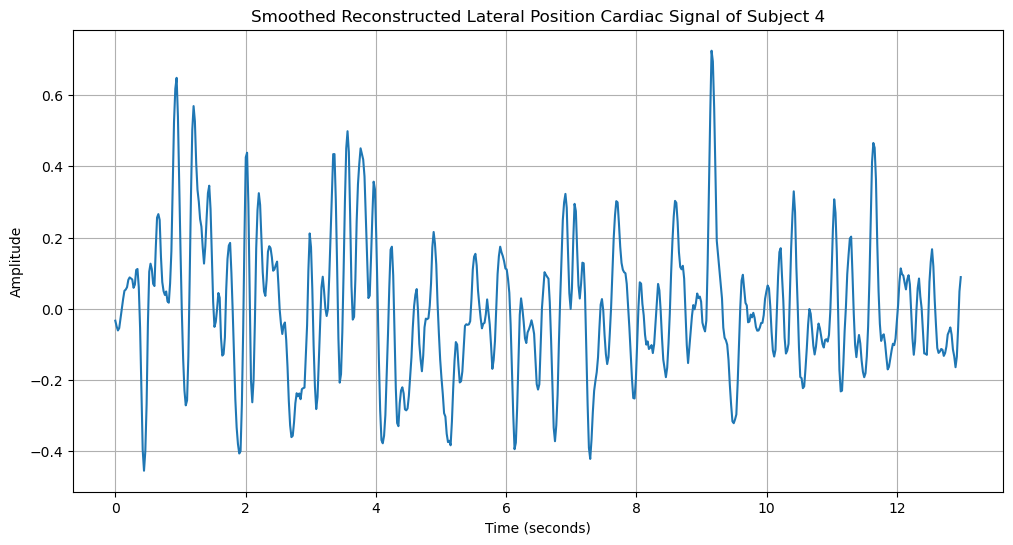

In [71]:
# smoothing window size
window_size = 4

# Create an empty array for the smoothed signal
smoothed_cardiac_signal_sub4 = np.zeros_like(cardiac_signal_sub4)

#  the moving average smoothing
for i in range(len(cardiac_signal_sub4)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub4), i + window_size // 2)
    smoothed_cardiac_signal_sub4[i] = np.mean(cardiac_signal_sub4[start_idx:end_idx])
    
smoothed_cardiac_signal_sub4 = np.convolve(smoothed_cardiac_signal_sub4, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub4, smoothed_cardiac_signal_sub4)
plt.title("Smoothed Reconstructed Lateral Position Cardiac Signal of Subject 4")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub4 = smoothed_cardiac_signal_sub4

# BCG DECOMPSOITION OF SUBJECT 4

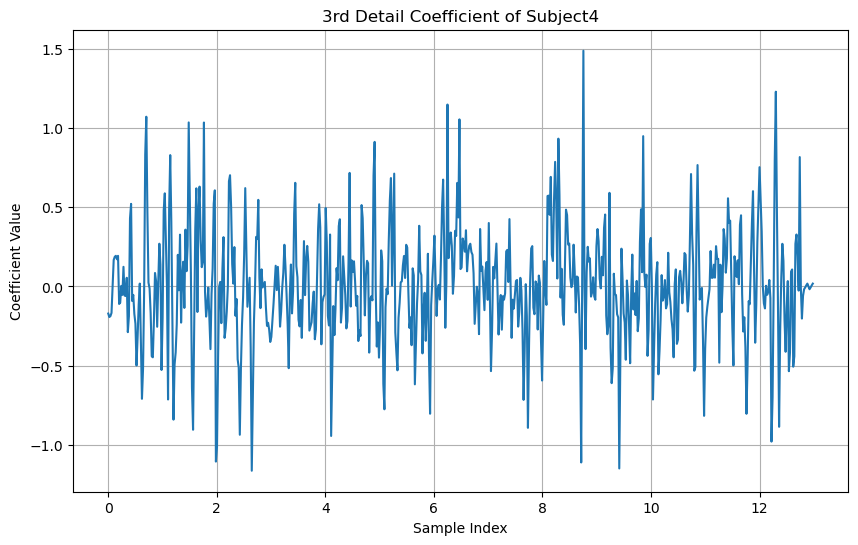

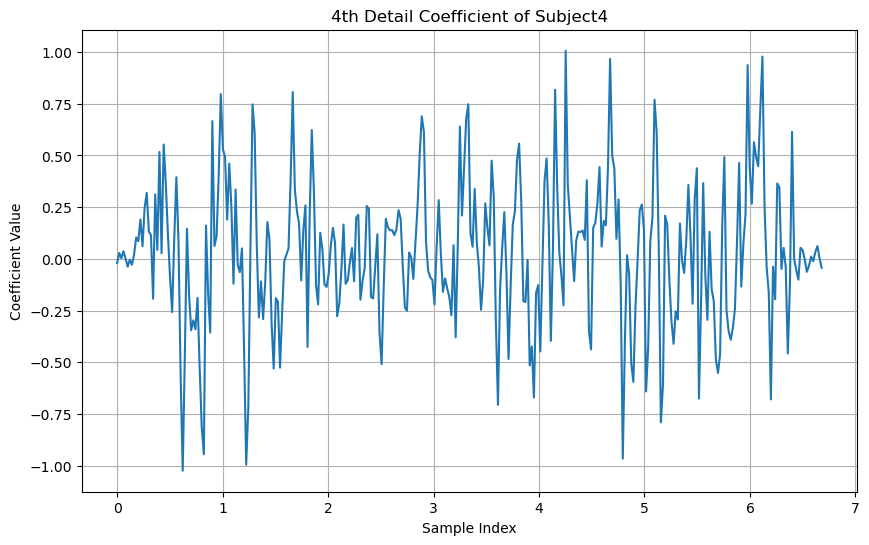

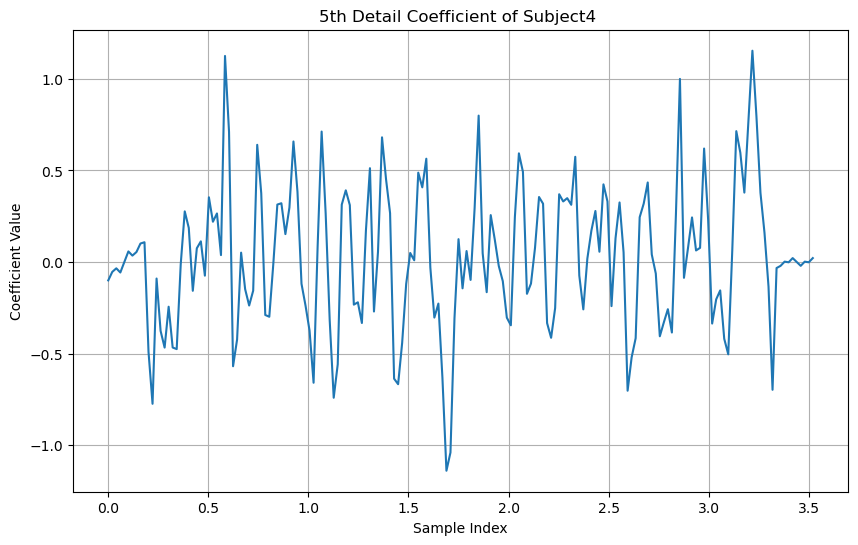

In [77]:
# Retrieve the 3rd detail coefficient for subject 4
DC2_sub4 = features_dict_signal4['Detail_Coefficients'][5]
DC3_sub4 = features_dict_signal4['Detail_Coefficients'][4]
DC4_sub4 = features_dict_signal4['Detail_Coefficients'][3]
DC5_sub4 = features_dict_signal4['Detail_Coefficients'][2]

# TIme domain of subject 5
segment_time_DC3_sub4 = np.linspace(0, len(DC3_sub4) / fs, len(DC3_sub4))
segment_time_DC4_sub4 = np.linspace(0, len(DC4_sub4) / fs, len(DC4_sub4))
segment_time_DC5_sub4 = np.linspace(0, len(DC5_sub4) / fs, len(DC5_sub4))
segment_time_DC2_sub4 = np.linspace(0, len(DC2_sub4) / fs, len(DC2_sub4))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub4, DC3_sub4)
plt.title('3rd Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub4, DC4_sub4)
plt.title('4th Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub4, DC5_sub4)
plt.title('5th Detail Coefficient of Subject4 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# BCG DECOMPSOITION OF SUBJECT 4

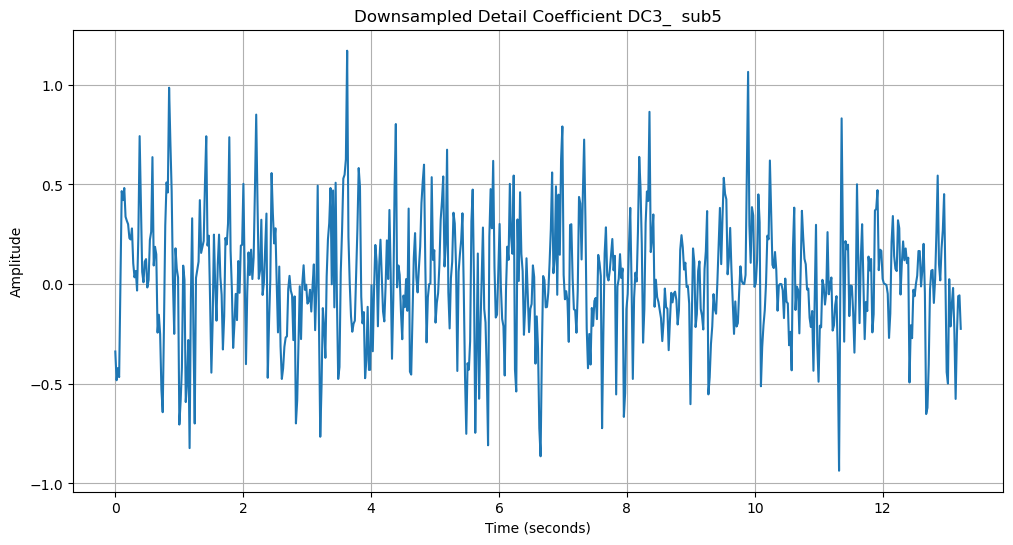

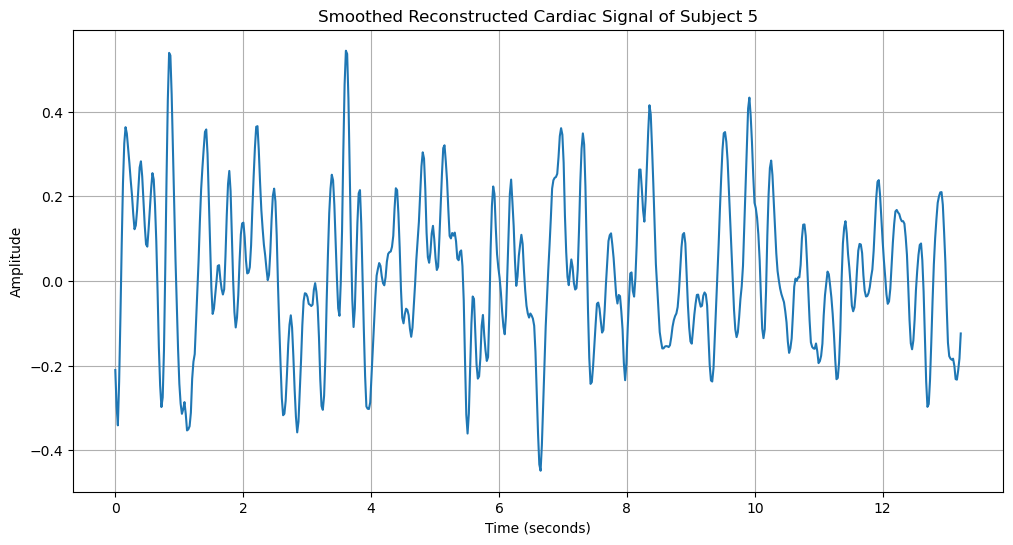

In [78]:
# retrieve the detail co-efficient of Subject 5
DC2_sub5 = features_dict_signal5['Detail_Coefficients'][5]
DC3_sub5 = features_dict_signal5['Detail_Coefficients'][4]
DC4_sub5 = features_dict_signal5['Detail_Coefficients'][3]
DC5_sub5 = features_dict_signal5['Detail_Coefficients'][2]

# Time domain
segment_time_DC3_sub5 = np.linspace(0, len(DC3_sub5) / fs, len(DC3_sub5))
segment_time_DC4_sub5 = np.linspace(0, len(DC4_sub5) / fs, len(DC4_sub5))
segment_time_DC5_sub5 = np.linspace(0, len(DC5_sub5) / fs, len(DC5_sub5))
segment_time_DC2_sub5 = np.linspace(0, len(DC2_sub5) / fs, len(DC2_sub5))


# Downsample DC3_sub1 to match the length of DC4_sub1
downsampled_length = len(DC3_sub5)
downsampled_DC3_sub5 = DC2_sub5[:downsampled_length]


#  a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub5 = np.linspace(0, len(downsampled_DC3_sub5) / fs, len(downsampled_DC3_sub5))

cardiac_signal_sub5 = DC2_sub5[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub5, cardiac_signal_sub5)
plt.title("Downsampled Detail Coefficient DC3_  sub5")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


window_size = 4

#  an empty array for the smoothed signal
smoothed_cardiac_signal_sub5 = np.zeros_like(cardiac_signal_sub5)

# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub5)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub5), i + window_size // 2+1)
    smoothed_cardiac_signal_sub5[i] = np.mean(cardiac_signal_sub5[start_idx:end_idx])
    
smoothed_cardiac_signal_sub5 = np.convolve(smoothed_cardiac_signal_sub5, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub5, smoothed_cardiac_signal_sub5)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 5")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub5 = smoothed_cardiac_signal_sub5

# BCG DECOMPSOITION OF SUBJECT 6 - 10

In [28]:
DC2_sub6 = features_dict_signal6['Detail_Coefficients'][5] ; segment_time_DC2_sub6 = np.linspace(0, len(DC2_sub6) / fs, len(DC2_sub6))
DC3_sub6 = features_dict_signal6['Detail_Coefficients'][4] ; segment_time_DC3_sub6 = np.linspace(0, len(DC3_sub6) / fs, len(DC3_sub6))
DC4_sub6 = features_dict_signal6['Detail_Coefficients'][3] ; segment_time_DC4_sub6 = np.linspace(0, len(DC4_sub6) / fs, len(DC4_sub6))
DC5_sub6 = features_dict_signal6['Detail_Coefficients'][2] ; segment_time_DC5_sub6 = np.linspace(0, len(DC5_sub6) / fs, len(DC5_sub6))

DC2_sub7 = features_dict_signal7['Detail_Coefficients'][5] ; segment_time_DC2_sub7 = np.linspace(0, len(DC2_sub7) / fs, len(DC2_sub7))
DC3_sub7 = features_dict_signal7['Detail_Coefficients'][4] ; segment_time_DC3_sub7 = np.linspace(0, len(DC3_sub7) / fs, len(DC3_sub7))
DC4_sub7 = features_dict_signal7['Detail_Coefficients'][3] ; segment_time_DC4_sub7 = np.linspace(0, len(DC4_sub7) / fs, len(DC4_sub7))
DC5_sub7 = features_dict_signal7['Detail_Coefficients'][2] ; segment_time_DC5_sub7 = np.linspace(0, len(DC5_sub7) / fs, len(DC5_sub7))

DC2_sub8 = features_dict_signal8['Detail_Coefficients'][5] ; segment_time_DC2_sub8 = np.linspace(0, len(DC2_sub8) / fs, len(DC2_sub8))
DC3_sub8 = features_dict_signal8['Detail_Coefficients'][4] ; segment_time_DC3_sub8 = np.linspace(0, len(DC3_sub8) / fs, len(DC3_sub8))
DC4_sub8 = features_dict_signal8['Detail_Coefficients'][3] ; segment_time_DC4_sub8 = np.linspace(0, len(DC4_sub8) / fs, len(DC4_sub8))
DC5_sub8 = features_dict_signal8['Detail_Coefficients'][2] ; segment_time_DC5_sub8 = np.linspace(0, len(DC5_sub8) / fs, len(DC5_sub8))

DC2_sub9 = features_dict_signal9['Detail_Coefficients'][5] ; segment_time_DC2_sub9 = np.linspace(0, len(DC2_sub9) / fs, len(DC2_sub9))
DC3_sub9 = features_dict_signal9['Detail_Coefficients'][4] ; segment_time_DC3_sub9 = np.linspace(0, len(DC3_sub9) / fs, len(DC3_sub9))
DC4_sub9 = features_dict_signal9['Detail_Coefficients'][3] ; segment_time_DC4_sub9 = np.linspace(0, len(DC4_sub9) / fs, len(DC4_sub9))
DC5_sub9 = features_dict_signal9['Detail_Coefficients'][2] ; segment_time_DC5_sub9 = np.linspace(0, len(DC5_sub9) / fs, len(DC5_sub9))

DC2_sub10 = features_dict_signal10['Detail_Coefficients'][5] ; segment_time_DC2_sub10 = np.linspace(0, len(DC2_sub10) / fs, len(DC2_sub10))
DC3_sub10 = features_dict_signal10['Detail_Coefficients'][4] ; segment_time_DC3_sub10 = np.linspace(0, len(DC3_sub10) / fs, len(DC3_sub10))
DC4_sub10 = features_dict_signal10['Detail_Coefficients'][3] ; segment_time_DC4_sub10 = np.linspace(0, len(DC4_sub10) / fs, len(DC4_sub10))
DC5_sub10 = features_dict_signal10['Detail_Coefficients'][2] ; segment_time_DC5_sub10 = np.linspace(0, len(DC5_sub10) / fs, len(DC5_sub10))

# DOWNSAMPLED SIGNAL OF SUBJECT 6 - 10

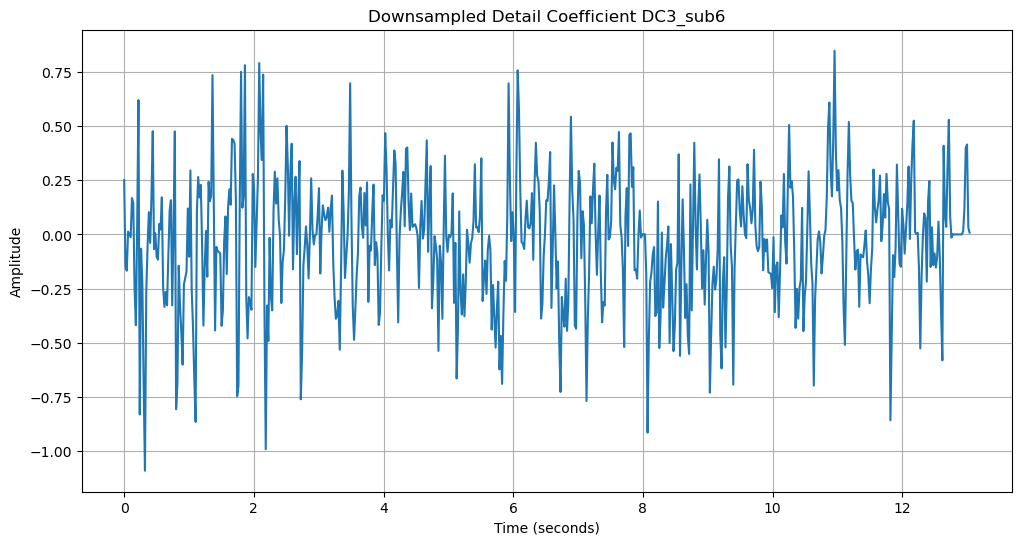

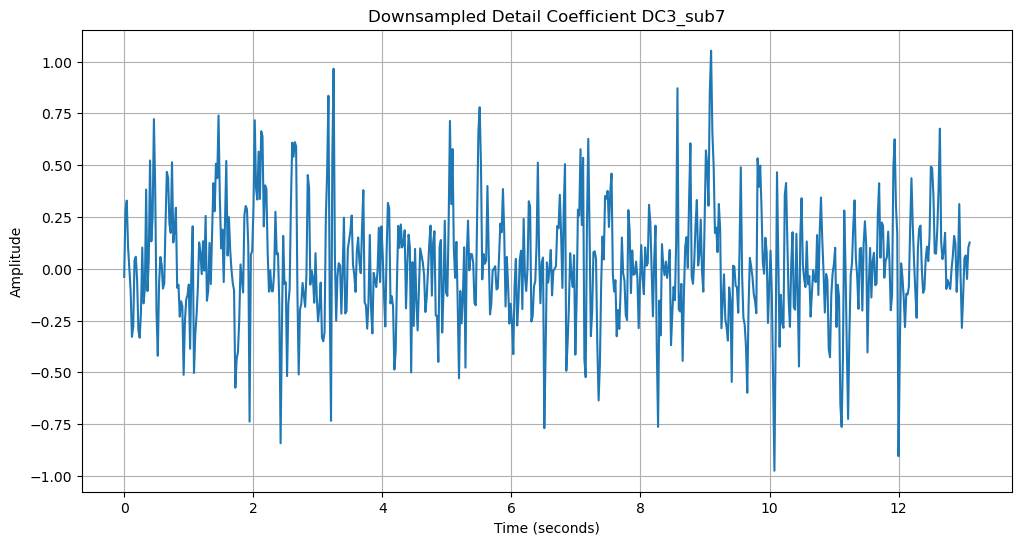

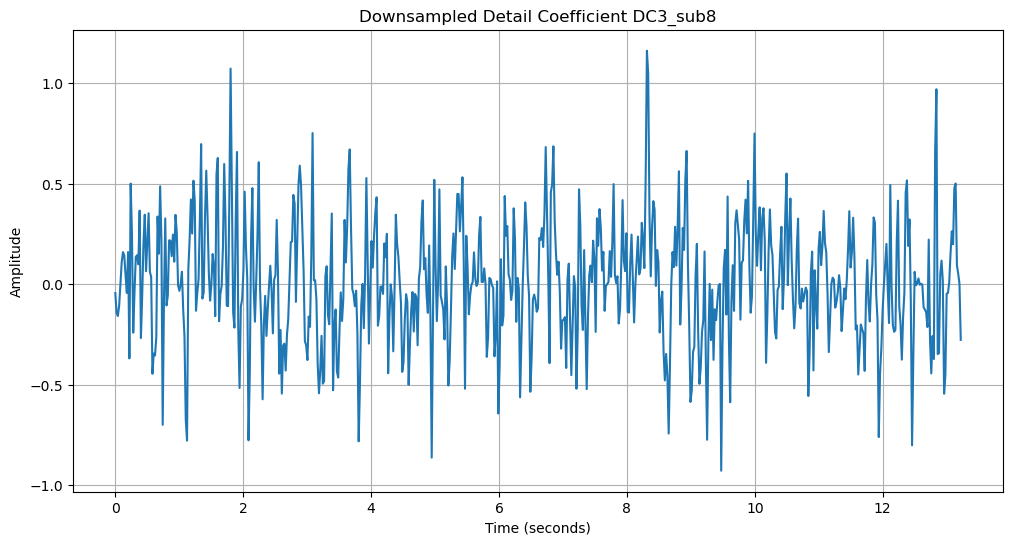

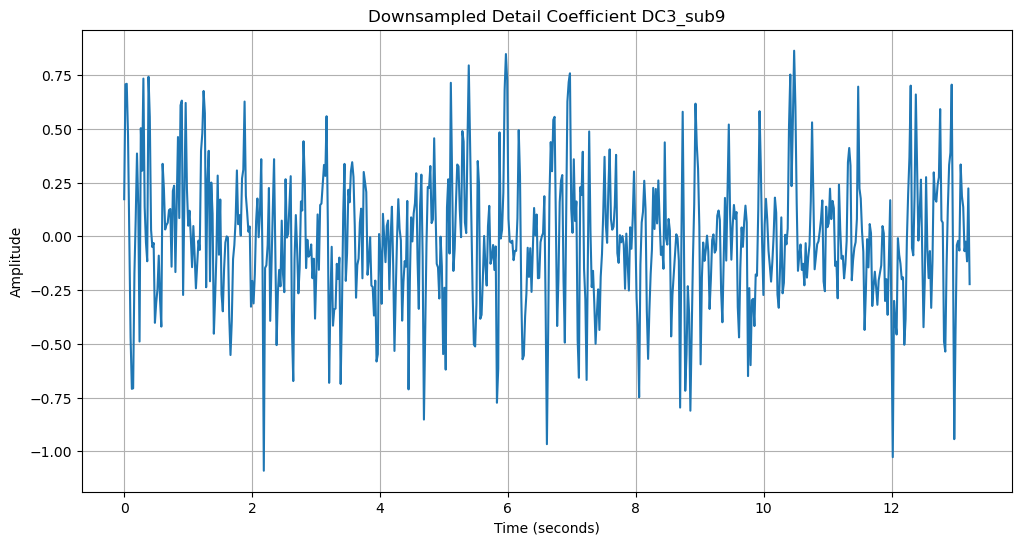

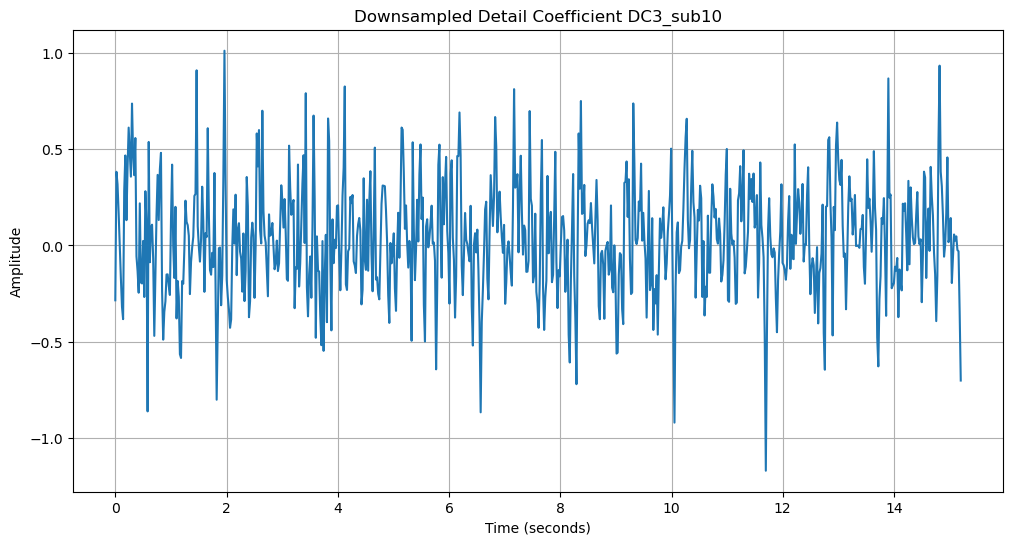

In [79]:
# Downsample DC3 to match the length of DC2_sub6
downsampled_length = len(DC3_sub6)
downsampled_DC3_sub6 = DC2_sub6[:downsampled_length]

#  time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub6 = np.linspace(0, len(downsampled_DC3_sub6) / fs, len(downsampled_DC3_sub6))

cardiac_signal_sub6 = DC2_sub6[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub6, cardiac_signal_sub6)
plt.title("Downsampled Detail Coefficient DC3_sub6")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()





# Downsample DC3 to match the length of DC2_sub7
downsampled_length = len(DC3_sub7)
downsampled_DC3_sub7 = DC2_sub7[:downsampled_length]

# time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub7 = np.linspace(0, len(downsampled_DC3_sub7) / fs, len(downsampled_DC3_sub7))

cardiac_signal_sub7 = DC2_sub7[:downsampled_length]

plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub7, cardiac_signal_sub7)
plt.title("Downsampled Detail Coefficient DC3_sub7")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()




# Downsample DC3 to match the length of DC2_sub8
downsampled_length = len(DC3_sub8)
downsampled_DC3_sub8 = DC2_sub8[:downsampled_length]

#  time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub8 = np.linspace(0, len(downsampled_DC3_sub8) / fs, len(downsampled_DC3_sub8))

cardiac_signal_sub8 = DC2_sub8[:downsampled_length]

plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub8, cardiac_signal_sub8)
plt.title("Downsampled Detail Coefficient DC3_sub8")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()




# Downsample DC3 to match the length of DC2_sub9
downsampled_length = len(DC3_sub9)
downsampled_DC3_sub9 = DC2_sub9[:downsampled_length]

# Create a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub9 = np.linspace(0, len(downsampled_DC3_sub9) / fs, len(downsampled_DC3_sub9))

cardiac_signal_sub9 = DC2_sub9[:downsampled_length]

plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub9, cardiac_signal_sub9)
plt.title("Downsampled Detail Coefficient DC3_sub9")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()




# Downsample DC3_sub to match the length of DC2_sub10
downsampled_length = len(DC3_sub10)
downsampled_DC3_sub10 = DC2_sub10[:downsampled_length]

# Create a time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub10 = np.linspace(0, len(downsampled_DC3_sub10) / fs, len(downsampled_DC3_sub10))

cardiac_signal_sub10 = DC2_sub10[:downsampled_length]

plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub10, cardiac_signal_sub10)
plt.title("Downsampled Detail Coefficient DC3_sub10")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# APPLY SMOOTHING AVERAGE TO SUBJECT 6 - 10

In [32]:
# a smoothing window size
window_size = 4
# Apply the moving average smoothing
smoothed_cardiac_signal_sub6 = np.zeros_like(cardiac_signal_sub6)
for i in range(len(cardiac_signal_sub6)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub6), i + window_size // 2)
    smoothed_cardiac_signal_sub6[i] = np.mean(cardiac_signal_sub6[start_idx:end_idx])
smoothed_cardiac_signal_sub6 = np.convolve(smoothed_cardiac_signal_sub6, np.ones(window_size)/window_size, mode='same')



window_size = 4
smoothed_cardiac_signal_sub7 = np.zeros_like(cardiac_signal_sub7)
# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub7)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub7), i + window_size // 2)
    smoothed_cardiac_signal_sub7[i] = np.mean(cardiac_signal_sub7[start_idx:end_idx])
smoothed_cardiac_signal_sub7 = np.convolve(smoothed_cardiac_signal_sub7, np.ones(window_size)/window_size, mode='same')
    

    
window_size = 4
smoothed_cardiac_signal_sub8 = np.zeros_like(cardiac_signal_sub8)
# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub8)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub8), i + window_size // 2)
    smoothed_cardiac_signal_sub8[i] = np.mean(cardiac_signal_sub8[start_idx:end_idx])
smoothed_cardiac_signal_sub8 = np.convolve(smoothed_cardiac_signal_sub8, np.ones(window_size)/window_size, mode='same')



window_size = 4
smoothed_cardiac_signal_sub9 = np.zeros_like(cardiac_signal_sub8)
# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub9)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub9), i + window_size // 2)
    smoothed_cardiac_signal_sub9[i] = np.mean(cardiac_signal_sub9[start_idx:end_idx])
smoothed_cardiac_signal_sub9 = np.convolve(smoothed_cardiac_signal_sub9, np.ones(window_size)/window_size, mode='same')



window_size = 4
smoothed_cardiac_signal_sub10 = np.zeros_like(cardiac_signal_sub10)
# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub10)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub10), i + window_size // 2)
    smoothed_cardiac_signal_sub10[i] = np.mean(cardiac_signal_sub10[start_idx:end_idx])
smoothed_cardiac_signal_sub10 = np.convolve(smoothed_cardiac_signal_sub10, np.ones(window_size)/window_size, mode='same')


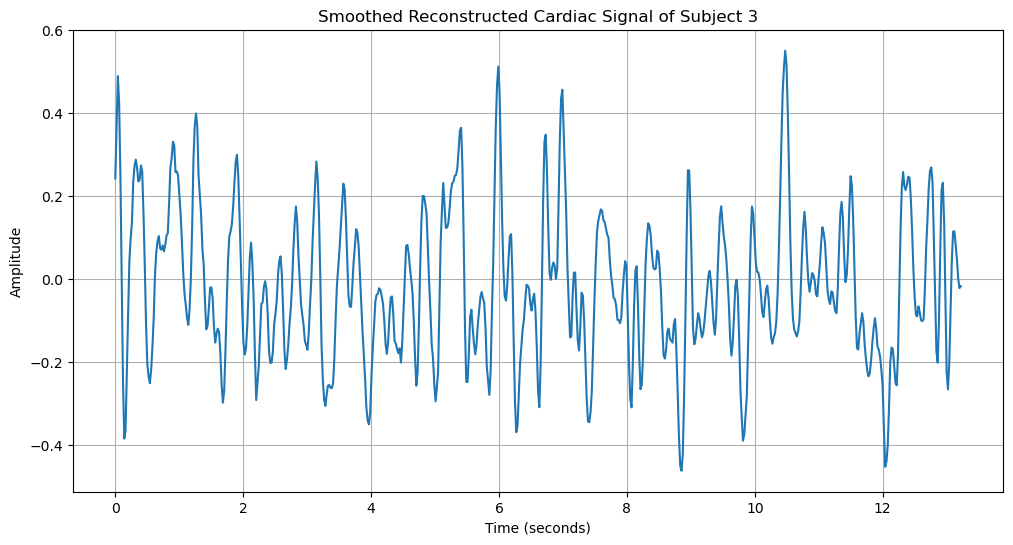

In [33]:
# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub9, smoothed_cardiac_signal_sub9)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub6 = smoothed_cardiac_signal_sub6
cardiac_signal_sub7 = smoothed_cardiac_signal_sub7
cardiac_signal_sub8 = smoothed_cardiac_signal_sub8
cardiac_signal_sub9 = smoothed_cardiac_signal_sub9
cardiac_signal_sub10 = smoothed_cardiac_signal_sub10

# HRV TIME DOMAIN ANALYSIS FOR BCG

In [102]:
import numpy as np
from scipy.signal import find_peaks
import neurokit2 as nk
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import describe
import neurokit2 as nk

DWT_derivative_sub1 = np.diff(cardiac_signal_sub1) ; DWT_derivative_sub2 = np.diff(cardiac_signal_sub2)
DWT_derivative_sub3 = np.diff(cardiac_signal_sub3) ; DWT_derivative_sub4 = np.diff(cardiac_signal_sub4)
DWT_derivative_sub5 = np.diff(cardiac_signal_sub5) ; DWT_derivative_sub6 = np.diff(cardiac_signal_sub6)
DWT_derivative_sub7 = np.diff(cardiac_signal_sub7) ; DWT_derivative_sub8 = np.diff(cardiac_signal_sub8)
DWT_derivative_sub9 = np.diff(cardiac_signal_sub9) ; DWT_derivative_sub10 = np.diff(cardiac_signal_sub10)


min_peak_distance = 29
sampling_frequency = 50 
jpeak_indices_sub1, _ = find_peaks(DWT_derivative_sub1, distance= min_peak_distance)
jpeak_indices_sub2, _ = find_peaks(DWT_derivative_sub2, distance = min_peak_distance)
jpeak_indices_sub3, _ = find_peaks(DWT_derivative_sub3, distance = min_peak_distance)
jpeak_indices_sub4, _ = find_peaks(DWT_derivative_sub4, distance= min_peak_distance)
jpeak_indices_sub5, _ = find_peaks(DWT_derivative_sub5, distance= min_peak_distance)
jpeak_indices_sub6, _ = find_peaks(DWT_derivative_sub6, distance= min_peak_distance)
jpeak_indices_sub7, _ = find_peaks(DWT_derivative_sub7, distance= min_peak_distance)
jpeak_indices_sub8, _ = find_peaks(DWT_derivative_sub8, distance= min_peak_distance)
jpeak_indices_sub9, _ = find_peaks(DWT_derivative_sub9, distance= min_peak_distance)
jpeak_indices_sub10, _ = find_peaks(DWT_derivative_sub10, distance= min_peak_distance)


# Calculate BCG timestamps
bcg_timestamps_sub1 = jpeak_indices_sub1 / sampling_frequency ; bcg_timestamps_sub2 = jpeak_indices_sub2 / sampling_frequency
bcg_timestamps_sub3 = jpeak_indices_sub3 / sampling_frequency ; bcg_timestamps_sub4 = jpeak_indices_sub4 / sampling_frequency
bcg_timestamps_sub5 = jpeak_indices_sub5 / sampling_frequency ; bcg_timestamps_sub6 = jpeak_indices_sub6 / sampling_frequency
bcg_timestamps_sub7 = jpeak_indices_sub7 / sampling_frequency ; bcg_timestamps_sub8 = jpeak_indices_sub8 / sampling_frequency
bcg_timestamps_sub9 = jpeak_indices_sub9 / sampling_frequency ; bcg_timestamps_sub10 = jpeak_indices_sub10 / sampling_frequency


max_timestamp = 12
filtered_bcg_timestamps1 = bcg_timestamps_sub1[bcg_timestamps_sub1 < max_timestamp]
filtered_bcg_timestamps2 = bcg_timestamps_sub2[bcg_timestamps_sub2 < max_timestamp]
filtered_bcg_timestamps3 = bcg_timestamps_sub3[bcg_timestamps_sub3 < max_timestamp]
filtered_bcg_timestamps4 = bcg_timestamps_sub4[bcg_timestamps_sub4 < max_timestamp]
filtered_bcg_timestamps5 = bcg_timestamps_sub5[bcg_timestamps_sub5 < max_timestamp]
filtered_bcg_timestamps6 = bcg_timestamps_sub6[bcg_timestamps_sub6 < max_timestamp]
filtered_bcg_timestamps7 = bcg_timestamps_sub7[bcg_timestamps_sub7 < max_timestamp]
filtered_bcg_timestamps8 = bcg_timestamps_sub8[bcg_timestamps_sub8 < max_timestamp]
filtered_bcg_timestamps9 = bcg_timestamps_sub9[bcg_timestamps_sub9 < max_timestamp]
filtered_bcg_timestamps10 = bcg_timestamps_sub10[bcg_timestamps_sub10 < max_timestamp]


# Calculate the J-J intervals for the 12s timestamp
jj_intervals_sub1 = np.diff(jpeak_indices_sub1) ; jj_intervals_sub2 = np.diff(jpeak_indices_sub2)
jj_intervals_sub3 = np.diff(jpeak_indices_sub3) ; jj_intervals_sub4 = np.diff(jpeak_indices_sub4)
jj_intervals_sub5 = np.diff(jpeak_indices_sub5) ; jj_intervals_sub6 = np.diff(jpeak_indices_sub6)
jj_intervals_sub7 = np.diff(jpeak_indices_sub7) ; jj_intervals_sub8 = np.diff(jpeak_indices_sub8)
jj_intervals_sub9 = np.diff(jpeak_indices_sub9) ; jj_intervals_sub10 = np.diff(jpeak_indices_sub10)


# Convert J-J intervals to time units (seconds)
sampling_frequency = 50 
jj_intervals_time_sub1 = jj_intervals_sub1 / sampling_frequency ; jj_intervals_time_sub2 = jj_intervals_sub2 / sampling_frequency
jj_intervals_time_sub3 = jj_intervals_sub3 / sampling_frequency ; jj_intervals_time_sub4 = jj_intervals_sub4 / sampling_frequency
jj_intervals_time_sub5 = jj_intervals_sub5 / sampling_frequency ; jj_intervals_time_sub6 = jj_intervals_sub6 / sampling_frequency
jj_intervals_time_sub7 = jj_intervals_sub7 / sampling_frequency ; jj_intervals_time_sub8 = jj_intervals_sub8 / sampling_frequency
jj_intervals_time_sub9 = jj_intervals_sub9 / sampling_frequency ; jj_intervals_time_sub10 = jj_intervals_sub10 / sampling_frequency


# Print the J-J intervals in time units
print("J-J Intervals (seconds):", jj_intervals_time_sub1) 
print("J-J Intervals (seconds):", jj_intervals_time_sub2)
print("J-J Intervals (seconds):", jj_intervals_time_sub3) 
print("J-J Intervals (seconds):", jj_intervals_time_sub4)
print("J-J Intervals (seconds):", jj_intervals_time_sub5) 
print("J-J Intervals (seconds):", jj_intervals_time_sub6)
print("J-J Intervals (seconds):", jj_intervals_time_sub7) 
print("J-J Intervals (seconds):", jj_intervals_time_sub8)
print("J-J Intervals (seconds):", jj_intervals_time_sub9) 
print("J-J Intervals (seconds):", jj_intervals_time_sub10)


# Create a list of your filtered JJ intervals lists
jj_intervals_lists = [jj_intervals_time_sub1, jj_intervals_time_sub2, jj_intervals_time_sub3, 
                      jj_intervals_time_sub4, jj_intervals_time_sub4, jj_intervals_time_sub6,
                     jj_intervals_time_sub7, jj_intervals_time_sub6, jj_intervals_time_sub9,
                     jj_intervals_time_sub10,]

# Iterate through each list and filter out intervals above 1.2
for idx, jj_intervals in enumerate(jj_intervals_lists, start=1):
    jj_intervals_lists[idx - 1] = [jj_interval for jj_interval in jj_intervals if jj_interval <= 1.2]

    
#  lists now contain only JJ intervals <= 1.2
jj_intervals_time_sub1 = np.array(jj_intervals_lists[0])
jj_intervals_time_sub2 = np.array(jj_intervals_lists[1])
jj_intervals_time_sub3 = np.array(jj_intervals_lists[2])
jj_intervals_time_sub4 = np.array(jj_intervals_lists[3])
jj_intervals_time_sub5 = np.array(jj_intervals_lists[4])
jj_intervals_time_sub6 = np.array(jj_intervals_lists[5])
jj_intervals_time_sub7 = np.array(jj_intervals_lists[6])
jj_intervals_time_sub8 = np.array(jj_intervals_lists[7])
jj_intervals_time_sub9 = np.array(jj_intervals_lists[8])
jj_intervals_time_sub10 = np.array(jj_intervals_lists[9])

J-J Intervals (seconds): [0.66 0.82 0.94 0.6  0.68 0.66 0.62 0.7  0.62 0.84 0.88 0.6  0.62 0.62
 0.64 0.58 0.9 ]
J-J Intervals (seconds): [0.72 0.6  0.8  0.82 0.64 0.78 0.62 1.22 0.64 1.04 1.1  0.7  0.88 1.02
 0.62]
J-J Intervals (seconds): [0.86 0.64 0.9  0.82 0.58 0.68 0.76 1.08 1.16 1.12 0.76 1.22 0.62 0.64
 0.72]
J-J Intervals (seconds): [0.66 0.82 0.94 0.6  0.68 0.66 0.62 0.7  0.62 0.84 0.88 0.6  0.62 0.62
 0.64 0.58 0.9 ]
J-J Intervals (seconds): [0.7  0.94 0.6  0.58 0.64 0.8  0.72 0.78 0.62 0.78 0.9  0.68 0.6  0.74
 1.16 0.8  0.62]
J-J Intervals (seconds): [0.78 0.66 0.98 0.72 0.76 0.92 0.88 0.94 0.74 1.   0.68 0.82 0.92 0.7
 0.78]
J-J Intervals (seconds): [0.64 0.92 0.62 0.64 0.84 0.82 0.58 0.72 0.98 0.64 0.76 0.86 0.68 1.04
 0.76 0.58 0.58]
J-J Intervals (seconds): [0.9  0.66 0.68 0.6  0.84 0.98 0.58 0.6  0.72 0.72 0.78 0.6  0.58 0.72
 0.72 0.6  0.58 0.7 ]
J-J Intervals (seconds): [0.62 0.58 0.74 1.02 0.76 1.12 0.76 0.64 0.62 0.94 0.64 1.06 0.62 0.78
 0.86 0.96]
J-J Intervals 

In [103]:

#  the mean J-J interval in seconds
mean_jj_interval_sub1 = np.mean(jj_intervals_time_sub1) ; mean_jj_interval_sub2 = np.mean(jj_intervals_time_sub2)
mean_jj_interval_sub3 = np.mean(jj_intervals_time_sub3) ; mean_jj_interval_sub4 = np.mean(jj_intervals_time_sub4)
mean_jj_interval_sub5 = np.mean(jj_intervals_time_sub5) ; mean_jj_interval_sub6 = np.mean(jj_intervals_time_sub6)
mean_jj_interval_sub7 = np.mean(jj_intervals_time_sub7) ; mean_jj_interval_sub8 = np.mean(jj_intervals_time_sub8)
mean_jj_interval_sub9 = np.mean(jj_intervals_time_sub9) ; mean_jj_interval_sub10 = np.mean(jj_intervals_time_sub10)


avg_jjbpm_sub1 = 60 / mean_jj_interval_sub1 ; avg_jjbpm_sub2 = 60 / mean_jj_interval_sub2
avg_jjbpm_sub3 = 60 / mean_jj_interval_sub3 ; avg_jjbpm_sub4 = 60 / mean_jj_interval_sub4
avg_jjbpm_sub5 = 60 / mean_jj_interval_sub5 ; avg_jjbpm_sub6 = 60 / mean_jj_interval_sub6
avg_jjbpm_sub7 = 60 / mean_jj_interval_sub7 ; avg_jjbpm_sub8 = 60 / mean_jj_interval_sub8
avg_jjbpm_sub9 = 60 / mean_jj_interval_sub9 ; avg_jjbpm_sub10 = 60 / mean_jj_interval_sub10



# Print the average bpm for each subject
print("Average BPM for Sub1:", avg_jjbpm_sub1) ; print("Average BPM for Sub2:", avg_jjbpm_sub2)
print("Average BPM for Sub3:", avg_jjbpm_sub3) ; print("Average BPM for Sub4:", avg_jjbpm_sub4)
print("Average BPM for Sub5:", avg_jjbpm_sub5) ; print("Average BPM for Sub5:", avg_jjbpm_sub6)
print("Average BPM for Sub5:", avg_jjbpm_sub7) ; print("Average BPM for Sub5:", avg_jjbpm_sub8)
print("Average BPM for Sub5:", avg_jjbpm_sub9) ; print("Average BPM for Sub5:", avg_jjbpm_sub10)

# Print the BCG timestamps for each subject
print("BCG Timestamps for Sub1:", bcg_timestamps_sub1) ; print("BCG Timestamps for Sub2:", bcg_timestamps_sub2)
print("BCG Timestamps for Sub3:", bcg_timestamps_sub3) ; print("BCG Timestamps for Sub4:", bcg_timestamps_sub4)
print("BCG Timestamps for Sub5:", bcg_timestamps_sub5) ; print("BCG Timestamps for Sub5:", bcg_timestamps_sub6)
print("BCG Timestamps for Sub5:", bcg_timestamps_sub7) ; print("BCG Timestamps for Sub5:", bcg_timestamps_sub8)
print("BCG Timestamps for Sub5:", bcg_timestamps_sub9) ; print("BCG Timestamps for Sub5:", bcg_timestamps_sub10)

# Extract HRV features
hrv_features_sub1 = nk.hrv(jpeak_indices_sub1, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub1)
hrv_features_sub2 = nk.hrv(jpeak_indices_sub2, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub2)
hrv_features_sub3 = nk.hrv(jpeak_indices_sub3, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub3)
hrv_features_sub4 = nk.hrv(jpeak_indices_sub4, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub4)
hrv_features_sub5 = nk.hrv(jpeak_indices_sub5, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub5)
hrv_features_sub6 = nk.hrv(jpeak_indices_sub6, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub6)
hrv_features_sub7 = nk.hrv(jpeak_indices_sub7, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub7)
hrv_features_sub8 = nk.hrv(jpeak_indices_sub8, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub8)
hrv_features_sub9 = nk.hrv(jpeak_indices_sub9, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub9)
hrv_features_sub10 = nk.hrv(jpeak_indices_sub10, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub10)


Average BPM for Sub1: 85.14190317195327
Average BPM for Sub2: 76.50273224043717
Average BPM for Sub3: 74.07407407407406
Average BPM for Sub4: 85.14190317195327
Average BPM for Sub5: 85.14190317195327
Average BPM for Sub5: 73.2899022801303
Average BPM for Sub5: 80.56872037914691
Average BPM for Sub5: 73.2899022801303
Average BPM for Sub5: 75.47169811320755
Average BPM for Sub5: 76.16361071932297
BCG Timestamps for Sub1: [ 0.48  1.14  1.96  2.9   3.5   4.18  4.84  5.46  6.16  6.78  7.62  8.5
  9.1   9.72 10.34 10.98 11.56 12.46]
BCG Timestamps for Sub2: [ 0.62  1.34  1.94  2.74  3.56  4.2   4.98  5.6   6.82  7.46  8.5   9.6
 10.3  11.18 12.2  12.82]
BCG Timestamps for Sub3: [ 0.2   1.06  1.7   2.6   3.42  4.    4.68  5.44  6.52  7.68  8.8   9.56
 10.78 11.4  12.04 12.76]
BCG Timestamps for Sub4: [ 0.48  1.14  1.96  2.9   3.5   4.18  4.84  5.46  6.16  6.78  7.62  8.5
  9.1   9.72 10.34 10.98 11.56 12.46]
BCG Timestamps for Sub5: [ 0.08  0.78  1.72  2.32  2.9   3.54  4.34  5.06  5.84  6.46

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  697.777778  116.596618         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  153.699478   157.965  ...    0.223144    3.016876   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD   HRV_KFD  \
0     1.529484       NaN        NaN         NaN  0.959387      NaN  2.720441   

    HRV_LZC  
0  1.389975  

[1 rows x 82 columns]
HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0       795.0  177.162825         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  264.776635  273.063746  ...        -inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0     3.45282     1.221863       NaN        NaN         NaN  2.118481   

 

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

In [786]:
import numpy as np
from scipy.signal import find_peaks
import neurokit2 as nk

# Define a function to calculate JJ intervals and timestamps not greater than 13 seconds
def calculate_jj_intervals_and_timestamps(DWT_derivative, sampling_frequency, max_timestamp):
    # Find local maxima in the derivative signal (J-peaks)
    jpeak_indices, _ = find_peaks(DWT_derivative, distance = min_peak_distance)
    
    # Calculate BCG timestamps
    bcg_timestamps = jpeak_indices / sampling_frequency
    
    filtered_bcg_timestamps = bcg_timestamps[bcg_timestamps < max_timestamp]
    
    
    jj_intervals = np.diff(filtered_bcg_timestamps)
    
    # Filter JJ intervals and timestamps not greater than max_timestamp
    filtered_jj_intervals = jj_intervals[jj_intervals <= max_timestamp]
    
    return filtered_jj_intervals, filtered_bcg_timestamps
    return jpeak_indices

# Define the maximum timestamp 
max_timestamp = 13

sampling_frequency = 50  

# Create a list of DWT_derivativeand subject names 
subjects = [
    (DWT_derivative_sub1, "Sub1"),
    (DWT_derivative_sub2, "Sub2"),
    (DWT_derivative_sub3, "Sub3"),
    (DWT_derivative_sub4, "Sub4"),
    (DWT_derivative_sub5, "Sub5"),
    (DWT_derivative_sub6, "Sub6"),
    (DWT_derivative_sub7, "Sub7"),
    (DWT_derivative_sub8, "Sub8"),
    (DWT_derivative_sub9, "Sub9"),
    (DWT_derivative_sub10, "Sub10"),
]

# Create dictionaries to store filtered JJ intervals and filtered BCG timestamps for each subject
filtered_jj_intervals_dict = {}
filtered_bcg_timestamps_dict = {}
jpeak_indices_dict = {}

# Iterate through subjects and calculate JJ intervals and timestamps
for subject_data, subject_name in subjects:
    filtered_jj_intervals, filtered_bcg_timestamps = calculate_jj_intervals_and_timestamps(subject_data, sampling_frequency, max_timestamp)
    
    # Store the filtered JJ intervals and filtered BCG timestamps in the dictionaries
    filtered_jj_intervals_dict[f"filtered_jj_intervals_{subject_name}"] = filtered_jj_intervals
    filtered_bcg_timestamps_dict[f"filtered_bcg_timestamps_{subject_name}"] = filtered_bcg_timestamps
    
    # Print the results for each subject
    print(f"JJ Intervals for {subject_name} (seconds):", filtered_jj_intervals)
    print(f"BCG Timestamps for {subject_name} (seconds):", filtered_bcg_timestamps)

    
    


filtered_jj_intervals_sub1 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub1"]
filtered_jj_intervals_sub2 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub2"]
filtered_jj_intervals_sub3 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub3"]
filtered_jj_intervals_sub4 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub4"]
filtered_jj_intervals_sub5 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub5"]
filtered_jj_intervals_sub6 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub6"]
filtered_jj_intervals_sub7 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub7"]
filtered_jj_intervals_sub8 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub8"]
filtered_jj_intervals_sub9 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub9"]
filtered_jj_intervals_sub10 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub10"]


# filtered BCG timestamps:
filtered_bcg_timestamps_sub1 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub1"]
filtered_bcg_timestamps_sub2 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub2"]
filtered_bcg_timestamps_sub3 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub3"]
filtered_bcg_timestamps_sub4 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub4"]
filtered_bcg_timestamps_sub5 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub5"]
filtered_bcg_timestamps_sub6 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub6"]
filtered_bcg_timestamps_sub7 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub7"]
filtered_bcg_timestamps_sub8 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub8"]
filtered_bcg_timestamps_sub9 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub9"]
filtered_bcg_timestamps_sub10 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub10"]


#   the jpeak_indices
filtered_jpeak_indices_sub1 = sampling_frequency * filtered_bcg_timestamps_sub1
filtered_jpeak_indices_sub2 = sampling_frequency * filtered_bcg_timestamps_sub2
filtered_jpeak_indices_sub3 = sampling_frequency * filtered_bcg_timestamps_sub3
filtered_jpeak_indices_sub4 = sampling_frequency * filtered_bcg_timestamps_sub4
filtered_jpeak_indices_sub5 = sampling_frequency * filtered_bcg_timestamps_sub5
filtered_jpeak_indices_sub6 = sampling_frequency * filtered_bcg_timestamps_sub6
filtered_jpeak_indices_sub7 = sampling_frequency * filtered_bcg_timestamps_sub7
filtered_jpeak_indices_sub8 = sampling_frequency * filtered_bcg_timestamps_sub8
filtered_jpeak_indices_sub9 = sampling_frequency * filtered_bcg_timestamps_sub9
filtered_jpeak_indices_sub10 = sampling_frequency * filtered_bcg_timestamps_sub10


filtered_hrv_features_sub1 = nk.hrv( filtered_jpeak_indices_sub1, sampling_rate=50) ; filtered_hrv_features_sub2 = nk.hrv( filtered_jpeak_indices_sub2, sampling_rate=50)
filtered_hrv_features_sub3 = nk.hrv( filtered_jpeak_indices_sub3, sampling_rate=50) ; filtered_hrv_features_sub4 = nk.hrv( filtered_jpeak_indices_sub4, sampling_rate=50)
filtered_hrv_features_sub5 = nk.hrv( filtered_jpeak_indices_sub5, sampling_rate=50) ; filtered_hrv_features_sub6 = nk.hrv( filtered_jpeak_indices_sub6, sampling_rate=50)
filtered_hrv_features_sub7 = nk.hrv( filtered_jpeak_indices_sub7, sampling_rate=50) ; filtered_hrv_features_sub8 = nk.hrv( filtered_jpeak_indices_sub8, sampling_rate=50)
filtered_hrv_features_sub9 = nk.hrv( filtered_jpeak_indices_sub9, sampling_rate=50) ; filtered_hrv_features_sub10 = nk.hrv( filtered_jpeak_indices_sub10, sampling_rate=50)

print("HRV Features:", filtered_hrv_features_sub1) ; print("HRV Features:", filtered_hrv_features_sub2)
print("HRV Features:", filtered_hrv_features_sub3) ; print("HRV Features:", filtered_hrv_features_sub4)
print("HRV Features:", filtered_hrv_features_sub5) ; print("HRV Features:", filtered_hrv_features_sub6)
print("HRV Features:", filtered_hrv_features_sub7) ; print("HRV Features:", filtered_hrv_features_sub8)
print("HRV Features:", filtered_hrv_features_sub9) ; print("HRV Features:", filtered_hrv_features_sub10)


JJ Intervals for Sub1 (seconds): [0.66 0.82 0.94 0.6  0.68 0.66 0.62 0.7  0.62 0.84 0.88 0.6  0.62 0.62
 0.64 0.58 0.9 ]
BCG Timestamps for Sub1 (seconds): [ 0.48  1.14  1.96  2.9   3.5   4.18  4.84  5.46  6.16  6.78  7.62  8.5
  9.1   9.72 10.34 10.98 11.56 12.46]
JJ Intervals for Sub2 (seconds): [0.72 0.6  0.8  0.82 0.64 0.78 0.62 1.22 0.64 1.04 1.1  0.7  0.88 1.02
 0.62]
BCG Timestamps for Sub2 (seconds): [ 0.62  1.34  1.94  2.74  3.56  4.2   4.98  5.6   6.82  7.46  8.5   9.6
 10.3  11.18 12.2  12.82]
JJ Intervals for Sub3 (seconds): [0.86 0.64 0.9  0.82 0.58 0.68 0.76 1.08 1.16 1.12 0.76 1.22 0.62 0.64
 0.72]
BCG Timestamps for Sub3 (seconds): [ 0.2   1.06  1.7   2.6   3.42  4.    4.68  5.44  6.52  7.68  8.8   9.56
 10.78 11.4  12.04 12.76]
JJ Intervals for Sub4 (seconds): [0.66 0.82 0.94 0.6  0.68 0.66 0.62 0.7  0.62 0.84 0.88 0.6  0.62 0.62
 0.64 0.58 0.9 ]
BCG Timestamps for Sub4 (seconds): [ 0.48  1.14  1.96  2.9   3.5   4.18  4.84  5.46  6.16  6.78  7.62  8.5
  9.1   9.72 10.3

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  704.705882  120.110243         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  160.468065  165.00505  ...    1.386294    3.852169   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD   HRV_KFD  \
0     1.500092       NaN        NaN         NaN  2.030832      NaN  3.192934   

    HRV_LZC  
0  1.202195  

[1 rows x 82 columns]
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  813.333333  198.08608         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  312.181266  323.880998  ...        -inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    3.773557     2.126155       NaN        NaN         NaN  1.526577   

 

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k


In [487]:
#  lists to store the mean JJ intervals and average BPM for each subject
mean_jj_intervals_dict = {}
overall_avg_bpm_dict = {}

# Iterate through subjects and calculate JJ intervals and timestamps
for subject_data, subject_name in subjects:
    filtered_jj_intervals, filtered_bcg_timestamps = calculate_jj_intervals_and_timestamps(subject_data, sampling_frequency, max_timestamp)
    
    mean_jj_interval = np.mean(filtered_jj_intervals)
    
    # average BPM for the subject
    avg_bpm = 60 / mean_jj_interval
    

    mean_jj_intervals_dict[f"mean_jj_intervals_{subject_name}"] = mean_jj_interval
    overall_avg_bpm_dict[f"overall_avg_bpm_{subject_name}"] = avg_bpm
    
    # Print the results for each subject
    print(f"Mean JJ Interval for {subject_name} (seconds):", mean_jj_interval)
    print(f"Average BPM for {subject_name}:", avg_bpm)

# overall average BPM across all subjects
overall_avg_bpm = 60 / np.mean(list(mean_jj_intervals_dict.values()))
print("Overall Average BPM Across All Subjects:", overall_avg_bpm)
    

filtered_mean_jj_intervals_sub1 = mean_jj_intervals_dict["mean_jj_intervals_Sub1"]
filtered_mean_jj_intervals_sub2 = mean_jj_intervals_dict["mean_jj_intervals_Sub2"]
filtered_mean_jj_intervals_sub3 = mean_jj_intervals_dict["mean_jj_intervals_Sub3"]
filtered_mean_jj_intervals_sub4 = mean_jj_intervals_dict["mean_jj_intervals_Sub4"]
filtered_mean_jj_intervals_sub5 = mean_jj_intervals_dict["mean_jj_intervals_Sub5"]
filtered_mean_jj_intervals_sub6 = mean_jj_intervals_dict["mean_jj_intervals_Sub6"]
filtered_mean_jj_intervals_sub7 = mean_jj_intervals_dict["mean_jj_intervals_Sub7"]
filtered_mean_jj_intervals_sub8 = mean_jj_intervals_dict["mean_jj_intervals_Sub8"]
filtered_mean_jj_intervals_sub9 = mean_jj_intervals_dict["mean_jj_intervals_Sub9"]
filtered_mean_jj_intervals_sub10 = mean_jj_intervals_dict["mean_jj_intervals_Sub10"]


filtered_avg_bpm_sub1 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub1"]
filtered_avg_bpm_sub2 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub2"]
filtered_avg_bpm_sub3 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub3"]
filtered_avg_bpm_sub4 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub4"]
filtered_avg_bpm_sub5 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub5"]
filtered_avg_bpm_sub6 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub6"]
filtered_avg_bpm_sub7 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub7"]
filtered_avg_bpm_sub8 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub8"]
filtered_avg_bpm_sub9 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub9"]
filtered_avg_bpm_sub10 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub10"]

Mean JJ Interval for Sub1 (seconds): 0.8771428571428571
Average BPM for Sub1: 68.40390879478828
Mean JJ Interval for Sub2 (seconds): 1.0133333333333334
Average BPM for Sub2: 59.210526315789465
Mean JJ Interval for Sub3 (seconds): 0.7247058823529412
Average BPM for Sub3: 82.79220779220779
Mean JJ Interval for Sub4 (seconds): 0.8771428571428571
Average BPM for Sub4: 68.40390879478828
Mean JJ Interval for Sub5 (seconds): 0.8771428571428571
Average BPM for Sub5: 68.40390879478828
Mean JJ Interval for Sub6 (seconds): 0.8320000000000001
Average BPM for Sub6: 72.11538461538461
Mean JJ Interval for Sub7 (seconds): 0.8200000000000001
Average BPM for Sub7: 73.17073170731707
Mean JJ Interval for Sub8 (seconds): 0.8119999999999999
Average BPM for Sub8: 73.89162561576356
Mean JJ Interval for Sub9 (seconds): 0.7575
Average BPM for Sub9: 79.20792079207921
Mean JJ Interval for Sub10 (seconds): 0.8213333333333334
Average BPM for Sub10: 73.05194805194805
Overall Average BPM Across All Subjects: 71.32412

# LOAD ECG DATASET AND PREPROCESS

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg


ecg_subject1 = pd.read_csv("aa1_ecg_l.csv") 
ecg_subject2 = pd.read_csv("aa2_ecg_l.csv")
ecg_subject3 = pd.read_csv("ab4_ecg_l.csv")
ecg_subject4 = pd.read_csv("ab5_ecg_l.csv")
ecg_subject5 = pd.read_csv("ca2_ecg_l.csv")
ecg_subject6 = pd.read_csv("ca3_ecg_l.csv")
ecg_subject7 = pd.read_csv("ca4_ecg_l.csv")
ecg_subject8 = pd.read_csv("dv1_ecg_l.csv")
ecg_subject9 = pd.read_csv("dv2_ecg_l.csv")
ecg_subject10 = pd.read_csv("ga1_ecg_l.csv")
ecg_subject11 = pd.read_csv("mg1_ecg_l.csv")
ecg_subject12 = pd.read_csv("mg2_ecg_l.csv")
ecg_subject13 = pd.read_csv("mh1_ecg_l.csv")
ecg_subject14 = pd.read_csv("mh2_ecg_l.csv")

# Extract the ECG signal and sampling frequency from the DataFrame
ecg_signal1 = ecg_subject1['ECG II'].values
ecg_signal2 = ecg_subject2['ECG II'].values
ecg_signal3 = ecg_subject3['ECG II'].values
ecg_signal4 = ecg_subject4['ECG II'].values
ecg_signal5 = ecg_subject5['ECG II'].values
ecg_signal6 = ecg_subject6['ECG II'].values
ecg_signal7 = ecg_subject7['ECG II'].values
ecg_signal8 = ecg_subject8['ECG II'].values
ecg_signal9 = ecg_subject9['ECG II'].values
ecg_signal10 = ecg_subject10['ECG II'].values


sampling_frequency_ecg = 256 

ecg_duration1 = len(ecg_signal1) / sampling_frequency_ecg; ecg_time1 = np.linspace(0, ecg_duration1, len(ecg_signal1))
ecg_duration2 = len(ecg_signal2) / sampling_frequency_ecg; ecg_time2 = np.linspace(0, ecg_duration2, len(ecg_signal2))
ecg_duration3 = len(ecg_signal3) / sampling_frequency_ecg; ecg_time3 = np.linspace(0, ecg_duration3, len(ecg_signal3))
ecg_duration4 = len(ecg_signal4) / sampling_frequency_ecg; ecg_time4 = np.linspace(0, ecg_duration4, len(ecg_signal4))
ecg_duration5 = len(ecg_signal5) / sampling_frequency_ecg; ecg_time5 = np.linspace(0, ecg_duration5, len(ecg_signal5))
ecg_duration6 = len(ecg_signal6) / sampling_frequency_ecg; ecg_time6 = np.linspace(0, ecg_duration6, len(ecg_signal6))
ecg_duration7 = len(ecg_signal7) / sampling_frequency_ecg; ecg_time7 = np.linspace(0, ecg_duration7, len(ecg_signal7))
ecg_duration8 = len(ecg_signal8) / sampling_frequency_ecg; ecg_time8 = np.linspace(0, ecg_duration8, len(ecg_signal8))
ecg_duration9 = len(ecg_signal9) / sampling_frequency_ecg; ecg_time9 = np.linspace(0, ecg_duration9, len(ecg_signal9))
ecg_duration10 = len(ecg_signal10) / sampling_frequency_ecg; ecg_time10 = np.linspace(0, ecg_duration10, len(ecg_signal10))

In [82]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Sampling frequency (fs) and order for the Butterworth filter
fs = 256  
order = 3

# Define cutoff frequencies
low_cutoff = 0.5  # Hz
high_cutoff = 20  


#  bandpass filter to each raw BCG signal
ecg_signal1 = butter_bandpass_filter(ecg_signal1, low_cutoff, high_cutoff, fs, order)
ecg_signal2 = butter_bandpass_filter(ecg_signal2, low_cutoff, high_cutoff, fs, order)
ecg_signal3 = butter_bandpass_filter(ecg_signal3, low_cutoff, high_cutoff, fs, order)
ecg_signal4 = butter_bandpass_filter(ecg_signal4, low_cutoff, high_cutoff, fs, order)
ecg_signal5 = butter_bandpass_filter(ecg_signal5, low_cutoff, high_cutoff, fs, order)
ecg_signal6 = butter_bandpass_filter(ecg_signal6, low_cutoff, high_cutoff, fs, order)
ecg_signal7 = butter_bandpass_filter(ecg_signal7, low_cutoff, high_cutoff, fs, order)
ecg_signal8 = butter_bandpass_filter(ecg_signal8, low_cutoff, high_cutoff, fs, order)
ecg_signal9 = butter_bandpass_filter(ecg_signal9, low_cutoff, high_cutoff, fs, order)
ecg_signal10 = butter_bandpass_filter(ecg_signal10, low_cutoff, high_cutoff, fs, order)

In [83]:
data_frame = [ecg_signal1, ecg_signal2, ecg_signal3, ecg_signal4,
              ecg_signal5, ecg_signal6, ecg_signal7 ,ecg_signal8, ecg_signal9, ecg_signal10]  

# Loop through each data frame and perform scaling
for i, df in enumerate(data_frame):
    min_value = df.min()
    max_value = df.max()
    scaled_df = (df - min_value) / (max_value - min_value)
    data_frames[i] = scaled_df  

ecg_signal1 = data_frame[0] ; ecg_signal2 = data_frame[1]
ecg_signal3 = data_frame[2] ; ecg_signal4 = data_frame[3]
ecg_signal5 = data_frame[4] ; ecg_signal6 = data_frame[5]
ecg_signal7 = data_frame[6] ; ecg_signal8 = data_frame[7]
ecg_signal9 = data_frame[8] ; ecg_signal10 = data_frame[9]


In [84]:
# Perform R-peak detection using biosppy.signals.ecg
rpeaks_sub1 = ecg.ecg(signal=ecg_signal1, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub1 = ecg_time1[rpeaks_sub1]

rpeaks_sub2 = ecg.ecg(signal=ecg_signal2, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub2 = ecg_time2[rpeaks_sub2]

rpeaks_sub3 = ecg.ecg(signal=ecg_signal3, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub3 = ecg_time3[rpeaks_sub3]

rpeaks_sub4 = ecg.ecg(signal=ecg_signal4, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub4 = ecg_time3[rpeaks_sub4]

rpeaks_sub5 = ecg.ecg(signal=ecg_signal5, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub5 = ecg_time3[rpeaks_sub5]

rpeaks_sub6 = ecg.ecg(signal=ecg_signal6, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub6 = ecg_time6[rpeaks_sub6]

rpeaks_sub7 = ecg.ecg(signal=ecg_signal7, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub7 = ecg_time7[rpeaks_sub7]

rpeaks_sub8 = ecg.ecg(signal=ecg_signal8, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub8 = ecg_time8[rpeaks_sub8]

rpeaks_sub9 = ecg.ecg(signal=ecg_signal9, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub9 = ecg_time9[rpeaks_sub9]

rpeaks_sub10 = ecg.ecg(signal=ecg_signal10, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub10 = ecg_time10[rpeaks_sub10]

rr_intervals_sub1 = np.diff(rpeak_times_sub1) ; rr_intervals_sub2 = np.diff(rpeak_times_sub2)
rr_intervals_sub3 = np.diff(rpeak_times_sub3) ; rr_intervals_sub4 = np.diff(rpeak_times_sub4)
rr_intervals_sub5 = np.diff(rpeak_times_sub5) ; rr_intervals_sub6 = np.diff(rpeak_times_sub6)
rr_intervals_sub7 = np.diff(rpeak_times_sub7) ; rr_intervals_sub8 = np.diff(rpeak_times_sub8)
rr_intervals_sub9 = np.diff(rpeak_times_sub9) ; rr_intervals_sub10 = np.diff(rpeak_times_sub10)

In [85]:
import numpy as np
from scipy.signal import find_peaks
import neurokit2 as nk

# HRV FEATURES OF ECG

In [86]:
# Extract HRV features
hrv_ecgfeatures_sub1 = nk.hrv(rpeaks_sub4, sampling_rate=256)
hrv_ecgfeatures_sub1

# Define the sampling frequency
sampling_frequency_ecg = 256

rr_intervals_sub1 = np.diff(rpeaks_sub1) ; rr_intervals_sub2 = np.diff(rpeaks_sub2)
rr_intervals_sub3 = np.diff(rpeaks_sub3) ; rr_intervals_sub4 = np.diff(rpeaks_sub4)
rr_intervals_sub5 = np.diff(rpeaks_sub5) ; rr_intervals_sub6 = np.diff(rpeaks_sub6)
rr_intervals_sub7 = np.diff(rpeaks_sub7) ; rr_intervals_sub8 = np.diff(rpeaks_sub8)
rr_intervals_sub9 = np.diff(rpeaks_sub9) ; rr_intervals_sub10 = np.diff(rpeaks_sub10)


# Convert rr_intervals to time units (seconds)
rr_intervals_time_sub1 = rr_intervals_sub1 / sampling_frequency_ecg ; rr_intervals_time_sub2 = rr_intervals_sub2 / sampling_frequency_ecg
rr_intervals_time_sub3 = rr_intervals_sub3 / sampling_frequency_ecg ; rr_intervals_time_sub4 = rr_intervals_sub4 / sampling_frequency_ecg
rr_intervals_time_sub5 = rr_intervals_sub5 / sampling_frequency_ecg ; rr_intervals_time_sub6 = rr_intervals_sub6 / sampling_frequency_ecg
rr_intervals_time_sub7 = rr_intervals_sub7 / sampling_frequency_ecg ; rr_intervals_time_sub8 = rr_intervals_sub8 / sampling_frequency_ecg
rr_intervals_time_sub9 = rr_intervals_sub9 / sampling_frequency_ecg ; rr_intervals_time_sub10 = rr_intervals_sub10 / sampling_frequency_ecg


#  average bpm for each subject
mean_rr_interval_sub1 = np.mean(rr_intervals_time_sub1) ; mean_rr_interval_sub2 = np.mean(rr_intervals_time_sub2)
mean_rr_interval_sub3 = np.mean(rr_intervals_time_sub3) ; mean_rr_interval_sub4 = np.mean(rr_intervals_time_sub4)
mean_rr_interval_sub5 = np.mean(rr_intervals_time_sub5) ; mean_rr_interval_sub6 = np.mean(rr_intervals_time_sub6)
mean_rr_interval_sub7 = np.mean(rr_intervals_time_sub7) ; mean_rr_interval_sub8 = np.mean(rr_intervals_time_sub8)
mean_rr_interval_sub9 = np.mean(rr_intervals_time_sub10) ; mean_rr_interval_sub10 = np.mean(rr_intervals_time_sub10)


avg_bpm_sub1 = 60 / mean_rr_interval_sub1 ; avg_bpm_sub2 = 60 / mean_rr_interval_sub2
avg_bpm_sub3 = 60 / mean_rr_interval_sub3 ; avg_bpm_sub4 = 60 / mean_rr_interval_sub4
avg_bpm_sub5 = 60 / mean_rr_interval_sub5 ; avg_bpm_sub6 = 60 / mean_rr_interval_sub6
avg_bpm_sub7 = 60 / mean_rr_interval_sub7 ; avg_bpm_sub8 = 60 / mean_rr_interval_sub8
avg_bpm_sub9 = 60 / mean_rr_interval_sub9 ; avg_bpm_sub10 = 60 / mean_rr_interval_sub10

# Save rr_intervals for each subject
rr_intervals_sub1 = rr_intervals_time_sub1 ; rr_intervals_sub2 = rr_intervals_time_sub2
rr_intervals_sub3 = rr_intervals_time_sub3 ; rr_intervals_sub4 = rr_intervals_time_sub4
rr_intervals_sub5 = rr_intervals_time_sub5 ; rr_intervals_sub6 = rr_intervals_time_sub6
rr_intervals_sub7 = rr_intervals_time_sub7 ; rr_intervals_sub8 = rr_intervals_time_sub8
rr_intervals_sub9 = rr_intervals_time_sub9 ; rr_intervals_sub10 = rr_intervals_time_sub10


# Print the average bpm for each subject
print("Average BPM for Sub1:", avg_bpm_sub1) ; print("Average BPM for Sub2:", avg_bpm_sub2)
print("Average BPM for Sub3:", avg_bpm_sub3) ; print("Average BPM for Sub4:", avg_bpm_sub4)
print("Average BPM for Sub5:", avg_bpm_sub5) ; print("Average BPM for Sub6:", avg_bpm_sub6)
print("Average BPM for Sub7:", avg_bpm_sub7) ; print("Average BPM for Sub8:", avg_bpm_sub8)
print("Average BPM for Sub9:", avg_bpm_sub9) ; print("Average BPM for Sub10:", avg_bpm_sub10)

# Extract HRV features
hrv_ecgfeatures_sub1 = nk.hrv(rpeaks_sub1, sampling_rate=256) ; hrv_ecgfeatures_sub2 = nk.hrv(rpeaks_sub2, sampling_rate=256)
hrv_ecgfeatures_sub3 = nk.hrv(rpeaks_sub3, sampling_rate=256) ; hrv_ecgfeatures_sub4 = nk.hrv(rpeaks_sub4, sampling_rate=256)
hrv_ecgfeatures_sub5 = nk.hrv(rpeaks_sub5, sampling_rate=256) ; hrv_ecgfeatures_sub6 = nk.hrv(rpeaks_sub6, sampling_rate=256)
hrv_ecgfeatures_sub7 = nk.hrv(rpeaks_sub7, sampling_rate=256) ; hrv_ecgfeatures_sub8 = nk.hrv(rpeaks_sub8, sampling_rate=256)
hrv_ecgfeatures_sub9 = nk.hrv(rpeaks_sub9, sampling_rate=256) ; hrv_ecgfeatures_sub10 = nk.hrv(rpeaks_sub10, sampling_rate=256)

print("HRV Features:", hrv_ecgfeatures_sub1)
print("HRV Features:", hrv_ecgfeatures_sub2)
print("HRV Features:", hrv_ecgfeatures_sub3)
print("HRV Features:", hrv_ecgfeatures_sub4)
print("HRV Features:", hrv_ecgfeatures_sub5)
print("HRV Features:", hrv_ecgfeatures_sub6)
print("HRV Features:", hrv_ecgfeatures_sub7)
print("HRV Features:", hrv_ecgfeatures_sub8)
print("HRV Features:", hrv_ecgfeatures_sub9)
print("HRV Features:", hrv_ecgfeatures_sub10)

Average BPM for Sub1: 66.67324349387368
Average BPM for Sub2: 63.5756600886657
Average BPM for Sub3: 60.29232498964436
Average BPM for Sub4: 58.098146214613585
Average BPM for Sub5: 60.036717531634324
Average BPM for Sub6: 69.60998195087498
Average BPM for Sub7: 64.7284470875507
Average BPM for Sub8: 65.24858401510383
Average BPM for Sub9: 68.516182279078
Average BPM for Sub10: 68.516182279078
HRV Features:    HRV_MeanNN  HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  899.911222  51.16309      7.0275   50.842863         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD  HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  31.061028  31.12787  ...    1.596726    5.534099   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD  \
0     1.032844  1.495246   1.190914    1.770695  1.795675  1.727125  2.392136   

    HRV_LZC  
0  0.778136  

[1 rows x 91 columns]
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  H

# HRV FEATURES OF ECG FOR 12S

In [87]:
time = 13

filtered_ecg_timestamps_sub1 = rpeak_times_sub1[rpeak_times_sub1 < time]
filtered_ecg_timestamps_sub2 = rpeak_times_sub2[rpeak_times_sub2 < time]
filtered_ecg_timestamps_sub3 = rpeak_times_sub3[rpeak_times_sub3 < time]
filtered_ecg_timestamps_sub4 = rpeak_times_sub4[rpeak_times_sub4 < time]
filtered_ecg_timestamps_sub5 = rpeak_times_sub5[rpeak_times_sub5 < time]
filtered_ecg_timestamps_sub6 = rpeak_times_sub6[rpeak_times_sub6 < time]
filtered_ecg_timestamps_sub7 = rpeak_times_sub7[rpeak_times_sub7 < time]
filtered_ecg_timestamps_sub8 = rpeak_times_sub8[rpeak_times_sub8 < time]
filtered_ecg_timestamps_sub9 = rpeak_times_sub9[rpeak_times_sub9 < time]
filtered_ecg_timestamps_sub10 = rpeak_times_sub10[rpeak_times_sub10 < time]


# Calculate JJ intervals
filtered_rr_intervals_sub1 = np.diff(filtered_ecg_timestamps_sub1)
filtered_rr_intervals_sub2 = np.diff(filtered_ecg_timestamps_sub2)
filtered_rr_intervals_sub3 = np.diff(filtered_ecg_timestamps_sub3)
filtered_rr_intervals_sub4 = np.diff(filtered_ecg_timestamps_sub4)
filtered_rr_intervals_sub5 = np.diff(filtered_ecg_timestamps_sub5)
filtered_rr_intervals_sub6 = np.diff(filtered_ecg_timestamps_sub6)
filtered_rr_intervals_sub7 = np.diff(filtered_ecg_timestamps_sub7)
filtered_rr_intervals_sub8 = np.diff(filtered_ecg_timestamps_sub8)
filtered_rr_intervals_sub9 = np.diff(filtered_ecg_timestamps_sub9)
filtered_rr_intervals_sub10 = np.diff(filtered_ecg_timestamps_sub10)

    
filtered_mean_rr_interval_sub1 = np.mean(filtered_rr_intervals_sub1)
filtered_mean_rr_interval_sub2 = np.mean(filtered_rr_intervals_sub2)
filtered_mean_rr_interval_sub3 = np.mean(filtered_rr_intervals_sub3)
filtered_mean_rr_interval_sub4 = np.mean(filtered_rr_intervals_sub4)
filtered_mean_rr_interval_sub5 = np.mean(filtered_rr_intervals_sub5)
filtered_mean_rr_interval_sub6 = np.mean(filtered_rr_intervals_sub6)
filtered_mean_rr_interval_sub7 = np.mean(filtered_rr_intervals_sub7)
filtered_mean_rr_interval_sub8 = np.mean(filtered_rr_intervals_sub8)
filtered_mean_rr_interval_sub9 = np.mean(filtered_rr_intervals_sub9)
filtered_mean_rr_interval_sub10 = np.mean(filtered_rr_intervals_sub10)


filtered_avg_bpm_sub1 = 60 / mean_rr_interval_sub1 ; filtered_avg_bpm_sub2 = 60 / mean_rr_interval_sub2
filtered_avg_bpm_sub3 = 60 / mean_rr_interval_sub3 ; filtered_avg_bpm_sub4 = 60 / mean_rr_interval_sub4
filtered_avg_bpm_sub5 = 60 / mean_rr_interval_sub5 ; filtered_avg_bpm_sub6 = 60 / mean_rr_interval_sub6
filtered_avg_bpm_sub7 = 60 / mean_rr_interval_sub7 ; filtered_avg_bpm_sub8 = 60 / mean_rr_interval_sub8
filtered_avg_bpm_sub9 = 60 / mean_rr_interval_sub9 ; filtered_avg_bpm_sub10 = 60 / mean_rr_interval_sub10


# Print the average bpm for each subject
print("Average BPM for Sub1:", filtered_avg_bpm_sub1) ; print("Average BPM for Sub2:", filtered_avg_bpm_sub2)
print("Average BPM for Sub3:", filtered_avg_bpm_sub3) ; print("Average BPM for Sub4:", filtered_avg_bpm_sub4)
print("Average BPM for Sub5:", filtered_avg_bpm_sub5) ; print("Average BPM for Sub6:", filtered_avg_bpm_sub6)
print("Average BPM for Sub7:", filtered_avg_bpm_sub7) ; print("Average BPM for Sub8:", filtered_avg_bpm_sub8)
print("Average BPM for Sub9:", filtered_avg_bpm_sub9) ; print("Average BPM for Sub10:", filtered_avg_bpm_sub10)


filtered_rpeaks_sub1 = filtered_ecg_timestamps_sub1 * sampling_frequency_ecg ; filtered_rpeaks_sub2 = filtered_ecg_timestamps_sub2 * sampling_frequency_ecg
filtered_rpeaks_sub3 = filtered_ecg_timestamps_sub3 * sampling_frequency_ecg ; filtered_rpeaks_sub4 = filtered_ecg_timestamps_sub4 * sampling_frequency_ecg
filtered_rpeaks_sub5 = filtered_ecg_timestamps_sub5 * sampling_frequency_ecg ; filtered_rpeaks_sub6 = filtered_ecg_timestamps_sub6 * sampling_frequency_ecg
filtered_rpeaks_sub7 = filtered_ecg_timestamps_sub7 * sampling_frequency_ecg ; filtered_rpeaks_sub8 = filtered_ecg_timestamps_sub8 * sampling_frequency_ecg
filtered_rpeaks_sub9 = filtered_ecg_timestamps_sub9 * sampling_frequency_ecg ; filtered_rpeaks_sub10 = filtered_ecg_timestamps_sub10 * sampling_frequency_ecg


filtered_ecghrv_features_sub1 = nk.hrv(filtered_rpeaks_sub1, sampling_rate=256) ; filtered_ecghrv_features_sub2 = nk.hrv(filtered_rpeaks_sub2, sampling_rate=256)
filtered_ecghrv_features_sub3 = nk.hrv(filtered_rpeaks_sub3, sampling_rate=256) ; filtered_ecghrv_features_sub4 = nk.hrv(filtered_rpeaks_sub4, sampling_rate=256)
#filtered_ecghrv_features_sub5 = nk.hrv(filtered_rpeaks_sub5, sampling_rate=256) 
filtered_ecghrv_features_sub6 = nk.hrv(filtered_rpeaks_sub6, sampling_rate=256)
filtered_ecghrv_features_sub7 = nk.hrv(filtered_rpeaks_sub7, sampling_rate=256) ; filtered_ecghrv_features_sub8 = nk.hrv(filtered_rpeaks_sub8, sampling_rate=256)
filtered_ecghrv_features_sub9 = nk.hrv(filtered_rpeaks_sub9, sampling_rate=256) ; filtered_ecghrv_features_sub10 = nk.hrv(filtered_rpeaks_sub10, sampling_rate=256)


print("HRV Features:", filtered_ecghrv_features_sub1) ; print("HRV Features:", filtered_ecghrv_features_sub2)
print("HRV Features:", filtered_ecghrv_features_sub3) ; print("HRV Features:", filtered_ecghrv_features_sub4)
#print("HRV Features:", filtered_ecghrv_features_sub5) ; print("HRV Features:", filtered_ecghrv_features_sub6)
print("HRV Features:", filtered_ecghrv_features_sub7) ; print("HRV Features:", filtered_ecghrv_features_sub8)
print("HRV Features:", filtered_ecghrv_features_sub9) ; print("HRV Features:", filtered_ecghrv_features_sub10)

print("HRV Features:", filtered_rr_intervals_sub1) ; print("HRV Features:", filtered_rr_intervals_sub2)
print("HRV Features:", filtered_rr_intervals_sub3) ; print("HRV Features:", filtered_rr_intervals_sub4)
print("HRV Features:", filtered_rr_intervals_sub5) ; print("HRV Features:", filtered_rr_intervals_sub6)
print("HRV Features:", filtered_rr_intervals_sub7) ; print("HRV Features:", filtered_rr_intervals_sub8)
print("HRV Features:", filtered_rr_intervals_sub9) ; print("HRV Features:", filtered_rr_intervals_sub10)

Average BPM for Sub1: 66.67324349387368
Average BPM for Sub2: 63.5756600886657
Average BPM for Sub3: 60.29232498964436
Average BPM for Sub4: 58.098146214613585
Average BPM for Sub5: 60.036717531634324
Average BPM for Sub6: 69.60998195087498
Average BPM for Sub7: 64.7284470875507
Average BPM for Sub8: 65.24858401510383
Average BPM for Sub9: 68.516182279078
Average BPM for Sub10: 68.516182279078
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  820.328521  25.911637         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  20.065219  20.350807  ...         inf    3.521641   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD   HRV_KFD  \
0     1.324848       NaN        NaN         NaN  1.944611      NaN  1.625894   

   HRV_LZC  
0  1.35977  

[1 rows x 82 columns]
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  H

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

In [88]:
# Print the average bpm for each subject
print("Average BPM for Sub1:", filtered_avg_bpm_sub1) ; print("Average BPM for Sub2:", filtered_avg_bpm_sub2)
print("Average BPM for Sub3:", filtered_avg_bpm_sub3) ; print("Average BPM for Sub4:", filtered_avg_bpm_sub4)
print("Average BPM for Sub5:", filtered_avg_bpm_sub5) ; print("Average BPM for Sub6:", filtered_avg_bpm_sub6)
print("Average BPM for Sub7:", filtered_avg_bpm_sub7) ; print("Average BPM for Sub8:", filtered_avg_bpm_sub8)
print("Average BPM for Sub9:", filtered_avg_bpm_sub9) ; print("Average BPM for Sub10:", filtered_avg_bpm_sub10)

Average BPM for Sub1: 66.67324349387368
Average BPM for Sub2: 63.5756600886657
Average BPM for Sub3: 60.29232498964436
Average BPM for Sub4: 58.098146214613585
Average BPM for Sub5: 60.036717531634324
Average BPM for Sub6: 69.60998195087498
Average BPM for Sub7: 64.7284470875507
Average BPM for Sub8: 65.24858401510383
Average BPM for Sub9: 68.516182279078
Average BPM for Sub10: 68.516182279078


# ECG PREPROCESSED SIGNAL

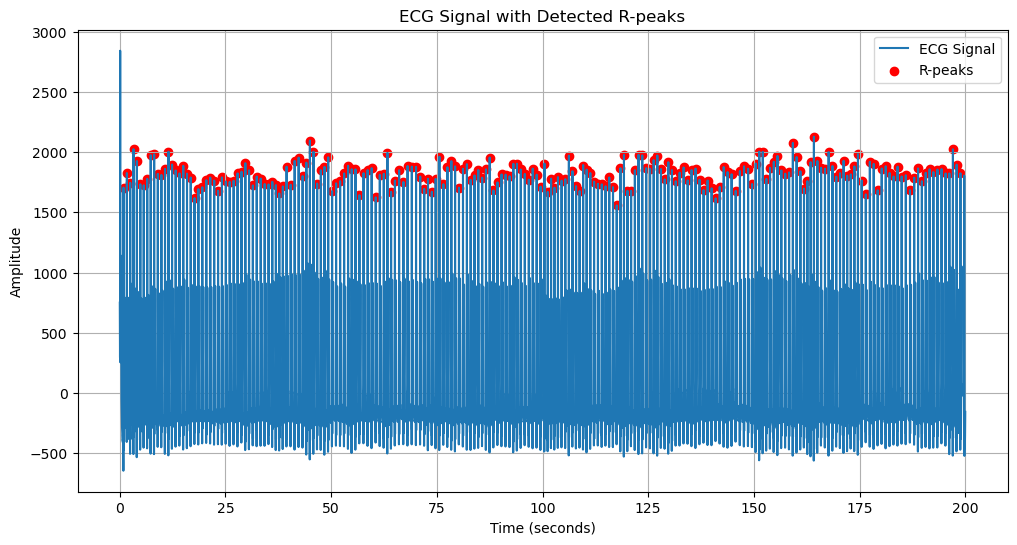

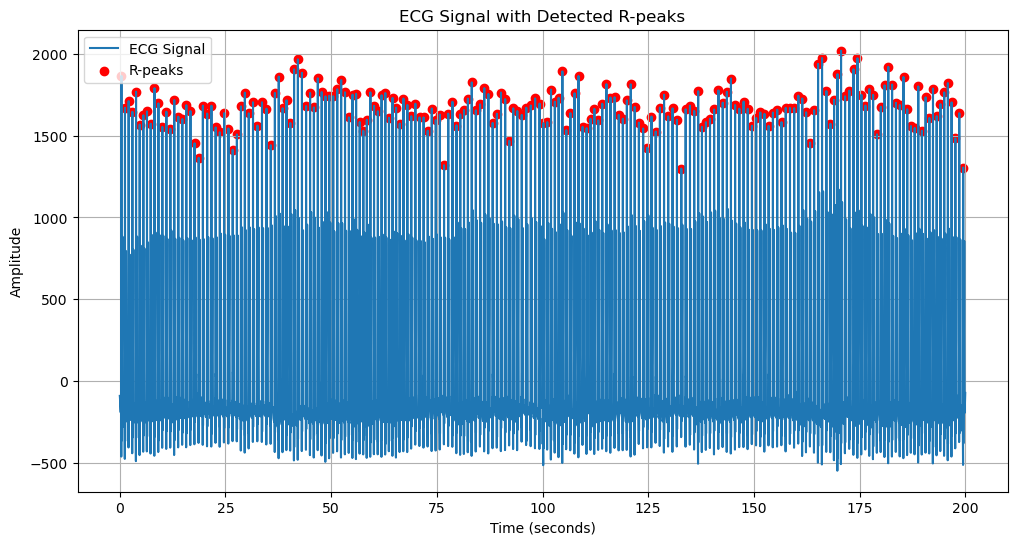

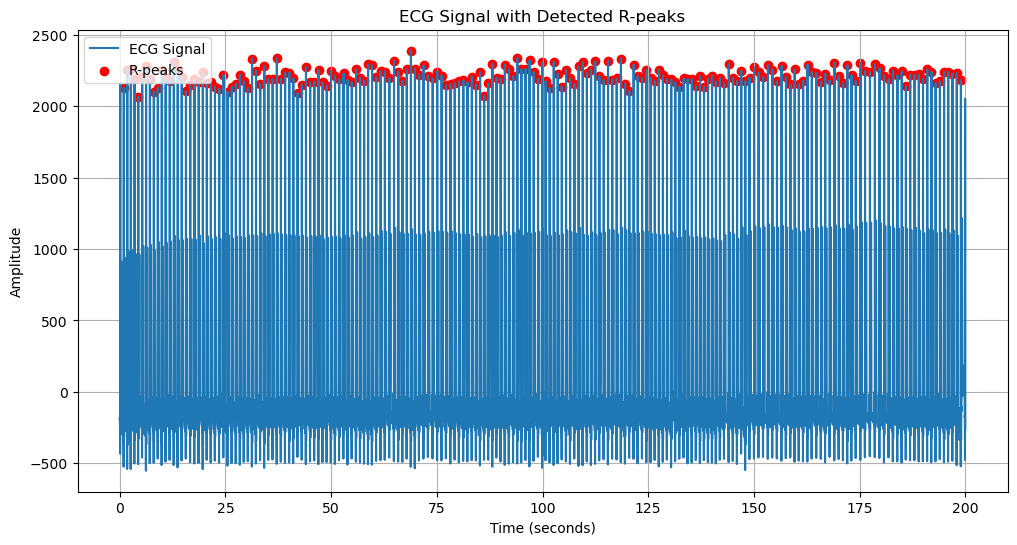

In [89]:
# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_time1, ecg_signal1, label='ECG Signal')
plt.scatter(rpeak_times_sub1 , ecg_signal1[rpeaks_sub1], c='r', marker='o', label='R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_time2, ecg_signal2, label='ECG Signal')
plt.scatter(rpeak_times_sub2 , ecg_signal2[rpeaks_sub2], c='r', marker='o', label='R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_time3, ecg_signal3, label='ECG Signal')
plt.scatter(rpeak_times_sub3 , ecg_signal3[rpeaks_sub3], c='r', marker='o', label='R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# Calculate the time duration of the ECG signal in seconds
duration = len(ecg_signal1) / sampling_frequency_ecg

# Set the plot duration to be 10 seconds
plot_duration_sub1 = min(10, duration)
plot_duration_sub2 = min(10, duration)
plot_duration_sub3 = min(10, duration)
plot_duration_sub4 = min(10, duration)
plot_duration_sub5 = min(10, duration)
plot_duration_sub9 = min(10, duration)
plot_duration_sub10 = min(10, duration)

# time array for the x-axis from 0 to the plot duration
time_array_sub1 = np.arange(len(ecg_signal1)) / sampling_frequency_ecg
time_array_sub1 = time_array_sub1[time_array_sub1 < plot_duration_sub1]

time_array_sub2 = np.arange(len(ecg_signal2)) / sampling_frequency_ecg
time_array_sub2 = time_array_sub2[time_array_sub2 < plot_duration_sub2]

time_array_sub5 = np.arange(len(ecg_signal5)) / sampling_frequency_ecg
time_array_sub5 = time_array_sub5[time_array_sub5 < plot_duration_sub5]

time_array_sub10 = np.arange(len(ecg_signal10)) / sampling_frequency_ecg
time_array_sub10 = time_array_sub10[time_array_sub10 < plot_duration_sub10]




# Create a time array for the x-axis from 0 to the plot duration
time_array_sub9 = np.arange(len(ecg_signal9)) / sampling_frequency_ecg
time_array_sub9 = time_array_sub9[time_array_sub9 < plot_duration_sub9]

r_peak_20s_mask_sub1 = rpeak_times_sub1  < plot_duration_sub1
r_peak_20s_times_sub1 = rpeak_times_sub1[r_peak_20s_mask_sub1]

r_peak_20s_mask_sub2 = rpeak_times_sub2  < plot_duration_sub2
r_peak_20s_times_sub2 = rpeak_times_sub2[r_peak_20s_mask_sub2]

r_peak_20s_mask_sub5 = rpeak_times_sub5  < plot_duration_sub5
r_peak_20s_times_sub5 = rpeak_times_sub5[r_peak_20s_mask_sub5]

r_peak_20s_mask_sub10 = rpeak_times_sub10  < plot_duration_sub10
r_peak_20s_times_sub10 = rpeak_times_sub10[r_peak_20s_mask_sub10]

r_peak_20s_mask_sub9 = rpeak_times_sub9  < plot_duration_sub9
r_peak_20s_times_sub9 = rpeak_times_sub9[r_peak_20s_mask_sub9]

r_peak_20s_times_sub9

array([0.90236137, 1.61331276, 2.34379578, 3.07818512, 3.85945038,
       4.66415359, 5.46495048, 6.23059044, 7.027481  , 7.81655891,
       8.58610519, 9.3595578 ])

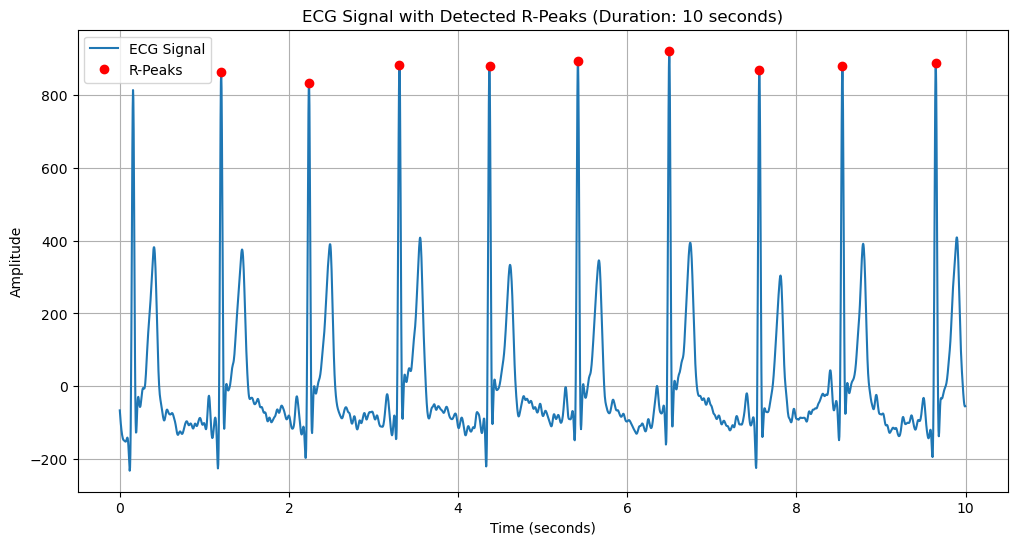

In [92]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(12, 6))
plt.plot(time_array_sub5, ecg_signal5[:len(time_array_sub5)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub5, ecg_signal5[rpeaks_sub5][:len(r_peak_20s_times_sub5)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [471]:
plot_duration = 11  
ecg_signal1_sync_duration = ecg_signal1[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub1 = rpeak_times_sub1[rpeak_times_sub1 < plot_duration]

plot_duration = 15  
ecg_signal2_sync_duration = ecg_signal2[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub2 = rpeak_times_sub2[rpeak_times_sub2 < plot_duration]

plot_duration = 15  
ecg_signal3_sync_duration = ecg_signal3[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub3 = rpeak_times_sub3[rpeak_times_sub3 < plot_duration]

plot_duration = 10  
ecg_signal4_sync_duration = ecg_signal4[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub4 = rpeak_times_sub4[rpeak_times_sub4 < plot_duration]

plot_duration = 11  
ecg_signal5_sync_duration = ecg_signal5[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub5 = rpeak_times_sub5[rpeak_times_sub5 < plot_duration]

filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
jpeak_indices_sub9

array([ 21,  62,  94, 137, 169, 201, 242, 283, 345, 385, 415, 448, 479,
       513, 545, 591, 627, 658], dtype=int64)

# SYNCHRONIZATION OF BCG AND ECG FOR SUBJECT 9

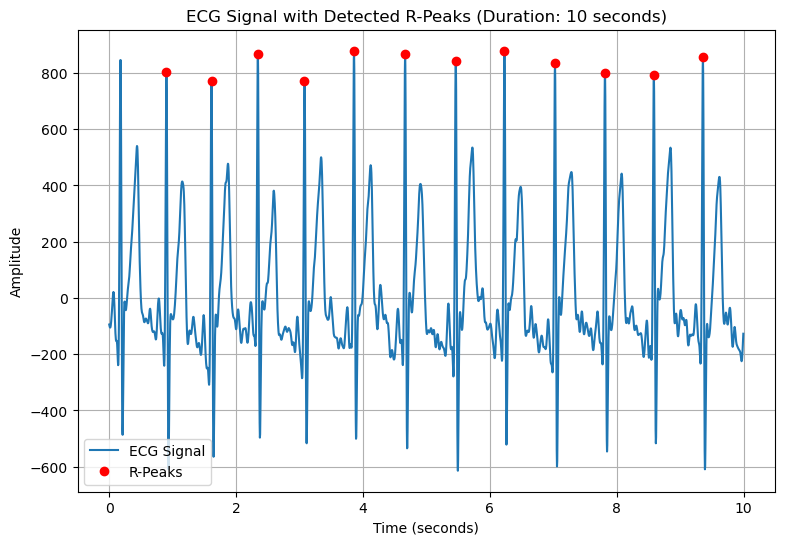

array([ 0.16,  1.2 ,  2.06,  2.76,  3.42,  4.26,  5.04,  5.9 ,  6.66,
        7.44,  8.08,  8.9 ,  9.66, 10.38, 11.28, 12.22, 12.86])

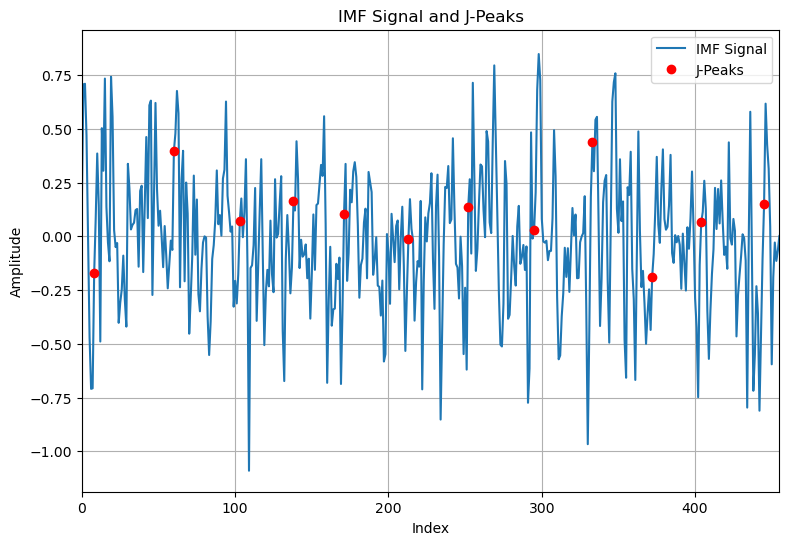

In [93]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub9, ecg_signal9[:len(time_array_sub9)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub9, ecg_signal9[rpeaks_sub9][:len(r_peak_20s_times_sub9)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub9,  label='IMF Signal')
plt.plot(jpeak_indices_sub9[0:12], cardiac_signal_sub9[jpeak_indices_sub9[0:12]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455) 
#plt.show()

bcg_timestamps_sub9


# SYNCHRONIZATION OF BCG AND ECG FOR SUBJECT 5

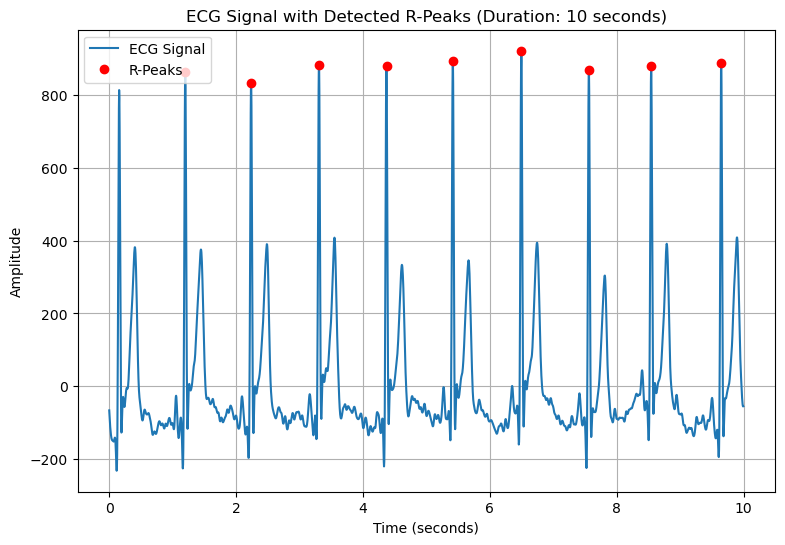

array([ 0.28,  1.32,  2.36,  3.14,  3.74,  4.7 ,  5.9 ,  7.  ,  8.18,
        9.34, 10.36, 11.26, 12.44])

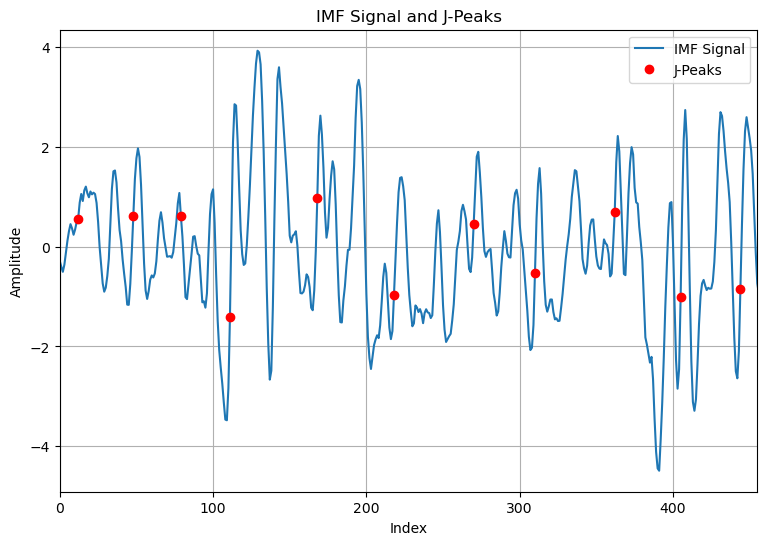

In [473]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub5, ecg_signal5[:len(time_array_sub5)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub5, ecg_signal5[rpeaks_sub5][:len(r_peak_20s_times_sub5)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub5,  label='IMF Signal')
plt.plot(jpeak_indices_sub5[0:12], cardiac_signal_sub5[jpeak_indices_sub5[0:12]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455)  
#plt.show()

bcg_timestamps_sub2

# SYNCHRONIZATION OF BCG AND ECG FOR SUBJECT 10

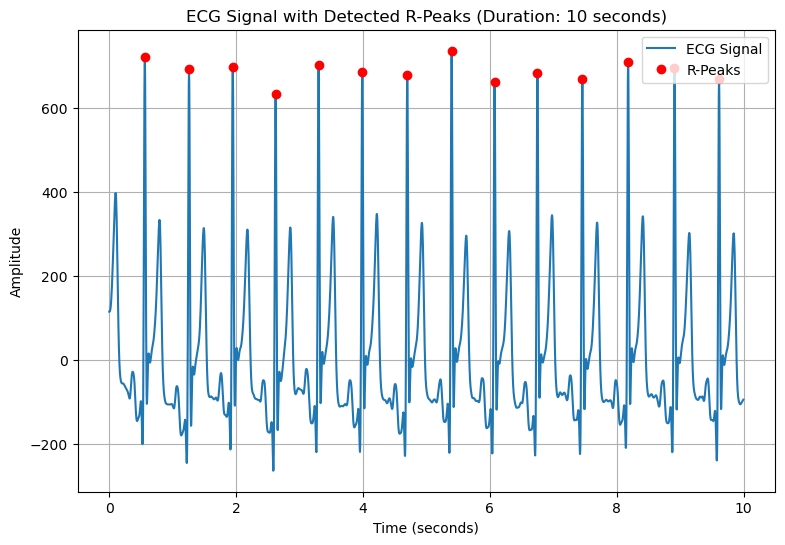

array([ 0.32,  1.12,  2.1 ,  2.8 ,  3.42,  4.04,  4.76,  5.7 ,  6.4 ,
        7.5 ,  8.5 ,  9.38, 10.38, 11.02, 11.72, 12.64, 13.28, 13.94,
       14.88])

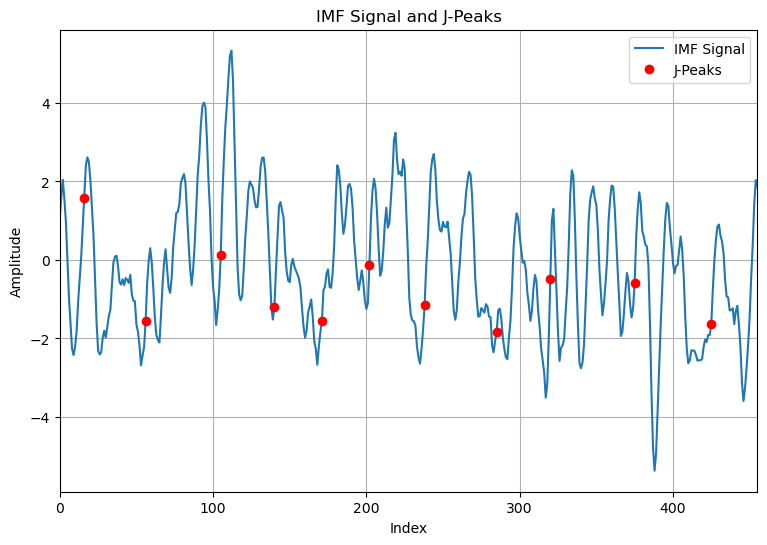

In [474]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub10, ecg_signal10[:len(time_array_sub10)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub10, ecg_signal10[rpeaks_sub10][:len(r_peak_20s_times_sub10)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub10,  label='IMF Signal')
plt.plot(jpeak_indices_sub10[0:12], cardiac_signal_sub10[jpeak_indices_sub10[0:12]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455)  
#plt.show()

bcg_timestamps_sub10

In [128]:
# Step 11: Window-Based Labeling
window_size = 12  


# Organize labeled data pairs
input_data_sub1 = []
target_data_sub1 = []
labeled_data_pairs_sub1 = []
j_peak_sync_duration_sub1_reshaped = np.unique(filtered_bcg_timestamps_sub1)
num_windows_sub1 = len(filtered_bcg_timestamps_sub1)

for i in range(num_windows_sub1):
    window_center_sub1 = bcg_timestamps_sub1[i]
    window_start_sub1 = window_center_sub1 - window_size / 2
    window_end_sub1 = window_center_sub1 + window_size / 2

    # Find the DATAcorresponding to the window start and end times
    start_index_sub1 = np.searchsorted(bcg_timestamps_sub1, window_start_sub1, side='right')
    end_index_sub1 = np.searchsorted(bcg_timestamps_sub1, window_end_sub1, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub1 < end_index_sub1:
        windowed_synchronized_cardiac_signals_sub1 = cardiac_signal_sub1[start_index_sub1:end_index_sub1]
        avg_RRI_window_sub1 = jj_intervals_time_sub1[i] 
        
        # Append the input-target pair to list
        labeled_data_pairs_sub1.append((windowed_synchronized_cardiac_signals_sub1, avg_RRI_window_sub1))
        input_data_sub1.append(windowed_synchronized_cardiac_signals_sub1)
        target_data_sub1.append(avg_RRI_window_sub1)
        
input_data_sub1

[array([ 0.1273975 ,  0.12883373,  0.1273975 ,  0.11488751,  0.09077057,
         0.01015162, -0.05491671, -0.10360947, -0.13394005, -0.14712244]),
 array([ 0.1273975 ,  0.12883373,  0.1273975 ,  0.11488751,  0.09077057,
         0.01015162, -0.05491671, -0.10360947, -0.13394005, -0.14712244]),
 array([ 0.1273975 ,  0.12883373,  0.1273975 ,  0.11488751,  0.09077057,
         0.01015162, -0.05491671, -0.10360947, -0.13394005, -0.14712244,
        -0.15308037]),
 array([ 0.1273975 ,  0.12883373,  0.1273975 ,  0.11488751,  0.09077057,
         0.01015162, -0.05491671, -0.10360947, -0.13394005, -0.14712244,
        -0.15308037]),
 array([ 0.1273975 ,  0.12883373,  0.1273975 ,  0.11488751,  0.09077057,
         0.01015162, -0.05491671, -0.10360947, -0.13394005, -0.14712244,
        -0.15308037, -0.14449662, -0.12264927]),
 array([ 0.1273975 ,  0.12883373,  0.1273975 ,  0.11488751,  0.09077057,
         0.01015162, -0.05491671, -0.10360947, -0.13394005, -0.14712244,
        -0.15308037, -0.1

In [129]:
# Step 11: Window-Based Labeling
window_size = 10  
# Organize labeled data pairs
input_data_sub2 = []
target_data_sub2 = []
labeled_data_pairs_sub2 = []
j_peak_sync_duration_sub2_reshaped = np.unique(filtered_bcg_timestamps_sub2)
num_windows_sub2 = len(filtered_bcg_timestamps_sub2)

for i in range(num_windows_sub2):
    window_center_sub2 = j_peak_sync_duration_sub2_reshaped[i]
    window_start_sub2 = window_center_sub2 - window_size / 2
    window_end_sub2 = window_center_sub2 + window_size / 2

    # Find the DATA corresponding to the window start and end times
    start_index_sub2 = np.searchsorted(j_peak_sync_duration_sub2_reshaped, window_start_sub2, side='right')
    end_index_sub2 = np.searchsorted(j_peak_sync_duration_sub2_reshaped, window_end_sub2, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub2 < end_index_sub2:
        windowed_synchronized_cardiac_signals_sub2 = cardiac_signal_sub2[start_index_sub2:end_index_sub2]
        avg_RRI_window_sub2 = jj_intervals_time_sub2[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub2.append((windowed_synchronized_cardiac_signals_sub2, avg_RRI_window_sub2))
        input_data_sub2.append(windowed_synchronized_cardiac_signals_sub2)
        target_data_sub2.append(avg_RRI_window_sub2)

#target_data_sub2 
input_data_sub2

[array([0.06529973, 0.08018379, 0.09165905, 0.10598701, 0.1208626 ,
        0.11750675]),
 array([0.06529973, 0.08018379, 0.09165905, 0.10598701, 0.1208626 ,
        0.11750675, 0.11359153, 0.10851248]),
 array([0.06529973, 0.08018379, 0.09165905, 0.10598701, 0.1208626 ,
        0.11750675, 0.11359153, 0.10851248]),
 array([0.06529973, 0.08018379, 0.09165905, 0.10598701, 0.1208626 ,
        0.11750675, 0.11359153, 0.10851248, 0.10047347, 0.08674462]),
 array([0.06529973, 0.08018379, 0.09165905, 0.10598701, 0.1208626 ,
        0.11750675, 0.11359153, 0.10851248, 0.10047347, 0.08674462,
        0.0734042 ]),
 array([0.06529973, 0.08018379, 0.09165905, 0.10598701, 0.1208626 ,
        0.11750675, 0.11359153, 0.10851248, 0.10047347, 0.08674462,
        0.0734042 , 0.05368495]),
 array([0.08018379, 0.09165905, 0.10598701, 0.1208626 , 0.11750675,
        0.11359153, 0.10851248, 0.10047347, 0.08674462, 0.0734042 ,
        0.05368495, 0.03033092]),
 array([0.08018379, 0.09165905, 0.10598701, 0.

In [130]:

# Step 11: Window-Based Labeling
window_size = 10  #

# Organize labeled data pairs
input_data_sub3 = []
target_data_sub3 = []
labeled_data_pairs_sub3 = []
j_peak_sync_duration_sub3_reshaped = np.unique(filtered_bcg_timestamps_sub3)
num_windows_sub3 = len(filtered_bcg_timestamps_sub3)

for i in range(num_windows_sub2):
    window_center_sub3 = j_peak_sync_duration_sub3_reshaped[i]
    window_start_sub3 = window_center_sub3 - window_size / 2
    window_end_sub3 = window_center_sub3 + window_size / 2

    # Find the DATA corresponding to the window start and end times
    start_index_sub3 = np.searchsorted(j_peak_sync_duration_sub3_reshaped, window_start_sub3, side='right')
    end_index_sub3 = np.searchsorted(j_peak_sync_duration_sub3_reshaped, window_end_sub3, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub3 < end_index_sub3:
        windowed_synchronized_cardiac_signals_sub3 = cardiac_signal_sub3[start_index_sub3:end_index_sub3]
        avg_RRI_window_sub3 = jj_intervals_time_sub3[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub3.append((windowed_synchronized_cardiac_signals_sub3, avg_RRI_window_sub3))
        input_data_sub3.append(windowed_synchronized_cardiac_signals_sub3)
        target_data_sub3.append(avg_RRI_window_sub3)

#target_data_sub2 
input_data_sub3

[array([0.01141337, 0.02118024, 0.02970509, 0.03685908, 0.03818924,
        0.03937724, 0.03770317]),
 array([0.01141337, 0.02118024, 0.02970509, 0.03685908, 0.03818924,
        0.03937724, 0.03770317]),
 array([0.01141337, 0.02118024, 0.02970509, 0.03685908, 0.03818924,
        0.03937724, 0.03770317, 0.02614652, 0.00430171]),
 array([0.01141337, 0.02118024, 0.02970509, 0.03685908, 0.03818924,
        0.03937724, 0.03770317, 0.02614652, 0.00430171]),
 array([ 0.01141337,  0.02118024,  0.02970509,  0.03685908,  0.03818924,
         0.03937724,  0.03770317,  0.02614652,  0.00430171, -0.02649703,
        -0.06791879, -0.11640166, -0.15703531]),
 array([ 0.01141337,  0.02118024,  0.02970509,  0.03685908,  0.03818924,
         0.03937724,  0.03770317,  0.02614652,  0.00430171, -0.02649703,
        -0.06791879, -0.11640166, -0.15703531, -0.197004  , -0.23900985]),
 array([ 0.01141337,  0.02118024,  0.02970509,  0.03685908,  0.03818924,
         0.03937724,  0.03770317,  0.02614652,  0.00430

In [131]:
# Step 11: Window-Based Labeling
window_size = 10  

# Organize labeled data pairs
input_data_sub4 = []
target_data_sub4 = []
labeled_data_pairs_sub4 = []
j_peak_sync_duration_sub4_reshaped = np.unique(filtered_bcg_timestamps_sub4)
num_windows_sub4 = len(filtered_bcg_timestamps_sub4)

for i in range(num_windows_sub4):
    window_center_sub4 = j_peak_sync_duration_sub4_reshaped[i]
    window_start_sub4 = window_center_sub4 - window_size / 2
    window_end_sub4 = window_center_sub4 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub4 = np.searchsorted(j_peak_sync_duration_sub4_reshaped, window_start_sub4, side='right')
    end_index_sub4 = np.searchsorted(j_peak_sync_duration_sub4_reshaped, window_end_sub4, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub4 < end_index_sub4:
        windowed_synchronized_cardiac_signals_sub4 = cardiac_signal_sub4[start_index_sub4:end_index_sub4]
        avg_RRI_window_sub4 = jj_intervals_time_sub4[i] # Use the precalculated wavelet entropy value
        # Append the input-target pair to the list
        labeled_data_pairs_sub4.append((windowed_synchronized_cardiac_signals_sub4, avg_RRI_window_sub4))
        input_data_sub4.append(windowed_synchronized_cardiac_signals_sub4)
        target_data_sub4.append(avg_RRI_window_sub4)

#target_data_sub2 
input_data_sub4

[array([ 0.0307569 ,  0.01160147, -0.00507532, -0.02834277, -0.05953978,
        -0.11710762, -0.15301199, -0.16886274, -0.16380331]),
 array([ 0.0307569 ,  0.01160147, -0.00507532, -0.02834277, -0.05953978,
        -0.11710762, -0.15301199, -0.16886274, -0.16380331, -0.13880013]),
 array([ 0.0307569 ,  0.01160147, -0.00507532, -0.02834277, -0.05953978,
        -0.11710762, -0.15301199, -0.16886274, -0.16380331, -0.13880013,
        -0.10820833]),
 array([ 0.0307569 ,  0.01160147, -0.00507532, -0.02834277, -0.05953978,
        -0.11710762, -0.15301199, -0.16886274, -0.16380331, -0.13880013,
        -0.10820833, -0.06762564]),
 array([ 0.0307569 ,  0.01160147, -0.00507532, -0.02834277, -0.05953978,
        -0.11710762, -0.15301199, -0.16886274, -0.16380331, -0.13880013,
        -0.10820833, -0.06762564, -0.02166611,  0.02296162,  0.04752945]),
 array([ 0.0307569 ,  0.01160147, -0.00507532, -0.02834277, -0.05953978,
        -0.11710762, -0.15301199, -0.16886274, -0.16380331, -0.13880013,

In [132]:
# Step 11: Window-Based Labeling
window_size = 10  
# Organize labeled data pairs
input_data_sub5 = []
target_data_sub5 = []
labeled_data_pairs_sub5 = []
j_peak_sync_duration_sub5_reshaped = np.unique(filtered_bcg_timestamps_sub5)
num_windows_sub5 = len(filtered_bcg_timestamps_sub5)

for i in range(num_windows_sub5):
    window_center_sub5 = j_peak_sync_duration_sub5_reshaped[i]
    window_start_sub5 = window_center_sub5 - window_size / 2
    window_end_sub5 = window_center_sub5 + window_size / 2

    # Find the DATA corresponding to the window start and end times
    start_index_sub5 = np.searchsorted(j_peak_sync_duration_sub5_reshaped, window_start_sub5, side='right')
    end_index_sub5 = np.searchsorted(j_peak_sync_duration_sub5_reshaped, window_end_sub5, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub5 < end_index_sub5:
        windowed_synchronized_cardiac_signals_sub5 = cardiac_signal_sub5[start_index_sub5:end_index_sub5]
        avg_RRI_window_sub5 = jj_intervals_time_sub5[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub5.append((windowed_synchronized_cardiac_signals_sub5, avg_RRI_window_sub5))
        input_data_sub5.append(windowed_synchronized_cardiac_signals_sub5)
        target_data_sub5.append(avg_RRI_window_sub5)

#target_data_sub2 
input_data_sub5

[array([ 0.17367677,  0.18252371,  0.1847159 ,  0.17316697,  0.14194936,
         0.0253119 , -0.06866795, -0.13385953, -0.17969402, -0.21235305,
        -0.22701788]),
 array([ 0.17367677,  0.18252371,  0.1847159 ,  0.17316697,  0.14194936,
         0.0253119 , -0.06866795, -0.13385953, -0.17969402, -0.21235305,
        -0.22701788, -0.21720455]),
 array([ 0.17367677,  0.18252371,  0.1847159 ,  0.17316697,  0.14194936,
         0.0253119 , -0.06866795, -0.13385953, -0.17969402, -0.21235305,
        -0.22701788, -0.21720455]),
 array([ 0.17367677,  0.18252371,  0.1847159 ,  0.17316697,  0.14194936,
         0.0253119 , -0.06866795, -0.13385953, -0.17969402, -0.21235305,
        -0.22701788, -0.21720455, -0.18162778]),
 array([ 0.17367677,  0.18252371,  0.1847159 ,  0.17316697,  0.14194936,
         0.0253119 , -0.06866795, -0.13385953, -0.17969402, -0.21235305,
        -0.22701788, -0.21720455, -0.18162778]),
 array([ 0.17367677,  0.18252371,  0.1847159 ,  0.17316697,  0.14194936,
    

In [133]:
# Step 11: Window-Based Labeling
window_size = 10  
# Organize labeled data pairs
input_data_sub6 = []
target_data_sub6 = []
labeled_data_pairs_sub6 = []
j_peak_sync_duration_sub6_reshaped = np.unique(filtered_bcg_timestamps_sub6)
num_windows_sub6 = len(filtered_bcg_timestamps_sub6)

for i in range(num_windows_sub6):
    window_center_sub6 = j_peak_sync_duration_sub6_reshaped[i]
    window_start_sub6 = window_center_sub6 - window_size / 2
    window_end_sub6 = window_center_sub6 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub6 = np.searchsorted(j_peak_sync_duration_sub6_reshaped, window_start_sub6, side='right')
    end_index_sub6 = np.searchsorted(j_peak_sync_duration_sub6_reshaped, window_end_sub6, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub6 < end_index_sub6:
        windowed_synchronized_cardiac_signals_sub6 = cardiac_signal_sub6[start_index_sub6:end_index_sub6]
        avg_RRI_window_sub6 = jj_intervals_time_sub6[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub6.append((windowed_synchronized_cardiac_signals_sub6, avg_RRI_window_sub6))
        input_data_sub6.append(windowed_synchronized_cardiac_signals_sub6)
        target_data_sub6.append(avg_RRI_window_sub6)

#target_data_sub2 
input_data_sub6

[array([ 0.09057257,  0.08476483,  0.0795074 ,  0.06278202,  0.03100988,
        -0.06114083, -0.13321261, -0.16933562]),
 array([ 0.09057257,  0.08476483,  0.0795074 ,  0.06278202,  0.03100988,
        -0.06114083, -0.13321261, -0.16933562, -0.17179457, -0.15801897]),
 array([ 0.09057257,  0.08476483,  0.0795074 ,  0.06278202,  0.03100988,
        -0.06114083, -0.13321261, -0.16933562, -0.17179457, -0.15801897]),
 array([ 0.09057257,  0.08476483,  0.0795074 ,  0.06278202,  0.03100988,
        -0.06114083, -0.13321261, -0.16933562, -0.17179457, -0.15801897,
        -0.13480754, -0.09731668, -0.04853264]),
 array([ 0.09057257,  0.08476483,  0.0795074 ,  0.06278202,  0.03100988,
        -0.06114083, -0.13321261, -0.16933562, -0.17179457, -0.15801897,
        -0.13480754, -0.09731668, -0.04853264,  0.00581939]),
 array([ 0.09057257,  0.08476483,  0.0795074 ,  0.06278202,  0.03100988,
        -0.06114083, -0.13321261, -0.16933562, -0.17179457, -0.15801897,
        -0.13480754, -0.09731668,

In [134]:
# Step 11: Window-Based Labeling
window_size = 10  

# Organize labeled data pairs
input_data_sub7 = []
target_data_sub7 = []
labeled_data_pairs_sub7 = []
j_peak_sync_duration_sub7_reshaped = np.unique(filtered_bcg_timestamps_sub7)
num_windows_sub7 = len(filtered_bcg_timestamps_sub7)

for i in range(num_windows_sub7):
    window_center_sub7 = j_peak_sync_duration_sub7_reshaped[i]
    window_start_sub7 = window_center_sub7 - window_size / 2
    window_end_sub7 = window_center_sub7 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub7 = np.searchsorted(j_peak_sync_duration_sub7_reshaped, window_start_sub7, side='right')
    end_index_sub7 = np.searchsorted(j_peak_sync_duration_sub7_reshaped, window_end_sub7, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub7 < end_index_sub7:
        windowed_synchronized_cardiac_signals_sub7 = cardiac_signal_sub7[start_index_sub7:end_index_sub7]
        avg_RRI_window_sub7 = jj_intervals_time_sub7[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub7.append((windowed_synchronized_cardiac_signals_sub7, avg_RRI_window_sub7))
        input_data_sub7.append(windowed_synchronized_cardiac_signals_sub7)
        target_data_sub7.append(avg_RRI_window_sub7)

#target_data_sub2 
input_data_sub7

[array([ 0.29545961,  0.32458387,  0.33822519,  0.33329726,  0.30550215,
         0.16471018,  0.03956198, -0.0623153 , -0.14329904, -0.20596198,
        -0.25606211]),
 array([ 0.29545961,  0.32458387,  0.33822519,  0.33329726,  0.30550215,
         0.16471018,  0.03956198, -0.0623153 , -0.14329904, -0.20596198,
        -0.25606211]),
 array([ 0.29545961,  0.32458387,  0.33822519,  0.33329726,  0.30550215,
         0.16471018,  0.03956198, -0.0623153 , -0.14329904, -0.20596198,
        -0.25606211, -0.28280487, -0.28307986]),
 array([ 0.29545961,  0.32458387,  0.33822519,  0.33329726,  0.30550215,
         0.16471018,  0.03956198, -0.0623153 , -0.14329904, -0.20596198,
        -0.25606211, -0.28280487, -0.28307986, -0.27182124, -0.27598011]),
 array([ 0.29545961,  0.32458387,  0.33822519,  0.33329726,  0.30550215,
         0.16471018,  0.03956198, -0.0623153 , -0.14329904, -0.20596198,
        -0.25606211, -0.28280487, -0.28307986, -0.27182124, -0.27598011]),
 array([ 0.29545961,  0.3

In [135]:
# Step 11: Window-Based Labeling
window_size = 10  

# Organize labeled data pairs
input_data_sub8 = []
target_data_sub8 = []
labeled_data_pairs_sub8 = []
j_peak_sync_duration_sub8_reshaped = np.unique(filtered_bcg_timestamps_sub8)
num_windows_sub8 = len(filtered_bcg_timestamps_sub8)

for i in range(num_windows_sub8):
    window_center_sub8 = j_peak_sync_duration_sub8_reshaped[i]
    window_start_sub8 = window_center_sub8 - window_size / 2
    window_end_sub8 = window_center_sub8 + window_size / 2

    # Find the DATA corresponding to the window start and end times
    start_index_sub8 = np.searchsorted(j_peak_sync_duration_sub8_reshaped, window_start_sub8, side='right')
    end_index_sub8 = np.searchsorted(j_peak_sync_duration_sub8_reshaped, window_end_sub8, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub8 < end_index_sub8:
        windowed_synchronized_cardiac_signals_sub8 = cardiac_signal_sub8[start_index_sub8:end_index_sub8]
        avg_RRI_window_sub8 = jj_intervals_time_sub8[i]
        
        # Append the input-target pair to the list
        labeled_data_pairs_sub8.append((windowed_synchronized_cardiac_signals_sub8, avg_RRI_window_sub8))
        input_data_sub8.append(windowed_synchronized_cardiac_signals_sub8)
        target_data_sub8.append(avg_RRI_window_sub8)

#target_data_sub2 
input_data_sub8

[array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.04423463]),
 array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.04423463]),
 array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.04423463, -0.02805274]),
 array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.04423463, -0.02805274, -0.01200115, -0.0032508 ,
        -0.0117324 ]),
 array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.04423463, -0.02805274, -0.01200115, -0.0032508 ,
        -0.0117324 ]),
 array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.04423463, -0.02805274, -0.01200115, -0.0032508 ,
        -0.0117324 , -0.03697131, -0.08169481, -0.13214489, -0.18833468]),
 array([-0.09014209, -0.10275505, -0.10949073, -0.10691021, -0.0999605 ,
        -0.0683215 , -0.0442

In [136]:
# Step 11: Window-Based Labeling
window_size = 10  

# Organize labeled data pairs
input_data_sub9 = []
target_data_sub9 = []
labeled_data_pairs_sub9 = []
j_peak_sync_duration_sub9_reshaped = np.unique(filtered_bcg_timestamps_sub9)
num_windows_sub9 = len(filtered_bcg_timestamps_sub9)

for i in range(num_windows_sub9):
    window_center_sub9 = j_peak_sync_duration_sub9_reshaped[i]
    window_start_sub9 = window_center_sub9 - window_size / 2
    window_end_sub9 = window_center_sub9 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub9 = np.searchsorted(j_peak_sync_duration_sub9_reshaped, window_start_sub9, side='right')
    end_index_sub9 = np.searchsorted(j_peak_sync_duration_sub9_reshaped, window_end_sub9, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub9 < end_index_sub9:
        windowed_synchronized_cardiac_signals_sub9 = cardiac_signal_sub9[start_index_sub9:end_index_sub9]
        avg_RRI_window_sub9 = jj_intervals_time_sub9[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub9.append((windowed_synchronized_cardiac_signals_sub9, avg_RRI_window_sub9))
        input_data_sub9.append(windowed_synchronized_cardiac_signals_sub9)
        target_data_sub9.append(avg_RRI_window_sub9)

#target_data_sub2 
input_data_sub9

[array([0.04138328, 0.04781907, 0.05515397, 0.05931226, 0.06377616,
        0.05278846, 0.03611124]),
 array([ 0.04138328,  0.04781907,  0.05515397,  0.05931226,  0.06377616,
         0.05278846,  0.03611124,  0.02101455,  0.01112877, -0.00698525,
        -0.03245818]),
 array([ 0.04138328,  0.04781907,  0.05515397,  0.05931226,  0.06377616,
         0.05278846,  0.03611124,  0.02101455,  0.01112877, -0.00698525,
        -0.03245818]),
 array([ 0.04138328,  0.04781907,  0.05515397,  0.05931226,  0.06377616,
         0.05278846,  0.03611124,  0.02101455,  0.01112877, -0.00698525,
        -0.03245818, -0.05716124, -0.08617408]),
 array([ 0.04138328,  0.04781907,  0.05515397,  0.05931226,  0.06377616,
         0.05278846,  0.03611124,  0.02101455,  0.01112877, -0.00698525,
        -0.03245818, -0.05716124, -0.08617408, -0.11016603]),
 array([ 0.04138328,  0.04781907,  0.05515397,  0.05931226,  0.06377616,
         0.05278846,  0.03611124,  0.02101455,  0.01112877, -0.00698525,
        -0.

In [137]:
# Step 11: Window-Based Labeling
window_size = 10  
# Organize labeled data pairs
input_data_sub10 = []
target_data_sub10 = []
labeled_data_pairs_sub10 = []
j_peak_sync_duration_sub10_reshaped = np.unique(filtered_bcg_timestamps_sub10)
num_windows_sub10 = len(filtered_bcg_timestamps_sub10)

for i in range(num_windows_sub10):
    window_center_sub10 = j_peak_sync_duration_sub10_reshaped[i]
    window_start_sub10 = window_center_sub9 - window_size / 2
    window_end_sub10 = window_center_sub9 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub10 = np.searchsorted(j_peak_sync_duration_sub10_reshaped, window_start_sub10, side='right')
    end_index_sub10 = np.searchsorted(j_peak_sync_duration_sub10_reshaped, window_end_sub10, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub10 < end_index_sub10:
        windowed_synchronized_cardiac_signals_sub10 = cardiac_signal_sub10[start_index_sub10:end_index_sub10]
        avg_RRI_window_sub10 = jj_intervals_time_sub10[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub10.append((windowed_synchronized_cardiac_signals_sub9, avg_RRI_window_sub10))
        input_data_sub10.append(windowed_synchronized_cardiac_signals_sub10)
        target_data_sub10.append(avg_RRI_window_sub10)

#target_data_sub2 
input_data_sub10

[array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181105,  0.17032267,
         0.01011074, -0.12194897, -0.2256109 , -0.30825815]),
 array([ 0.34958581,  0.36841092,  0.36877503,  0.34181

In [594]:
print(len(input_data_sub1)); print(len(target_data_sub1))
print(len(input_data_sub2)); print(len(target_data_sub2))
print(len(input_data_sub3)); print(len(target_data_sub3))
print(len(input_data_sub4)); print(len(target_data_sub4))
print(len(input_data_sub5)); print(len(target_data_sub5))
print(len(input_data_sub6)); print(len(target_data_sub6))
print(len(input_data_sub7)); print(len(target_data_sub7))
print(len(input_data_sub8)); print(len(target_data_sub8))
print(len(input_data_sub9)); print(len(target_data_sub9))
print(len(input_data_sub10)); print(len(target_data_sub10))

18
18
24
24
24
24
23
23
30
30
25
25
25
25
27
27
29
29
27
27


In [596]:
hrv_features_subjects = [filtered_hrv_features_sub1, filtered_hrv_features_sub2, filtered_hrv_features_sub3,
              filtered_hrv_features_sub4, filtered_hrv_features_sub5, filtered_hrv_features_sub6,
              filtered_hrv_features_sub7, filtered_hrv_features_sub8, filtered_hrv_features_sub9,
              filtered_hrv_features_sub10]

# Initialize an empty list to store HRV features for each subject
hrv_feature_data = []

# calculate HRV features
for hrv in hrv_features_subjects:
    hrv_features = hrv[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD']]
    hrv_feature_data.append(hrv_features.values.flatten())

In [597]:
# Create a combined dataset
bcg_combined_dataset = pd.DataFrame(hrv_feature_data, columns=['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD'])


bcg_combined_dataset

HRV_MeanNN    HRV_SDNN   HRV_RMSSD
0  616.470588  571.324570  650.192279
1  466.086957  275.643695  407.408662
2  374.482759  276.916519  417.098824
3  490.909091  309.021637  438.829612
4  384.137931  254.298998  356.611033
5  465.833333  429.538849  609.846738
6  415.000000  309.515751  479.710057
7  413.846154  367.337196  501.709079
8  364.285714  269.119670  366.646464
9  426.153846  326.423981  450.155529

In [598]:
ecg_signals = [ecg_signal1, ecg_signal2, ecg_signal3, ecg_signal4, ecg_signal5,
               ecg_signal6, ecg_signal7, ecg_signal8, ecg_signal9, ecg_signal10]

sampling_frequency_ecg = 256 


ecg_hrv_feature_data = []

# Iterate through each ECG signal and calculate HRV features
for ecg_signal in ecg_signals:
    ecg_signal_normalized = (ecg_signal - np.mean(ecg_signal)) / np.std(ecg_signal)
    ecg_hrv_results, info = nk.bio_process(ecg_signal_normalized, sampling_rate=sampling_frequency_ecg)
    ecg_hrv_features = nk.hrv(ecg_hrv_results, sampling_rate=sampling_frequency_ecg)
    ecg_hrv_features = ecg_hrv_features[['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD']]
    ecg_hrv_feature_data.append(ecg_hrv_features.values.flatten())

# Create a combined dataset
ecg_combined_dataset = pd.DataFrame(ecg_hrv_feature_data, columns=['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD'])

print(bcg_combined_dataset)
ecg_combined_dataset

   HRV_MeanNN    HRV_SDNN   HRV_RMSSD
0  616.470588  571.324570  650.192279
1  466.086957  275.643695  407.408662
2  374.482759  276.916519  417.098824
3  490.909091  309.021637  438.829612
4  384.137931  254.298998  356.611033
5  465.833333  429.538849  609.846738
6  415.000000  309.515751  479.710057
7  413.846154  367.337196  501.709079
8  364.285714  269.119670  366.646464
9  426.153846  326.423981  450.155529


HRV_MeanNN    HRV_SDNN  HRV_RMSSD
0   899.922229   51.048298  30.974684
1   943.757405   56.162713  31.903509
2   995.151539   50.904345  35.416144
3  1032.735189   69.733636  43.653991
4   999.388415   62.658519  47.589175
5   858.230065   50.603427  37.369459
6   922.638081   67.803405  49.587768
7   913.883314   78.947616  35.964022
8   765.941723   51.565584  26.228737
9   875.705534  115.805712  77.761617

In [599]:
# Calculate mean and standard deviation of 'HRV_MeanNN' and 'HRV_SDNN'
bcg_mean_HRV_MeanNN = bcg_combined_dataset['HRV_MeanNN'].mean()
ecg_mean_HRV_MeanNN = ecg_combined_dataset['HRV_MeanNN'].mean()

bcg_std_HRV_SDNN = bcg_combined_dataset['HRV_SDNN'].std()
ecg_std_HRV_SDNN = ecg_combined_dataset['HRV_SDNN'].std()



print("BCG Mean HRV_MeanNN:", bcg_mean_HRV_MeanNN)
print("ECG Mean HRV_MeanNN:", ecg_mean_HRV_MeanNN)

print("BCG Standard Deviation HRV_SDNN:", bcg_std_HRV_SDNN)
print("ECG Standard Deviation HRV_SDNN:", ecg_std_HRV_SDNN)

BCG Mean HRV_MeanNN: 441.7206372940344
ECG Mean HRV_MeanNN: 920.7353494255551
BCG Standard Deviation HRV_SDNN: 97.08357898740192
ECG Standard Deviation HRV_SDNN: 20.187858053533898


In [603]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Combine all input data arrays into one list
all_input_data = [input_data_sub1, input_data_sub2, input_data_sub3, input_data_sub4, input_data_sub5,
                 input_data_sub6, input_data_sub7, input_data_sub8, input_data_sub9, input_data_sub10]

padded_input_data_sub1 = None ; padded_input_data_sub2 = None
padded_input_data_sub3 = None ; padded_input_data_sub4 = None
padded_input_data_sub5 = None ; padded_input_data_sub6 = None
padded_input_data_sub7 = None ; padded_input_data_sub8 = None
padded_input_data_sub9 = None ; padded_input_data_sub10 = None



#   maximum sequence length among all sequences
max_sequence_length = max(max(len(seq) for seq in data) for data in all_input_data)

# Pad sequences to match the maximum length
padded_input_data = []
for data in all_input_data:
    padded_data = pad_sequences(data, maxlen=23, dtype='float32', padding='post', truncating='post')
    padded_input_data.append(padded_data)

padded_input_data_sub1 = padded_input_data[0]
padded_input_data_sub2 = padded_input_data[1]
padded_input_data_sub3 = padded_input_data[2]
padded_input_data_sub4 = padded_input_data[3]
padded_input_data_sub5 = padded_input_data[4]
padded_input_data_sub6 = padded_input_data[5]
padded_input_data_sub7 = padded_input_data[6]
padded_input_data_sub8 = padded_input_data[7]
padded_input_data_sub9 = padded_input_data[8]
padded_input_data_sub10 = padded_input_data[9]

In [604]:
combined_input_data_sub1 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[0]) for segment in padded_input_data_sub1])
combined_input_data_sub2 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[1]) for segment in padded_input_data_sub2])
combined_input_data_sub3 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[2]) for segment in padded_input_data_sub3])
combined_input_data_sub4 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[3]) for segment in padded_input_data_sub4])
combined_input_data_sub5 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[4]) for segment in padded_input_data_sub5])
combined_input_data_sub6 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[5]) for segment in padded_input_data_sub6])
combined_input_data_sub7 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[6]) for segment in padded_input_data_sub7])
combined_input_data_sub8 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[7]) for segment in padded_input_data_sub8])
combined_input_data_sub9 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[8]) for segment in padded_input_data_sub9])
combined_input_data_sub10 = np.array([np.append(segment, bcg_normalized_combined_dataset.iloc[9]) for segment in padded_input_data_sub10])


In [605]:
print(combined_input_data_sub1) ; print(combined_input_data_sub2)
print(combined_input_data_sub3) ; print(combined_input_data_sub4)
print(combined_input_data_sub5) ; print(combined_input_data_sub6)
print(combined_input_data_sub7) ; print(combined_input_data_sub8)
print(combined_input_data_sub8) ; print(combined_input_data_sub10)

[[ 0.07008973  0.06675392  0.05560919  0.03555507  0.01573711 -0.04163966
  -0.08812521 -0.11383345 -0.12208718 -0.12739041 -0.12710816 -0.11405688
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          2.35162075
   2.39392167  1.87991552]
 [ 0.07008973  0.06675392  0.05560919  0.03555507  0.01573711 -0.04163966
  -0.08812521 -0.11383345 -0.12208718 -0.12739041 -0.12710816 -0.11405688
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          2.35162075
   2.39392167  1.87991552]
 [ 0.07008973  0.06675392  0.05560919  0.03555507  0.01573711 -0.04163966
  -0.08812521 -0.11383345 -0.12208718 -0.12739041 -0.12710816 -0.11405688
  -0.08779442  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          2.35162075
   2.39392167  1.87991552]
 [ 0.07008973  0.06675392  0.05560919  0.03555507  0.01

In [606]:
input_data = np.concatenate((combined_input_data_sub1, combined_input_data_sub2, combined_input_data_sub3, 
                             combined_input_data_sub4, combined_input_data_sub5, combined_input_data_sub6,
                             combined_input_data_sub7), axis=0)


input_data = np.array(input_data)
len(input_data)

169

In [607]:
target_data_sub123 = np.concatenate((target_data_sub1, target_data_sub2, target_data_sub3, 
                                     target_data_sub4,  target_data_sub5,  target_data_sub6, target_data_sub7), axis=0)

In [608]:
target_data = np.array(target_data_sub123)
len(target_data)

169

In [609]:
# Convert target values to binary labels
output_data = []
for i in target_data:
    if 0.4 <= i <= 0.8:
        output_data.append(0)
    else:
        output_data.append(1)

# Convert the binary labels to a regular Python list
output_data_binary_labels = np.array(output_data)
output_data_binary_labels

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set a random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [641]:
# Normalize input data using z-score
scaler = StandardScaler()
normalized_input_data = scaler.fit_transform(input_data)

# Reshape the input data to (num_samples, sequence_length, input_dim)
num_samples, sequence_length = normalized_input_data.shape
input_dim = 1  

reshaped_input_data = normalized_input_data.reshape((normalized_input_data.shape[0], normalized_input_data.shape[1], input_dim))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_input_data, output_data_binary_labels, test_size=0.2, random_state=40)

In [642]:
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(26, 1)))
model.add(Dense(1))
model

In [643]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [644]:
history = model.fit(X_train, y_train, epochs=150, verbose=2)

Epoch 1/150
5/5 - 2s - loss: 0.4948 - accuracy: 0.3704 - 2s/epoch - 331ms/step
Epoch 2/150
5/5 - 0s - loss: 0.3272 - accuracy: 0.4148 - 63ms/epoch - 13ms/step
Epoch 3/150
5/5 - 0s - loss: 0.2878 - accuracy: 0.5407 - 51ms/epoch - 10ms/step
Epoch 4/150
5/5 - 0s - loss: 0.2604 - accuracy: 0.5407 - 60ms/epoch - 12ms/step
Epoch 5/150
5/5 - 0s - loss: 0.2523 - accuracy: 0.5481 - 60ms/epoch - 12ms/step
Epoch 6/150
5/5 - 0s - loss: 0.2473 - accuracy: 0.5407 - 63ms/epoch - 13ms/step
Epoch 7/150
5/5 - 0s - loss: 0.2421 - accuracy: 0.5630 - 60ms/epoch - 12ms/step
Epoch 8/150
5/5 - 0s - loss: 0.2388 - accuracy: 0.5481 - 61ms/epoch - 12ms/step
Epoch 9/150
5/5 - 0s - loss: 0.2375 - accuracy: 0.5556 - 63ms/epoch - 13ms/step
Epoch 10/150
5/5 - 0s - loss: 0.2356 - accuracy: 0.6148 - 62ms/epoch - 12ms/step
Epoch 11/150
5/5 - 0s - loss: 0.2335 - accuracy: 0.6370 - 61ms/epoch - 12ms/step
Epoch 12/150
5/5 - 0s - loss: 0.2381 - accuracy: 0.5481 - 60ms/epoch - 12ms/step
Epoch 13/150
5/5 - 0s - loss: 0.2342 -

Epoch 103/150
5/5 - 0s - loss: 0.2015 - accuracy: 0.6593 - 63ms/epoch - 13ms/step
Epoch 104/150
5/5 - 0s - loss: 0.2057 - accuracy: 0.6519 - 62ms/epoch - 12ms/step
Epoch 105/150
5/5 - 0s - loss: 0.2014 - accuracy: 0.6593 - 61ms/epoch - 12ms/step
Epoch 106/150
5/5 - 0s - loss: 0.2058 - accuracy: 0.6667 - 62ms/epoch - 12ms/step
Epoch 107/150
5/5 - 0s - loss: 0.2018 - accuracy: 0.6815 - 63ms/epoch - 13ms/step
Epoch 108/150
5/5 - 0s - loss: 0.1981 - accuracy: 0.6815 - 62ms/epoch - 12ms/step
Epoch 109/150
5/5 - 0s - loss: 0.2071 - accuracy: 0.6741 - 62ms/epoch - 12ms/step
Epoch 110/150
5/5 - 0s - loss: 0.1981 - accuracy: 0.6815 - 53ms/epoch - 11ms/step
Epoch 111/150
5/5 - 0s - loss: 0.2023 - accuracy: 0.6519 - 72ms/epoch - 14ms/step
Epoch 112/150
5/5 - 0s - loss: 0.1996 - accuracy: 0.6667 - 62ms/epoch - 12ms/step
Epoch 113/150
5/5 - 0s - loss: 0.2037 - accuracy: 0.6963 - 61ms/epoch - 12ms/step
Epoch 114/150
5/5 - 0s - loss: 0.2041 - accuracy: 0.6815 - 57ms/epoch - 11ms/step
Epoch 115/150
5/

In [645]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 [==============================] - 0s 13ms/step - loss: 0.2297 - accuracy: 0.7059
Test Loss: 0.22968332469463348
Test Accuracy: 0.7058823704719543


In [646]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  predictions on the test data
y_pred = model.predict(X_test)

y_pred_binary =[]
for pred in y_pred:
    if 0.4 <= pred <= 0.8:
        y_pred_binary.append(0)
    else:
        y_pred_binary.append(1)

y_pred_binary = np.array(y_pred_binary)
y_pred

2/2 [==============================] - 0s 11ms/step


array([[0.6514857 ],
       [0.5317825 ],
       [0.5717087 ],
       [0.9125252 ],
       [0.80060124],
       [0.6921179 ],
       [0.5105642 ],
       [0.7121354 ],
       [0.7979897 ],
       [0.64314634],
       [0.25679228],
       [0.72289145],
       [0.3663378 ],
       [0.7754478 ],
       [0.7907871 ],
       [0.8325001 ],
       [0.8507143 ],
       [0.56939065],
       [0.36567518],
       [0.5317825 ],
       [0.59678197],
       [0.48530793],
       [0.8507143 ],
       [0.9842491 ],
       [1.0461873 ],
       [0.9293896 ],
       [0.42114347],
       [0.6892445 ],
       [0.790631  ],
       [0.7757584 ],
       [0.863657  ],
       [0.6517608 ],
       [0.79775834],
       [0.39460668]], dtype=float32)

In [647]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_binary, labels=[1, 0])
cm

array([[ 7, 13],
       [ 6,  8]], dtype=int64)

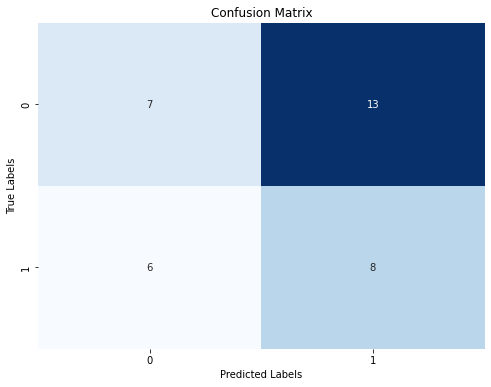

In [648]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [649]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary, pos_label=1)
recall = recall_score(y_test, y_pred_binary, pos_label=1)
f1 = f1_score(y_test, y_pred_binary, pos_label=1)

# TP, TN, FP, FN, NPV, PPV
tn, fp, fn, tp = cm.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_binary)

#  Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_binary))


print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

Precision: 0.5384615384615384
Recall: 0.35
F1-Score: 0.4242424242424242
Negative Prediction Value (NPV): 0.5384615384615384
Positive Prediction Value (PPV): 0.38095238095238093
Mean Absolute Error (MAE): 0.5588235294117647
Root Mean Square Error (RMSE): 0.747545001596402


In [650]:
scaler = StandardScaler()
combined_input_data_sub8 = scaler.fit_transform(combined_input_data_sub8)
combined_input_data_sub9 = scaler.fit_transform(combined_input_data_sub9)
combined_input_data_sub10 = scaler.fit_transform(combined_input_data_sub10)

In [651]:
input_data_sub8 = combined_input_data_sub8.reshape((combined_input_data_sub8.shape[0], combined_input_data_sub8.shape[1], input_dim))
input_data_sub9 = combined_input_data_sub9.reshape((combined_input_data_sub9.shape[0], combined_input_data_sub9.shape[1], input_dim))
input_data_sub10 = combined_input_data_sub10.reshape((combined_input_data_sub10.shape[0], combined_input_data_sub10.shape[1], input_dim))

In [652]:


output_data_sub8 = []
for i in target_data_sub8:
    if 0.4 <= i <= 0.8:
        output_data_sub8.append(0)
    else:
        output_data_sub8.append(1)
# Convert the binary labels to a regular Python list
test_output_data_sub8 = np.array(output_data_sub8)


output_data_sub9 = []
for i in target_data_sub9:
    if 0.4 <= i <= 0.8:
        output_data_sub9.append(0)
    else:
        output_data_sub9.append(1)
# Convert the binary labels to a regular Python list
test_output_data_sub9 = np.array(output_data_sub9)


output_data_sub10 = []
for i in target_data_sub10:
    if 0.4 <= i <= 0.8:
        output_data_sub10.append(0)
    else:
        output_data_sub10.append(1)

test_output_data_sub8 = np.array(output_data_sub8)
test_output_data_sub9 = np.array(output_data_sub9)
test_output_data_sub10 = np.array(output_data_sub10)

In [653]:
print(test_output_data_sub8)
print(test_output_data_sub9)
print(test_output_data_sub10)

[1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
[0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0]
[1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0]


In [654]:
y_pred_sub8 = model.predict(input_data_sub8)
y_pred_sub9 = model.predict(input_data_sub9)
y_pred_sub10 = model.predict(input_data_sub10)

y_pred_sub8 = y_pred_sub8.flatten()
y_pred_sub9 = y_pred_sub9.flatten()
y_pred_sub10 = y_pred_sub10.flatten()

1/1 [==============================] - 0s 22ms/step


array([0.9961132 , 0.97658157, 1.01955116, 1.00783218, 0.9804879 ,
       1.00783218, 0.9804879 , 0.94533096, 0.92579933, 0.95704994,
       0.9804879 , 0.94142464, 0.92579933, 0.97267525])

In [632]:
#print(cm_sub7)
print(cm_sub8)
print(cm_sub9)
print(cm_sub10)

[[ 8  0]
 [19  0]]
[[10  1]
 [17  1]]
[[10  0]
 [17  0]]


In [ ]:

# Compute confusion matrix
cm_sub8 = confusion_matrix(test_output_data_sub8, y_pred_binary_sub8, labels=[1, 0])

# Calculate precision, recall, and F1-score
precision = precision_score(test_output_data_sub8,  y_pred_binary_sub8, pos_label=1)
recall = recall_score(test_output_data_sub8, y_pred_binary_sub8 , pos_label=1)
f1 = f1_score(test_output_data_sub8, y_pred_binary_sub8, pos_label=1)

# Calculate Negative Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm_sub8.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_output_data_sub8, y_pred_binary_sub8)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_output_data_sub8, y_pred_binary_sub8))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


In [142]:
# Compute confusion matrix
cm_sub9 = confusion_matrix(test_output_data_sub9, y_pred_binary_sub9, labels=[1, 0])

# Calculate precision, recall, and F1-score
precision = precision_score(test_output_data_sub9,  y_pred_binary_sub9, pos_label=1)
recall = recall_score(test_output_data_sub9, y_pred_binary_sub9 , pos_label=1)
f1 = f1_score(test_output_data_sub9, y_pred_binary_sub9, pos_label=1)

# Calculate Negative Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm_sub9.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_output_data_sub9, y_pred_binary_sub9)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_output_data_sub9, y_pred_binary_sub9))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

Precision: 0.6923076923076923
Recall: 0.5625
F1-Score: 0.6206896551724138
Negative Prediction Value (NPV): 0.6923076923076923
Positive Prediction Value (PPV): 0.5333333333333333
Mean Absolute Error (MAE): 0.39285714285714285
Root Mean Square Error (RMSE): 0.6267831705280087


In [143]:

# Compute confusion matrix
cm_sub10 = confusion_matrix(test_output_data_sub10, y_pred_binary_sub10, labels=[1, 0])

# Calculate precision, recall, and F1-score
precision = precision_score(test_output_data_sub10,  y_pred_binary_sub10, pos_label=1)
recall = recall_score(test_output_data_sub10, y_pred_binary_sub10 , pos_label=1)
f1 = f1_score(test_output_data_sub10, y_pred_binary_sub10, pos_label=1)

# Calculate Negative Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm_sub10.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_output_data_sub10, y_pred_binary_sub10)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_output_data_sub10, y_pred_binary_sub10))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Negative Prediction Value (NPV): nan
Positive Prediction Value (PPV): 0.6521739130434783
Mean Absolute Error (MAE): 0.34782608695652173
Root Mean Square Error (RMSE): 0.5897678246195885


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mds22awo\AppData\Local\Temp/ipykernel_8768/472485017.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  npv = tn / (tn + fn)


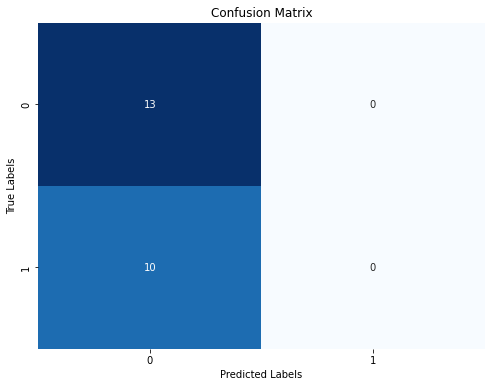

In [1137]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sub10, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()